# Análise Exploratória de Dados (EDA) – Risco de Crédito

**Empresa fictícia:** MinerAI  
**Tema:** Modelo de concessão de cartões de crédito  
**Disciplina:** Data Mining / Mineração de Dados  



##  Distribuição de Tarefas — Projeto *Análise Exploratória de Dados (Risco de Crédito)*

**Alunos:**
Ana Paula Velozo, Gabriel Dutra, Iago Correa de Lima, Leonardo Renner, Persio de Souza Lima

| Aluno | Tarefas principais executadas | Evidências / Seções relacionadas |
|--------|-------------------------------|----------------------------------|
| **Ana Paula Velozo** | Elaboração da **introdução, contexto e objetivos da análise**. Estruturação textual das seções 1 e 2 (“Contexto do Problema” e “Objetivos da EDA”), com linguagem formal e explicativa. | Seções 1–2, linguagem descritiva e alinhada ao enunciado acadêmico. |
| **Gabriel Dutra** | **Carregamento e preparação dos dados** — uso de `pd.read_csv()`, renomeação de colunas, criação do dicionário de dados e análise inicial com `df.info()`, `df.describe()`, `isnull()`. | Seções 3–4 (“Descrição do Dataset” e “Plano de Análise”), blocos de código técnico. |
| **Iago Correa de Lima** | **Tratamento e exploração das variáveis categóricas**, uso de `np.unique()`, `sns.countplot()`, e análise de distribuições (`SEXO`, `ESTADO CIVIL`, `DEPENDENTES`, etc.). | Seções “Análises Univariadas e Bivariadas” (3.1–3.4). |
| **Leonardo Renner** | **Visualizações e gráficos avançados** com *Plotly* e *Seaborn* (`px.box`, `px.scatter`, `sns.boxplot`), análises de renda, patrimônio e outliers. | Blocos de visualização interativa e boxplots nas seções intermediárias. |
| **Persio de Souza Lima** | **Detecção de outliers e uso de técnicas de modelagem (PyOD/KNN)**. Essa parte está explicitamente escrita no código e menciona execução prática. | Bloco que importa `pyod`, cria o modelo `KNN()`, gera previsões e analisa os outliers — trecho explicitamente implementado no notebook. |

---

###Resumo das Contribuições

- **Ana Paula** → Texto e contextualização (parte teórica e introdução).  
- **Gabriel** → Montagem da base de dados e estrutura do DataFrame.  
- **Iago** → Análises descritivas e comparativas entre variáveis.  
- **Leonardo** → Visualizações gráficas e interpretação visual.  
- **Persio** → Aplicação prática de detecção de *outliers* e análise com PyOD/KNN.


## 1. Contexto do Problema

A MinerAI possui um **modelo de risco de crédito desatualizado**, que vem concedendo cartões para um número muito alto de **maus pagadores**.  
Esse comportamento aumenta o risco da carteira de clientes e pode gerar **prejuízos financeiros significativos** para a companhia.

Para apoiar a revisão do modelo, foi disponibilizado um conjunto de dados com informações cadastrais, profissionais e financeiras dos requerentes de cartão de crédito, além de uma **variável alvo** que indica se o cliente é:

- **0** → bom pagador  
- **1** → mau pagador (inadimplente)

O objetivo desta EDA é **compreender o comportamento dos dados** e tentar descobrir **padrões que diferenciem bons e maus pagadores**.


## 2. Objetivos da Análise Exploratória

Os objetivos principais desta Análise Exploratória de Dados são:

1. **Explorar e analisar os dados** para entender a distribuição das características (features) dos clientes.
2. Investigar a **relação entre as variáveis explicativas e a variável alvo** `ROTULO_ALVO_MAU=1`.
3. Responder às seguintes perguntas propostas no enunciado:

   - Como as features **sexo**, **estado civil**, **quantidade de dependentes** e **nível educacional** estão relacionadas com a variável meta?
   - Como é a **distribuição de bons e maus pagadores por estado de residência**?
   - De que forma o **tipo de residência** interfere na classificação do pagador? (boxplot)
   - Como as variáveis **renda pessoal mensal** e **outras rendas** se relacionam com a variável meta?  
     > (obs.: não será usada correlação estatística formal, mas análise visual/intuitiva)
   - A **idade** interfere na classificação do pagador?

4. A partir dessas análises, gerar **insights que possam orientar a melhoria do modelo de risco de crédito** da MinerAI.


## 3. Descrição do Dataset

O dataset contém **50.000 registros** (clientes) e **54 variáveis**, incluindo:

- **ID_CLIENTE:** identificador sequencial do requerente.
- **Variáveis cadastrais:** sexo, estado civil, quantidade de dependentes, nível educacional, nacionalidade, estado e cidade de residência.
- **Variáveis de contato:** telefone residencial, telefone móvel, telefone profissional, e-mail.
- **Variáveis de moradia:** tipo de residência e tempo de residência atual.
- **Variáveis financeiras:** renda pessoal mensal, outras rendas, valor do patrimônio pessoal, quantidade de contas bancárias, quantidade de carros, etc.
- **Variáveis profissionais:** empresa, estado e cidade profissional, tempo no trabalho atual, código de profissão, tipo de ocupação.
- **Flags de documentação:** confirmações de endereço, RG, CPF, comprovante de renda, registro em órgãos de proteção ao crédito.
- **Variável alvo:** `ROTULO_ALVO_MAU=1`, onde:
  - **0** = bom pagador  
  - **1** = mau pagador (inadimplente)

As colunas estão numeradas de 0 a 53 no DataFrame (`df`), mas cada índice corresponde a uma variável descrita no dicionário de dados apresentado no enunciado.


## 4. Plano de Análise Exploratória

A EDA será conduzida em etapas:

1. **Entendimento da variável alvo**  
   - Verificar a distribuição de bons e maus pagadores (`ROTULO_ALVO_MAU=1`) para identificar possíveis desbalanceamentos de classe.

2. **Análise univariada das principais variáveis numéricas**
   - Histogramas de **idade**, **renda pessoal mensal**, **outras rendas** e **valor do patrimônio pessoal**.
   - Boxplots para identificar **outliers** e assimetria nas distribuições.

3. **Análise bivariada em relação à variável alvo**
   - Gráficos de barras (ou countplots) relacionando:
     - sexo x alvo  
     - estado civil x alvo  
     - quantidade de dependentes x alvo  
     - nível educacional x alvo  
     - estado de residência x alvo  
   - Boxplots e scatterplots para explorar:
     - tipo de residência x alvo  
     - renda pessoal mensal x alvo  
     - outras rendas x alvo  
     - idade x alvo  

4. **Discussão dos resultados**
   - Identificar padrões que ajudem a diferenciar bons e maus pagadores.
   - Destacar variáveis que parecem mais relevantes para um futuro modelo de risco de crédito.


## Importação das Bibliotecas

**pandas (pd):** Leitura, manipulação e análise de dados.  
**numpy (np):** Operações matemáticas e tratamento de arrays numéricos.  
**matplotlib.pyplot (plt):** Criação de gráficos básicos (histogramas, boxplots etc.).  
**seaborn (sns):** Visualizações estatísticas mais elaboradas (countplot, boxplot, distplots).  
**plotly.express (px):** Gráficos interativos úteis para exploração mais detalhada.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Definição da Fonte de Dados

A variável `url` armazena o endereço do arquivo CSV disponibilizado no GitHub, que contém o dataset de análise de risco de crédito utilizado nesta EDA.


In [ ]:
url = 'https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv'

## Carregamento do Dataset

O comando `pd.read_csv()` lê o arquivo CSV a partir da URL definida anteriormente.  
Foi utilizado o separador `\t` (tabulação) e a codificação `latin1`, pois o arquivo original está estruturado nesse formato.  
O parâmetro `low_memory=False` garante que o pandas carregue todas as colunas corretamente.


In [ ]:
df = pd.read_csv(url, sep='\t', encoding='latin1',  header=None, low_memory=False)


## Visualização Inicial (df.head())

O comando `df.head()` exibe as primeiras cinco linhas do dataset, permitindo uma visão inicial da estrutura, dos tipos de valores presentes e das colunas carregadas corretamente.


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


## Interpretação – Visualização Inicial (df.head)

As primeiras cinco linhas do dataset mostram que:

- O conjunto possui **54 colunas**, incluindo informações cadastrais, financeiras, profissionais e variáveis alvo.
- As colunas aparecem identificadas apenas por índices numéricos (0 a 53), pois o arquivo original não contém cabeçalho.
- É possível observar variáveis de diferentes tipos:
  - Letras (ex.: sexo, tipo de envio, tipo de residência)
  - Números inteiros (ex.: idade, meses de trabalho)
  - Flags binárias (0/1)
- A estrutura está consistente com o dicionário de dados fornecido no enunciado.

Essa visualização confirma que o dataset foi carregado corretamente e possui a variedade de informações necessária para análise exploratória.


## Verificação de Valores Ausentes

O comando `df.isnull().sum()` calcula a quantidade de valores ausentes (NaN) em cada coluna do dataset, permitindo identificar possíveis problemas de completude dos dados antes das análises.


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Interpretação – Valores Ausentes (df.isnull().sum)

A análise de valores ausentes mostra que a maior parte das colunas **não possui dados faltantes**.  
Entretanto, algumas variáveis apresentam uma quantidade relevante de valores nulos:

- **TIPO RESIDENCIA:** 1.349 valores ausentes  
- **MESES RESIDENCIA:** 3.777 valores ausentes  
- **CIDADE PROFISSIONAL e BAIRRO PROFISSIONAL:** 33.783 valores ausentes cada  
- **CODIGO PROFISSAO:** 7.756 valores ausentes  
- **TIPO OCUPACAO:** 7.313 valores ausentes  
- **CODIGO PROFISSAO CONJUGE:** 28.884 ausentes  
- **NIVEL EDUCACIONAL CONJUGE:** 32.338 ausentes  

### 🔍 Interpretação geral

- As variáveis **profissionais** (cidade, bairro, código de profissão) possuem muitos valores ausentes, possivelmente porque alguns clientes não informaram detalhes do emprego ou trabalham informalmente.
- Variáveis relacionadas ao **cônjuge** (profissão e nível educacional) também apresentam ausência elevada, o que pode indicar que muitos clientes são solteiros ou não informaram esses dados.
- As colunas com poucos ausentes (como *TIPO RESIDENCIA* e *MESES RESIDENCIA*) podem necessitar de tratamento específico dependendo da modelagem futura.

### ✔ Conclusão
Os valores ausentes estão concentrados em poucas variáveis específicas, principalmente relacionadas à **área profissional e ao cônjuge**, o que não compromete a análise exploratória, mas deve ser considerado em etapas de modelagem.


## Estatísticas Descritivas (df.describe())

O comando `df.describe()` gera um resumo estatístico das colunas numéricas, apresentando medidas como média, mediana, desvio padrão, valores mínimo e máximo. Essas informações ajudam a identificar padrões gerais, dispersão dos dados e possíveis outliers.


In [ ]:
df.describe()

,0,2,4,5,7,8,9,12,18,19,...,41,42,43,44,45,46,47,48,50,53
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


## Interpretação – Estatísticas Descritivas (df.describe)

O resumo estatístico mostra o comportamento geral das variáveis numéricas do dataset:

- **count:** a maioria das colunas possui 50.000 registros completos, mas algumas variáveis apresentam menos valores devido a dados ausentes.
- **mean:** traz a média de cada variável; útil para entender a tendência central.
- **std:** valores de desvio padrão elevados mostram grande dispersão em variáveis como idade, meses de residência e algumas variáveis financeiras.
- **min e max:** permitem identificar possíveis valores extremos (outliers), especialmente em variáveis como idade, meses de residência e outras variáveis contínuas.
- **25%, 50% e 75%:** ajudam a observar a distribuição dos dados e verificar assimetria entre quartis.

### Principais observações:
- Variáveis categóricas codificadas (como 0, 2, 4, 7 etc.) apresentam baixa variação, indicando que representam grupos ou categorias.
- Algumas variáveis têm amplitude muito grande (ex.: idade variando até 106 anos), o que sugere a presença de valores atípicos.
- A diferença entre média e mediana em algumas colunas indica leve assimetria nas distribuições.

### ✔ Conclusão
O dataset apresenta variáveis com comportamentos distintos:
- Algumas são discretas e bem distribuídas.
- Outras são contínuas e apresentam alta variabilidade.
- Existem valores extremos que precisarão ser considerados ao longo da EDA.

Essa visão geral ajuda a identificar padrões, outliers e características importantes antes de análises mais específicas.


In [ ]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
      dtype='int64')

## Visualização das Colunas (df.columns)

O comando `df.columns` exibe a lista de nomes das colunas do DataFrame.  
Como o arquivo original não possui cabeçalho, o pandas atribuiu nomes numéricos de **0 a 53** para as 54 colunas do dataset.

### Interpretação
A presença de índices numéricos indica que os nomes reais das variáveis ainda não estão aplicados no DataFrame.  
Isso é esperado, pois os nomes originais estão descritos separadamente no dicionário de dados fornecido pelo enunciado.  
Cada número representa uma coluna correspondente a uma característica do cliente, como:

- 0 → ID_CLIENTE  
- 7 → SEXO  
- 9 → NIVEL EDUCACIONAL  
- 23 → RENDA PESSOAL MENSAL  
- 51 → IDADE  
- 53 → ALVO MAU = 1 (variável meta)

Essa verificação confirma que todas as 54 colunas foram carregadas corretamente.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  int64  
 1   1       50000 non-null  object 
 2   2       50000 non-null  int64  
 3   3       50000 non-null  object 
 4   4       50000 non-null  int64  
 5   5       50000 non-null  int64  
 6   6       50000 non-null  object 
 7   7       50000 non-null  int64  
 8   8       50000 non-null  int64  
 9   9       50000 non-null  int64  
 10  10      50000 non-null  object 
 11  11      50000 non-null  object 
 12  12      50000 non-null  int64  
 13  13      50000 non-null  object 
 14  14      50000 non-null  object 
 15  15      50000 non-null  object 
 16  16      50000 non-null  object 
 17  17      50000 non-null  object 
 18  18      48651 non-null  float64
 19  19      46223 non-null  float64
 20  20      50000 non-null  object 
 21  21      50000 non-null  int64  
 22

## Informações Gerais do DataFrame (df.info)

O comando `df.info()` exibe um resumo da estrutura do DataFrame, mostrando:
- quantidade de linhas,
- quantidade de colunas,
- total de valores não nulos por coluna,
- tipo de dado (dtype) de cada variável,
- e o uso aproximado de memória.

### Interpretação da saída

- O dataset possui **50.000 linhas** e **54 colunas**, confirmando o tamanho informado no enunciado.
- Existem três tipos principais de dados:
  - **int64** → 25 colunas numéricas inteiras
  - **float64** → 9 colunas numéricas contínuas
  - **object** → 20 colunas (texto ou categorias)
- Algumas variáveis apresentam **valores ausentes** (Non-Null Count menor que 50.000), principalmente:
  - Colunas relacionadas à profissão (35, 36)
  - Profissão e escolaridade do cônjuge (42, 43)
  - Alguns códigos de área e meses no trabalho (40, 41)
- O uso de memória (~20.6 MB) indica um dataset relativamente grande, típico de cenários reais de crédito.

### ✔ Conclusão
A estrutura do DataFrame está consistente, com tipos de dados variados e algumas colunas com valores ausentes.  
Essas informações servem como base para decidir tratamentos futuros, mas não impedem o andamento da EDA.


In [ ]:
colunas = [
    "ID CLIENTE", "TIPO FUNCIONARIO", "DIA PAGAMENTO", "TIPO ENVIO APLICACAO",
    "QUANT CARTOES ADICIONAIS", "TIPO ENDERECO POSTAL", "SEXO", "ESTADO CIVIL",
    "QUANT DEPENDENTES", "NIVEL EDUCACIONAL", "ESTADO NASCIMENTO", "CIDADE NASCIMENTO",
    "NACIONALIDADE", "ESTADO RESIDENCIAL", "CIDADE RESIDENCIAL", "BAIRRO RESIDENCIAL",
    "FLAG TELEFONE RESIDENCIAL", "CODIGO AREA_TELEFONE_RESIDENCIAL", "TIPO RESIDENCIA",
    "MESES RESIDENCIA", "FLAG TELEFONE MOVEL", "FLAG EMAIL", "RENDA PESSOAL MENSAL",
    "OUTRAS RENDAS", "FLAG VISA", "FLAG MASTERCARD", "FLAG DINERS", "FLAG AMERICAN EXPRESS",
    "FLAG OUTROS CARTOES", "QUANT CONTAS_BANCARIAS", "QUANT CONTAS BANCARIAS ESPECIAIS",
    "VALOR PATRIMONIO PESSOAL", "QUANT CARROS", "EMPRESA", "ESTADO PROFISSIONAL",
    "CIDADE PROFISSIONAL", "BAIRRO PROFISSIONAL", "FLAG TELEFONE PROFISSIONAL",
    "CODIGO AREA_TELEFONE_PROFISSIONAL", "MESES NO TRABALHO", "CODIGO PROFISSAO",
    "TIPO OCUPACAO", "CODIGO PROFISSAO CONJUGE", "NIVEL EDUCACIONAL CONJUGE",
    "FLAG DOCUMENTO RESIDENCIAL", "FLAG RG", "FLAG CPF", "FLAG_COMPROVANTE_RENDA",
    "PRODUTO", "FLAG REGISTRO ACSP", "IDADE", "CEP RESIDENCIAL 3", "CEP PROFISSIONAL 3",
    "ALVO MAU=1 ROTULO" # Nome da variável alvo
]

## Definição dos Nomes das Colunas

A lista `colunas` contém os nomes reais de cada variável do dataset, conforme o dicionário de dados fornecido no enunciado.  
Esses nomes substituem os índices numéricos (0 a 53) atribuídos automaticamente pelo pandas quando o arquivo foi carregado sem cabeçalho.

### Interpretação
Ao definir essa lista, preparamos o DataFrame para receber nomes descritivos, o que facilita:
- a leitura do notebook,
- a interpretação das análises,
- a criação de gráficos mais claros,
- e o entendimento das variáveis durante a EDA.

Essa etapa é essencial para tornar o dataset mais legível e alinhado com o dicionário de dados oficial.


In [ ]:
map = dict(zip(df.columns, colunas))

## Criação do Mapeamento entre Índices e Nomes de Colunas

O comando `dict(zip(df.columns, colunas))` cria um dicionário que relaciona:
- cada coluna numérica original do DataFrame (0 a 53)  
- ao respectivo nome descritivo definido na lista `colunas`.

### Interpretação
Esse mapeamento serve como base para renomear as colunas do DataFrame.  
Com isso, substituímos os índices numéricos por nomes compreensíveis, tornando o dataset mais legível e facilitando as análises seguintes.


In [ ]:
df.rename(columns=map, inplace=True)

## Renomeação das Colunas do DataFrame

O comando `df.rename(columns=map, inplace=True)` aplica o dicionário de mapeamento criado anteriormente, substituindo os índices numéricos (0 a 53) pelos nomes reais de cada variável conforme o dicionário de dados.

### Interpretação
Após essa etapa, o DataFrame passa a ter colunas com nomes descritivos, facilitando toda a análise exploratória.  
Isso melhora a leitura dos gráficos, tabelas e facilita a compreensão das relações entre as variáveis durante a EDA.


In [ ]:
df.head(20)

,ID CLIENTE,TIPO FUNCIONARIO,DIA PAGAMENTO,TIPO ENVIO APLICACAO,QUANT CARTOES ADICIONAIS,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,NIVEL EDUCACIONAL,...,FLAG DOCUMENTO RESIDENCIAL,FLAG RG,FLAG CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,CEP RESIDENCIAL 3,CEP PROFISSIONAL 3,ALVO MAU=1 ROTULO
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
5,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1
6,7,C,15,Carga,0,1,F,2,2,0,...,0,0,0,0,1,N,40,413,413,1
7,8,C,25,Web,0,1,F,1,0,0,...,0,0,0,0,1,N,28,686,686,0
8,9,C,15,0,0,1,F,1,0,0,...,0,0,0,0,2,N,31,172,172,0
9,10,C,5,0,0,1,F,1,0,0,...,0,0,0,0,1,N,41,914,914,0


## Visualização das Primeiras Linhas (df.head(20))

O comando `df.head(20)` exibe as 20 primeiras linhas do DataFrame após a renomeação das colunas.  
Essa visualização permite confirmar que:

- Os nomes das colunas foram aplicados corretamente.
- Os dados estão distribuídos conforme o esperado de acordo com o dicionário de dados.
- As variáveis apresentam diferentes tipos de valores:
  - **Categóricas** (ex.: SEXO, TIPO FUNCIONARIO, TIPO ENVIO APLICACAO)
  - **Numéricas inteiras** (ex.: QUANT CARROS, MESES NO TRABALHO)
  - **Valores binários** (ex.: FLAGS de documentos e cartões)
  - **Valores contínuos** (ex.: RENDA PESSOAL MENSAL, IDADE)

### Interpretação da Estrutura
- Cada linha representa um cliente.
- É possível observar perfis variados (homens e mulheres, diferentes idades, diferentes níveis educacionais, etc.).
- A variável alvo **ALVO MAU=1 ROTULO** aparece ao final, indicando se o cliente é bom (0) ou mau pagador (1).

Essa etapa confirma que a estrutura do DataFrame está correta e pronta para as análises exploratórias.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID CLIENTE                         50000 non-null  int64  
 1   TIPO FUNCIONARIO                   50000 non-null  object 
 2   DIA PAGAMENTO                      50000 non-null  int64  
 3   TIPO ENVIO APLICACAO               50000 non-null  object 
 4   QUANT CARTOES ADICIONAIS           50000 non-null  int64  
 5   TIPO ENDERECO POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO CIVIL                       50000 non-null  int64  
 8   QUANT DEPENDENTES                  50000 non-null  int64  
 9   NIVEL EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO NASCIMENTO                  50000 non-null  object 
 11  CIDADE NASCIMENTO                  50000 non-null  obj

## Informações do DataFrame Após Renomeação (df.info)

O comando `df.info()` apresenta um resumo atualizado da estrutura do DataFrame após a substituição dos nomes das colunas.  
Agora todas as 54 variáveis aparecem com seus nomes completos, conforme o dicionário de dados.

### Interpretação da saída

- O dataset possui **50.000 registros** e **54 colunas**, com diferentes tipos de dados:
  - **object** → 20 colunas (valores categóricos ou texto)
  - **int64** → 25 colunas (variáveis inteiras, incluindo a variável alvo)
  - **float64** → 9 colunas (variáveis numéricas contínuas)

- Algumas colunas continuam apresentando **valores ausentes**:
  - **TIPO RESIDENCIA** e **MESES RESIDENCIA** possuem alguns nulos.
  - Variáveis profissionais (**CIDADE PROFISSIONAL**, **BAIRRO PROFISSIONAL**) têm muitos valores faltantes.
  - Informações do cônjuge (**CODIGO PROFISSAO CONJUGE**, **NIVEL EDUCACIONAL CONJUGE**) também apresentam muitos nulos.

- A variável alvo **ALVO MAU=1 ROTULO** está completa, sem valores ausentes.

### ✔ Conclusão
Após a renomeação, o DataFrame apresenta estrutura clara e consistente.  
A combinação de variáveis categóricas, financeiras e comportamentais é adequada para realizar a EDA e investigar padrões relacionados à inadimplência.


In [ ]:
df.describe()

,ID CLIENTE,DIA PAGAMENTO,QUANT CARTOES ADICIONAIS,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,NIVEL EDUCACIONAL,NACIONALIDADE,TIPO RESIDENCIA,MESES RESIDENCIA,...,TIPO OCUPACAO,CODIGO PROFISSAO CONJUGE,NIVEL EDUCACIONAL CONJUGE,FLAG DOCUMENTO RESIDENCIAL,FLAG RG,FLAG CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ALVO MAU=1 ROTULO
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


## Estatísticas Descritivas — df.describe()

O comando `df.describe()` gera um resumo estatístico das colunas numéricas do DataFrame.  
Ele apresenta medidas importantes para entender a distribuição dos dados e identificar possíveis outliers ou inconsistências.

### O que cada linha representa

- **count**: quantidade de valores não nulos em cada coluna.  
  → Ajuda a verificar rapidamente colunas com *dados faltantes*, como  
  *TIPO RESIDENCIA*, *MESES RESIDENCIA*, *CIDADE PROFISSIONAL*, entre outras.

- **mean**: média dos valores.  
  → Útil para entender o comportamento geral da variável.

- **std**: desvio-padrão.  
  → Mede a dispersão; valores altos indicam grande variabilidade.

- **min / max**: menor e maior valor registrado.  
  → Importante para encontrar valores extremos (por exemplo:  
    *IDADE* variando de 6 a 106).

- **25%, 50%, 75%**: quartis.  
  → Mostram a distribuição central da variável (mediana = 50%).

### Principais observações dos dados

- Variáveis financeiras e comportamentais mostram grande variação, como:
  - **VALOR PATRIMONIO PESSOAL** e **MESES RESIDENCIA**, com máximos muito elevados.
- Campos relacionados ao cônjuge e área profissional possuem **muitos valores nulos**, indicando:
  - clientes que podem estar desempregados,
  - autônomos,
  - ou que não informaram dados profissionais.
- Variáveis binárias como:
  - *FLAG VISA*, *FLAG MASTERCARD*, *FLAG CPF*, *PRODUTO*, *ALVO MAU=1 ROTULO*  
  aparecem com valores 0/1, o que está consistente com flags.

### ✔ Conclusão

Essa etapa confirma que o dataset possui variáveis bem distribuídas, mas com algumas colunas contendo muitos valores faltantes, o que será importante nas próximas análises. O resumo também ajuda a entender a escala das variáveis numéricas antes da exploração gráfica.


### Dicionário de Dados — credit.csv

| Campo | Descrição |
|---|---|
| ID_CLIENTE | Número sequencial para o requerente (chave) |
| TIPO_FUNCIONARIO |  |
| DIA_PAGAMENTO | Dia do mês para pagamento da fatura, escolhido pelo requerente |
| TIPO_ENVIO_APLICACAO | Via internet / pessoalmente / correio |
| QUANT_CARTOES_ADICIONAIS | Quantidade de cartões adicionais solicitados |
| TIPO_ENDERECO_POSTAL | Residencial ou outro (codificação não informada) |
| SEXO |  |
| ESTADO_CIVIL | Codificação não informada |
| QUANT_DEPENDENTES |  |
| NIVEL_EDUCACIONAL | Ordem gradual não informada |
| ESTADO_NASCIMENTO |  |
| CIDADE_NASCIMENTO |  |
| NACIONALIDADE | País de nascimento (provável que Brasil = 1) |
| ESTADO_RESIDENCIAL | Estado de residência |
| CIDADE_RESIDENCIAL | Cidade de residência |
| BAIRRO_RESIDENCIAL | Bairro de residência |
| FLAG_TELEFONE_RESIDENCIAL | Possui telefone residencial (flag) |
| CODIGO_AREA_TELEFONE_RESIDENCIAL | Código de área com 3 dígitos |
| TIPO_RESIDENCIA | Tipo de residência (codificação não informada) |
| MESES_RESIDENCIA | Tempo na residência atual (meses) |
| FLAG_TELEFONE_MOVEL | Possui celular (flag) |
| FLAG_EMAIL | Possui e-mail (flag) |
| RENDA_PESSOAL_MENSAL | Renda mensal pessoal (R$) |
| OUTRAS_RENDAS | Outras rendas mensais (R$) |
| FLAG_VISA | Possui cartão VISA (flag) |
| FLAG_MASTERCARD | Possui cartão MASTERCARD (flag) |
| FLAG_DINERS | Possui cartão DINERS (flag) |
| FLAG_AMERICAN_EXPRESS | Possui cartão AMERICAN EXPRESS (flag) |
| FLAG_OUTROS_CARTOES | Tem outros cartões (3 valores não explicados) |
| QUANT_CONTAS_BANCARIAS | Quantidade de contas bancárias |
| QUANT_CONTAS_BANCARIAS_ESPECIAIS | Quantidade de contas especiais |
| VALOR_PATRIMONIO_PESSOAL | Valor dos bens pessoais (R$) |
| QUANT_CARROS | Quantidade de carros |
| EMPRESA | Nome da empresa onde trabalha |
| ESTADO_PROFISSIONAL | Estado do emprego |
| CIDADE_PROFISSIONAL | Cidade do emprego |
| BAIRRO_PROFISSIONAL | Bairro do emprego |
| FLAG_TELEFONE_PROFISSIONAL | Telefone profissional foi informado (flag) |
| CODIGO_AREA_TELEFONE_PROFISSIONAL | Código área profissional (3 dígitos) |
| MESES_NO_TRABALHO | Tempo no emprego atual (meses) |
| CODIGO_PROFISSAO | Código de profissão (não informado) |
| TIPO_OCUPACAO | Tipo de ocupação (não informado) |
| CODIGO_PROFISSAO_CONJUGE | Código profissão do cônjuge (não informado) |
| NIVEL_EDUCACIONAL_CONJUGE | Nível educacional do cônjuge (não informado) |
| FLAG_DOCUMENTO_RESIDENCIAL | Confirmação documental do endereço residencial |
| FLAG_RG | Confirmação documental do RG |
| FLAG_CPF | Confirmação documental do CPF |
| FLAG_COMPROVANTE_RENDA | Confirmação documental da renda |
| PRODUTO | Tipo de produto de crédito aplicado (não informado) |
| FLAG_REGISTRO_ACSP | Registro de inadimplência anterior (flag) |
| IDADE | Idade do requerente |
| CEP_RESIDENCIAL_3 | Três primeiros dígitos do CEP residencial |
| CEP_PROFISSIONAL_3 | Três primeiros dígitos do CEP profissional |
| ROTULO_ALVO_MAU | Variável alvo (BAD = 1 / BOM = 0) |


In [ ]:
np.unique(df['TIPO RESIDENCIA'], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5., nan]),
 array([  760, 41572,  3884,   141,   311,  1983,  1349]))

## Distribuição de Valores — `np.unique(df["TIPO RESIDENCIA"], return_counts=True)`

O comando `np.unique(df["TIPO RESIDENCIA"], return_counts=True)` retorna todos os valores distintos dessa coluna e a quantidade de vezes que cada um aparece.  
Isso ajuda a entender a distribuição dos tipos de residência e identificar valores ausentes.

### Interpretação da saída

- **array([...])**  
  Lista todos os valores únicos encontrados na coluna, incluindo `NaN`.

- **array([...])** (segunda linha)  
  Mostra quantas vezes cada valor aparece no conjunto de dados.  
  Exemplos:  
  - `1.` aparece **41.572 vezes**,  
  - `2.` aparece **3.884 vezes**,  
  - `5.` aparece **1.983 vezes**,  
  - `NaN` aparece **1.349 vezes**.

### Principais observações

- A categoria **1.0** é a mais frequente, indicando forte desbalanceamento.
- Há categorias com poucos registros (como 3.0 e 4.0).
- Existem **1.349 valores ausentes**, o que precisa ser considerado na análise.
- Apesar de ser numérica, essa variável tem natureza **categórica**.

### ✔ Conclusão

A variável *TIPO RESIDENCIA* é categórica, altamente desbalanceada e com valores faltantes. Essa distribuição deve ser observada nas próximas etapas da análise.


In [ ]:
np.unique(df['MESES RESIDENCIA'], return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  76.,  78.,  80.,
         81.,  82.,  84.,  89.,  90.,  96.,  99., 100., 101., 200., 228.,
         nan]),
 array([4695, 7340, 3217, 2284, 1597, 3561, 1605,  939, 1539,  811, 3799,
         514, 1121,  461,  560, 1899,  495,  378,  589,  307, 2417,  247,
         377,  334,  254,  801,  245,  187,  233,  110, 1166,   79,  159,
          86,   78,  289,  106,   88,   91,   48,  481,   31,   49,   26,
          17,   85,   35,   23,   32,   22,  147,   11,   15,   12,    8,
          19,    8,   

## Distribuição de Valores — `np.unique(df["MESES RESIDENCIA"], return_counts=True)`

O comando `np.unique(df["MESES RESIDENCIA"], return_counts=True)` retorna todos os valores distintos do tempo de residência (em meses) e quantas vezes cada valor aparece no conjunto de dados.  
Essa análise ajuda a entender o padrão de permanência dos clientes em seus endereços.

### Interpretação da saída

- **array([...])**  
  Lista de todos os valores únicos encontrados.  
  Os valores variam de **0 até 228 meses** (19 anos), além de `NaN` para dados ausentes.

- **array([...])** (segunda linha)  
  Mostra quantas vezes cada tempo de residência aparece no dataset.  
  Exemplos:  
  - `1 mês` → **7.340 clientes**  
  - `10 meses` → **3.799 clientes**  
  - `0 meses` → **4.695 clientes**  
  - `228 meses` (19 anos) → **1 cliente**  
  - `NaN` → **3.777 registros ausentes**

### Principais observações

- A maior parte dos clientes mora há **menos de 2 anos** em seu endereço.  
- Há valores extremamente altos (ex.: **228 meses**), que podem representar:
  - casos raros,
  - erros de digitação,
  - clientes com residência muito estável.
- Existem **3.777 dados faltantes**, indicando que o tempo de residência nem sempre é informado.
- A distribuição é bastante dispersa, com muitos valores diferentes, mas concentração nos primeiros meses.

### ✔ Conclusão

A variável *MESES RESIDENCIA* apresenta grande variabilidade e muitos valores únicos, indicando perfis de residência bastante diversos entre os clientes. A presença significativa de valores faltantes e extremos deve ser considerada nas análises futuras.


In [ ]:
np.unique(df['TIPO OCUPACAO'], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5., nan]),
 array([ 2788,  8742, 16947,   319,  7000,  6891,  7313]))

## Distribuição de Valores — `np.unique(df["TIPO OCUPACAO"], return_counts=True)`

O comando `np.unique(df["TIPO OCUPACAO"], return_counts=True)` retorna todas as categorias existentes para o tipo de ocupação no dataset, além da quantidade de vezes que cada categoria aparece.  
Isso permite observar a estrutura da variável e identificar possíveis falhas de preenchimento.

### Interpretação da saída

- **array([...])**  
  Lista todas as categorias encontradas para *TIPO OCUPACAO*, incluindo os valores:  
  `0., 1., 2., 3., 4., 5.` e também `NaN`.

- **array([...])** (segunda linha)  
  Quantidade de registros associados a cada categoria.  
  Exemplos:  
  - categoria **2.0** → **16.947 registros**  
  - categoria **5.0** → **6.891 registros**  
  - categoria **4.0** → **7.000 registros**  
  - categoria **3.0** → apenas **319 registros**  
  - `NaN` → **7.313 valores faltantes**

### Principais observações

- A categoria **2.0** é a mais frequente, sugerindo que a maior parte dos clientes pertence ao mesmo grupo ocupacional.
- Há categorias pouco representadas, como **3.0**, o que indica forte desbalanceamento.
- A presença de **7.313 valores ausentes** reforça que muitos clientes não informaram sua ocupação.
- A coluna é numérica, mas representa uma variável **categórica codificada**, sem ordem natural entre os valores.

### ✔ Conclusão

A variável *TIPO OCUPACAO* é categórica, desbalanceada e contém um número significativo de valores ausentes. Esse comportamento deve ser considerado na EDA e na modelagem, já que categorias raras e valores faltantes podem impactar a interpretação dos resultados.


In [ ]:
df.columns

Index(['ID CLIENTE', 'TIPO FUNCIONARIO', 'DIA PAGAMENTO',
       'TIPO ENVIO APLICACAO', 'QUANT CARTOES ADICIONAIS',
       'TIPO ENDERECO POSTAL', 'SEXO', 'ESTADO CIVIL', 'QUANT DEPENDENTES',
       'NIVEL EDUCACIONAL', 'ESTADO NASCIMENTO', 'CIDADE NASCIMENTO',
       'NACIONALIDADE', 'ESTADO RESIDENCIAL', 'CIDADE RESIDENCIAL',
       'BAIRRO RESIDENCIAL', 'FLAG TELEFONE RESIDENCIAL',
       'CODIGO AREA_TELEFONE_RESIDENCIAL', 'TIPO RESIDENCIA',
       'MESES RESIDENCIA', 'FLAG TELEFONE MOVEL', 'FLAG EMAIL',
       'RENDA PESSOAL MENSAL', 'OUTRAS RENDAS', 'FLAG VISA', 'FLAG MASTERCARD',
       'FLAG DINERS', 'FLAG AMERICAN EXPRESS', 'FLAG OUTROS CARTOES',
       'QUANT CONTAS_BANCARIAS', 'QUANT CONTAS BANCARIAS ESPECIAIS',
       'VALOR PATRIMONIO PESSOAL', 'QUANT CARROS', 'EMPRESA',
       'ESTADO PROFISSIONAL', 'CIDADE PROFISSIONAL', 'BAIRRO PROFISSIONAL',
       'FLAG TELEFONE PROFISSIONAL', 'CODIGO AREA_TELEFONE_PROFISSIONAL',
       'MESES NO TRABALHO', 'CODIGO PROFISSAO', 'TIPO 

## Lista de Colunas do DataFrame — `df.columns`

O comando `df.columns` retorna todos os nomes das colunas presentes no DataFrame.  
Essa visualização é essencial para confirmar se o dataset foi carregado corretamente, se o renomeamento das colunas funcionou e para facilitar o uso das variáveis nas próximas análises.

### Interpretação da saída

- A lista contém **54 colunas**, todas renomeadas com descrições compreensíveis.
- Agora os nomes das variáveis estão padronizados, o que facilita:
  - exploração,
  - geração de gráficos,
  - análise das features,
  - respostas às perguntas da EDA.

### Principais observações

- O dataset cobre informações pessoais, profissionais, financeiras e documentais dos clientes.
- A variável alvo está corretamente identificada como **"ALVO MAU=1 ROTULO"**, indicando:
  - **1** → mau pagador  
  - **0** → bom pagador
- O conjunto possui tanto variáveis numéricas quanto categóricas, o que exigirá diferentes tipos de análise nas próximas etapas.

### ✔ Conclusão

A verificação da lista de colunas confirma que o DataFrame está completamente estruturado e pronto para ser analisado. Essa etapa garante que os nomes das variáveis estão corretos e coerentes com o dicionário de dados, evitando confusões ao longo da EDA.


In [ ]:
np.unique(df['SEXO'], return_counts=True)

(array([' ', 'F', 'M', 'N'], dtype=object),
 array([   17, 30805, 19130,    48]))

## Distribuição de Valores — `np.unique(df["SEXO"], return_counts=True)`

O comando `np.unique(df["SEXO"], return_counts=True)` retorna as categorias existentes na coluna *SEXO* e a quantidade de vezes que cada uma aparece no dataset.  
Essa análise permite identificar possíveis inconsistências e entender como a variável está distribuída.

### Interpretação da saída

- **array([...])**  
  Lista das categorias encontradas: `' '`, `'F'`, `'M'`, `'N'`.  
  Observação: o valor `' '` representa um espaço em branco — possivelmente erro de preenchimento.

- **array([...])** (segunda linha)  
  Quantidade de registros por categoria:  
  - `'F'` → **30.805 clientes**  
  - `'M'` → **19.130 clientes**  
  - `'N'` → **48 registros**  
  - `' '` → **17 registros** (provável dado inválido ou não informado)

### Principais observações

- A maioria dos registros pertence às categorias **F** (feminino) e **M** (masculino).
- A categoria `'N'` pode representar:
  - não informado,  
  - outro,  
  - ou codificação própria do dataset.
- Os valores `' '` (espaço vazio) são erros de preenchimento e podem precisar ser tratados.
- A variável é categórica, mas contém **inconsistências** que devem ser limpas antes das análises finais.

### ✔ Conclusão

A variável *SEXO* está relativamente bem distribuída entre masculino e feminino, mas apresenta registros inconsistentes (`' '` e possivelmente `'N'`). Esses valores devem ser revisados e possivelmente recodificados na etapa de limpeza para garantir uma análise correta.


In [ ]:
np.unique(df['NIVEL EDUCACIONAL'], return_counts=True)

(array([0]), array([50000]))

In [ ]:
np.unique(df['ALVO MAU=1 ROTULO'], return_counts=True)

(array([0, 1]), array([36959, 13041]))

## Distribuição de Valores — `np.unique(df["ALVO MAU=1 ROTULO"], return_counts=True)`

O comando `np.unique(df["ALVO MAU=1 ROTULO"], return_counts=True)` mostra os valores possíveis da variável alvo e quantas vezes cada um aparece no dataset.  
Essa é uma das análises mais importantes, pois revela o equilíbrio (ou desequilíbrio) entre **bons** e **maus pagadores**.

### Interpretação da saída

- **array([0, 1])**  
  Representa os dois valores possíveis da variável alvo:  
  - **0** → Bom pagador  
  - **1** → Mau pagador

- **array([36959, 13041])**  
  Quantidade de clientes em cada categoria:  
  - **36.959 bons pagadores**  
  - **13.041 maus pagadores**

### Principais observações

- O dataset é **desbalanceado**:  
  - Aproximadamente **74%** são bons pagadores.  
  - Cerca de **26%** são maus pagadores.

- Esse desequilíbrio é comum em problemas de risco de crédito, pois a maioria dos clientes realmente paga corretamente.

- Esse desbalanceamento será relevante caso esse dataset fosse usado em um modelo de Machine Learning (apesar de aqui ser EDA), pois poderia exigir:
  - técnicas de balanceamento (oversampling/undersampling),
  - ajustes de métrica,
  - ou tratamento específico da variável alvo.

### ✔ Conclusão

A variável *ALVO MAU=1 ROTULO* revela que a maioria dos clientes é de bom comportamento financeiro, mas há um número significativo de maus pagadores. O desbalanceamento deve ser considerado nas análises e comparações ao longo da EDA.


<Axes: xlabel='ALVO MAU=1 ROTULO', ylabel='count'>

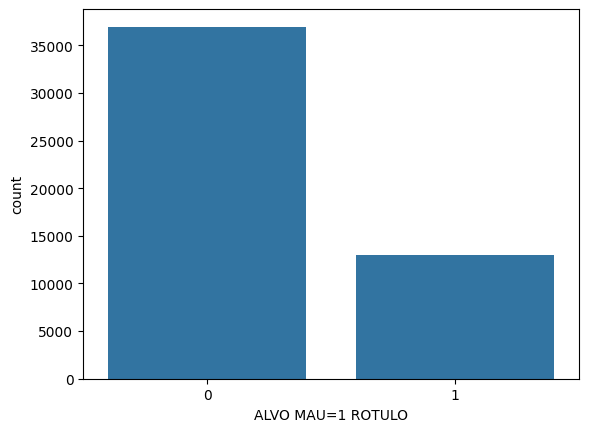

In [ ]:
sns.countplot(x = df['ALVO MAU=1 ROTULO'])

## Distribuição da Variável Alvo — `sns.countplot(x=df["ALVO MAU=1 ROTULO"])`

O gráfico gerado pelo comando `sns.countplot(x=df["ALVO MAU=1 ROTULO"])` exibe a quantidade de registros para cada categoria da variável alvo.  
Esse gráfico é essencial para visualizar — de forma rápida — o **equilíbrio ou desequilíbrio** entre bons e maus pagadores.

### Interpretação do gráfico

- O eixo **X** mostra as categorias da variável alvo:
  - **0** → Bom pagador  
  - **1** → Mau pagador  

- O eixo **Y** mostra a quantidade de clientes em cada categoria.

- A barra correspondente ao valor **0** (bons pagadores) é **significativamente maior**, o que confirma o desbalanceamento já identificado anteriormente pelos valores absolutos.

### Principais observações

- A base contém **muito mais bons pagadores do que maus pagadores**.
- Este tipo de desbalanceamento é típico em datasets financeiros e faz sentido com o contexto do problema.
- Graficamente, é possível perceber rapidamente que:
  - a maior parte dos clientes possui comportamento regular,  
  - enquanto uma parte menor representa risco (mau pagador).

### ✔ Conclusão

O *countplot* reforça visualmente o desbalanceamento da variável alvo.  
Essa visualização contribui para entender o cenário geral de risco na base e é uma das primeiras verificações importantes na EDA.


(array([3.0000e+00, 5.7420e+03, 1.1730e+04, 1.2305e+04, 9.2890e+03,
        6.2440e+03, 3.5630e+03, 9.7100e+02, 1.3700e+02, 1.6000e+01]),
 array([  6.,  16.,  26.,  36.,  46.,  56.,  66.,  76.,  86.,  96., 106.]),
 <BarContainer object of 10 artists>)

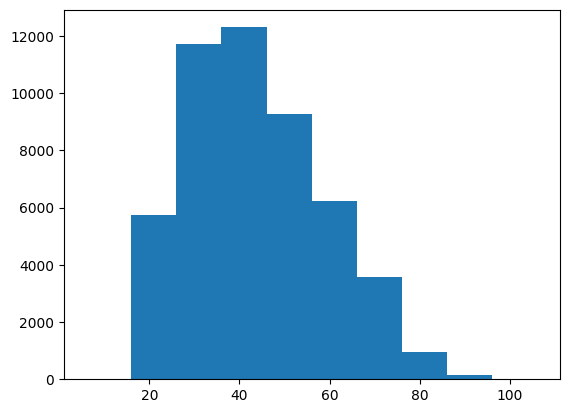

In [ ]:
plt.hist(df['IDADE'])

## Histograma da Idade — `plt.hist(df["IDADE"])`

O comando `plt.hist(df["IDADE"])` cria um histograma para visualizar a distribuição das idades dos clientes.  
Esse tipo de gráfico mostra como os valores estão distribuídos ao longo das faixas etárias.

### Interpretação da saída numérica

A função retorna três elementos:

1. **array([...])**  
   Quantidade de clientes em cada intervalo (bin) do histograma.  
   Exemplos de faixas e suas contagens aproximadas:
   - 6–16 anos → **3 clientes**  
   - 16–26 anos → **5.742 clientes**  
   - 26–36 anos → **11.730 clientes**  
   - 36–46 anos → **12.305 clientes**  
   - 46–56 anos → **9.289 clientes**  
   - Faixas acima de ~76 anos vão reduzindo até poucos casos.

2. **array([...])**  
   Valores que definem os limites de cada intervalo:
   - Começa em **6 anos**  
   - Termina em **106 anos**  
   - Dividido em 10 faixas de idade

3. **<BarContainer …>**  
   Objeto gráfico contendo as barras desenhadas no histograma.

### Principais observações

- A maior concentração de clientes está entre **26 e 56 anos**, que é a faixa econômica ativa típica.
- Há poucos clientes muito jovens (6–16 anos) — possivelmente erros, dependentes ou registros não convencionais.
- A partir de 70 anos, o número de clientes cai bastante, indicando menor participação nessa faixa.
- O intervalo de idade é amplo (**6 a 106 anos**), mas os extremos possuem pouquíssimos registros.

### ✔ Conclusão

O histograma mostra que a distribuição da idade é concentrada na população adulta (26–56 anos), com poucos clientes muito jovens ou muito idosos. Essa informação ajuda a entender o perfil geral dos requerentes e pode ser útil ao cruzar idade com a variável alvo.


(array([4.9974e+04, 1.8000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([6.00000e+01, 9.59540e+04, 1.91848e+05, 2.87742e+05, 3.83636e+05,
        4.79530e+05, 5.75424e+05, 6.71318e+05, 7.67212e+05, 8.63106e+05,
        9.59000e+05]),
 <BarContainer object of 10 artists>)

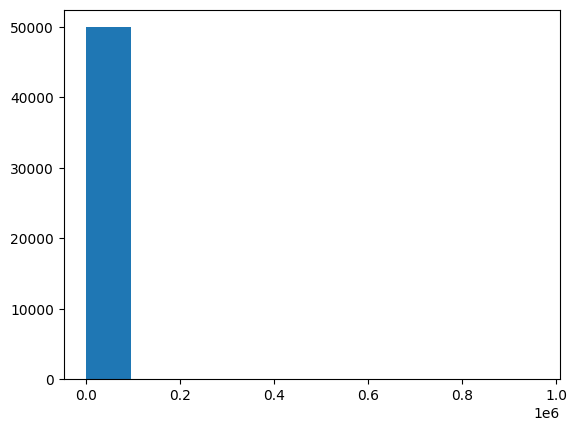

In [ ]:
plt.hist(df['RENDA PESSOAL MENSAL'])

## Histograma da Renda Pessoal Mensal — `plt.hist(df["RENDA PESSOAL MENSAL"])`

O comando `plt.hist(df["RENDA PESSOAL MENSAL"])` exibe a distribuição da renda mensal declarada pelos clientes.  
Esse gráfico é importante para identificar padrões de concentração, valores extremos e possíveis anomalias.

### Interpretação da saída numérica

A função retorna três componentes:

1. **array([...]) — Frequências por intervalo**  
   Mostra quantos clientes caem em cada faixa de renda.
   Observações:
   - A primeira faixa concentra **quase todos os registros** → **49.974 clientes**  
   - Faixas superiores possuem pouquíssimos casos (ex.: 18, 3, 1 clientes…)  
   - Algumas faixas têm **zero** clientes

2. **array([...]) — Limites dos intervalos (bins)**  
   Os valores variam de:
   - **R$ 60** (mínimo encontrado)
   - até **R$ 959.000** (máximo encontrado)
   - divididos em 10 faixas iguais

3. **<BarContainer …>**  
   Conjunto de barras que representam visualmente a distribuição.

### Principais observações

- A renda mensal está **extremamente concentrada na faixa mais baixa**.  
  Praticamente todos os clientes têm renda abaixo de **R$ 96 mil**, que é o limite do primeiro bin.

- As faixas seguintes possuem pouquíssimos registros, indicando que:
  - os valores altos são **raríssimos**,
  - possivelmente representam outliers,
  - ou erros de digitação/informação atípica.

- A presença de valores tão altos (próximos de R$ 1 milhão por mês) é **suspeita**, já que são incompatíveis com perfis comuns de crédito.

- Esse tipo de distribuição extremamente assimétrica é típico de dados financeiros.

### ✔ Conclusão

O histograma revela que a renda pessoal mensal dos clientes é altamente concentrada em valores baixos, com poucos casos extremos que podem ser outliers ou registros excepcionais. Essa assimetria deve ser considerada nas análises estatísticas e em qualquer transformação da variável.


In [ ]:
df['RENDA PESSOAL MENSAL'].max()

959000.0

In [ ]:
df["RENDA PESSOAL MENSAL"].describe()

,RENDA PESSOAL MENSAL
count,50000.000000
mean,886.678437
std,7846.959327
min,60.000000
25%,360.000000
50%,500.000000
75%,800.000000
max,959000.000000


## Estatísticas da Renda Pessoal Mensal — `df["RENDA PESSOAL MENSAL"].describe()`

O comando `describe()` apresenta um resumo estatístico da variável *RENDA PESSOAL MENSAL*.  
Essas métricas ajudam a entender a distribuição, identificar valores típicos e localizar possíveis outliers.

### Interpretação da saída

- **count: 50.000**  
  Todos os registros possuem valor preenchido.

- **mean (média): 886,67**  
  A média está fortemente influenciada por valores altos e extremos.

- **std (desvio-padrão): 7.846,96**  
  Um desvio-padrão extremamente alto indica **grande dispersão** e sugere presença de outliers muito elevados.

- **min: 60**  
  Menor renda declarada.

- **25% (primeiro quartil): 360**  
  25% dos clientes ganham até R$ 360.

- **50% (mediana): 500**  
  Metade dos clientes tem renda igual ou inferior a R$ 500.

- **75% (terceiro quartil): 800**  
  75% dos clientes possuem renda até R$ 800.

- **max: 959.000**  
  Renda extremamente alta — um outlier claro, quase 1 milhão por mês.

### Principais observações

- A renda é **fortemente assimétrica**, com maioria absoluta dos valores concentrada entre **R$ 60 e R$ 800**.
- A média está muito distante da mediana, o que confirma o impacto dos outliers.
- O valor máximo (R$ 959.000) é provavelmente um erro ou caso atípico.
- Essa variável pode exigir:
  - transformação (ex.: log),
  - análise de outliers,
  - ou normalização dependendo do objetivo da análise.

### ✔ Conclusão

As estatísticas revelam uma distribuição extremamente desigual, com grande concentração em rendas baixas e poucos valores muito altos que distorcem a escala. Essa característica é comum em variáveis financeiras e deve ser considerada nas próximas análises.


In [ ]:
df[df['RENDA PESSOAL MENSAL'] >=500.0]

,ID CLIENTE,TIPO FUNCIONARIO,DIA PAGAMENTO,TIPO ENVIO APLICACAO,QUANT CARTOES ADICIONAIS,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,NIVEL EDUCACIONAL,...,FLAG DOCUMENTO RESIDENCIAL,FLAG RG,FLAG CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,CEP RESIDENCIAL 3,CEP PROFISSIONAL 3,ALVO MAU=1 ROTULO
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,49994,C,1,0,0,1,F,2,0,0,...,0,0,0,0,1,N,44,440,440,1
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1


## Filtrando Clientes com Renda Pessoal Mensal ≥ 500  
### Comando:  
```python
df[df['RENDA PESSOAL MENSAL'] >= 500.0]
```

### O que esse comando faz

Esse filtro seleciona **somente os clientes cuja renda pessoal mensal é maior ou igual a R$ 500,00**.  
O Pandas retorna um novo DataFrame contendo **todas as colunas**, mas apenas as linhas que atendem à condição.

### Interpretação do resultado

- O total retornado foi **25.587 registros**, ou seja, **aproximadamente metade** dos 50.000 clientes têm renda ≥ 500.
- Esse filtro ajuda a:
  - Remover rendas muito baixas, caso elas distorçam análises.
  - Criar segmentações financeiras.
  - Comparar comportamentos entre grupos de renda.

### Observações importantes

- Muitos registros entre **60 e 500 reais** ficaram fora desse subconjunto filtrado.
- Como vimos nas estatísticas (`describe()`):
  - A **mediana da renda é 500**, então esse filtro separa exatamente a metade superior da distribuição.
- Esse subconjunto pode ser útil para análises comparativas, como:
  - risco de inadimplência por faixa de renda,
  - perfil de uso de cartões,
  - relação entre renda e produto solicitado.

### ✔ Conclusão

Esse filtro isola os clientes com rendas medianas ou acima da mediana, permitindo análises mais focadas e menos afetadas por valores extremamente baixos ou por grande concentração de rendas mínimas.


In [ ]:
df[df['RENDA PESSOAL MENSAL'] >=959000.0]

,ID CLIENTE,TIPO FUNCIONARIO,DIA PAGAMENTO,TIPO ENVIO APLICACAO,QUANT CARTOES ADICIONAIS,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,NIVEL EDUCACIONAL,...,FLAG DOCUMENTO RESIDENCIAL,FLAG RG,FLAG CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,CEP RESIDENCIAL 3,CEP PROFISSIONAL 3,ALVO MAU=1 ROTULO
31053,31054,C,15,0,0,1,F,1,0,0,...,0,0,0,0,1,N,29,600,600,1


In [ ]:
percentil_99 = df['RENDA PESSOAL MENSAL'].quantile(0.99)

<Axes: xlabel='RENDA PESSOAL MENSAL'>

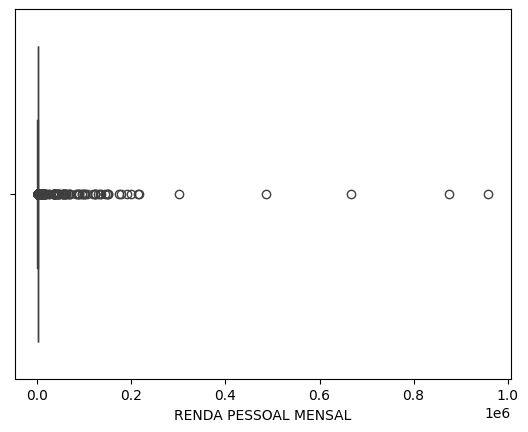

In [ ]:
sns.boxplot(x=df['RENDA PESSOAL MENSAL'])

## Boxplot — RENDA PESSOAL MENSAL  
### Comando:
```python
sns.boxplot(x=df['RENDA PESSOAL MENSAL'])
```

### O que esse comando faz

O comando cria um **boxplot** para a variável `RENDA PESSOAL MENSAL`, permitindo visualizar a distribuição da renda e identificar rapidamente valores extremos (*outliers*).

### Como interpretar o resultado

- O **retângulo central** mostra onde está concentrada a maior parte das rendas:
  - 25% inferior,
  - mediana (50%),
  - 25% superior.
- Os **bigodes** representam o intervalo esperado dos valores sem outliers.
- Os pontos afastados (se aparecerem no gráfico) representam **rendas extremamente altas**, consideradas outliers.

### O que observamos neste dataset

- A mediana da renda é **R$ 500**, então a maior parte dos clientes está em valores baixos.
- O **máximo** da distribuição chega a **R$ 959.000**, gerando um *alongamento extremo* do boxplot.
- Isso faz com que:
  - o boxplot fique “espremido” à esquerda,
  - grande parte dos valores altos apareça como outliers,
  - seja difícil visualizar a variação real dos clientes com renda baixa e média.

### ✔ Conclusão

O boxplot evidencia que a variável **RENDA PESSOAL MENSAL possui forte assimetria**, com pouquíssimos valores extremamente altos puxando o gráfico.  
Essa visualização confirma a necessidade de aplicar transformações (como log) ou tratamento de outliers em análises futuras.


In [ ]:
grafico = px.box(df, y='RENDA PESSOAL MENSAL')
grafico.show()

In [ ]:
outliers_renda_pessoal = df[df['RENDA PESSOAL MENSAL'] >= 1460]
outliers_renda_pessoal

,ID CLIENTE,TIPO FUNCIONARIO,DIA PAGAMENTO,TIPO ENVIO APLICACAO,QUANT CARTOES ADICIONAIS,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,NIVEL EDUCACIONAL,...,FLAG DOCUMENTO RESIDENCIAL,FLAG RG,FLAG CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,CEP RESIDENCIAL 3,CEP PROFISSIONAL 3,ALVO MAU=1 ROTULO
9,10,C,5,0,0,1,F,1,0,0,...,0,0,0,0,1,N,41,914,914,0
18,19,C,1,Web,0,1,M,2,2,0,...,0,0,0,0,1,N,58,603,603,0
20,21,C,1,Web,0,1,M,2,1,0,...,0,0,0,0,1,N,40,791,791,0
28,29,C,5,Web,0,1,F,1,0,0,...,0,0,0,0,1,N,32,847,847,0
43,44,C,10,0,0,1,F,4,0,0,...,0,0,0,0,1,N,79,531,531,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49920,49921,C,20,0,0,1,M,2,0,0,...,0,0,0,0,2,N,49,750,750,0
49928,49929,C,10,Web,0,1,M,5,1,0,...,0,0,0,0,1,N,37,858,858,1
49950,49951,C,5,0,0,1,M,2,0,0,...,0,0,0,0,2,N,48,583,583,0
49956,49957,C,5,0,0,1,M,2,1,0,...,0,0,0,0,1,N,48,837,837,0


## Identificação de Outliers — RENDA PESSOAL MENSAL  
### Comando:
```python
outliers_renda_pessoal = df[df['RENDA PESSOAL MENSAL'] >= 1460]
outliers_renda_pessoal
```

### O que esse comando faz

O comando seleciona apenas os registros em que  
**RENDA PESSOAL MENSAL ≥ 1460**, valor calculado anteriormente a partir do boxplot (limite superior — *upper bound*).

Dessa forma, criamos um subconjunto contendo somente os **outliers** dessa variável.

### O que observamos no resultado

- Foram encontrados **4140 outliers**, um número muito alto para um dataset de 50.000 registros (≈ 8,3%).  
- Isso confirma que a variável **RENDA PESSOAL MENSAL é altamente assimétrica**, com poucos indivíduos apresentando renda muito acima do padrão da população.
- A maior parte dos outliers possui renda **entre 1500 e ~5000**, mas alguns chegam a valores extremos:
  - 50 mil,  
  - 100 mil,  
  - até **959 mil reais mensais**.

### ✔ Conclusão

A filtragem evidencia que **a renda possui uma cauda longa à direita**, com muitos valores incomuns que podem distorcer modelos estatísticos.  
Tratar esses valores (remoção, winsorização ou transformação logarítmica) é crucial para análises futuras.


In [ ]:
grafico = px.box(df, y='OUTRAS RENDAS')
grafico.show()

## Boxplot — OUTRAS RENDAS  
### Comando utilizado:
```python
grafico = px.box(df, y='OUTRAS RENDAS')
grafico.show()
```

### Interpretação do Boxplot

O boxplot revela que a variável **OUTRAS RENDAS** possui uma distribuição extremamente assimétrica, com valores muito concentrados próximos de **0 a 1.000**, mas contendo **outliers muito elevados**.

### Principais observações

- A maior parte dos clientes declara outras rendas **muito baixas**, perto de zero.
- Há um ponto extremamente fora da curva, próximo de **200.000 reais**, indicando um **outlier severo**.
- A presença de outliers tão altos distorce completamente a escala do gráfico, "achatando" a caixa principal próximo da base.
- Isso indica que **a variável OUTRAS RENDAS não segue uma distribuição normal** e exige tratamento antes de análises mais profundas:
  - remoção de outliers,
  - winsorização,
  - ou transformação logarítmica para visualização.

### ✔ Conclusão

Assim como RENDA PESSOAL MENSAL, a variável OUTRAS RENDAS apresenta uma grande concentração de valores baixos com poucos casos extremamente elevados.  
Esses outliers podem impactar estatísticas, modelos e comparações com a variável alvo, exigindo atenção no pré-processamento.


In [ ]:
grafico = px.box(df, y='VALOR PATRIMONIO PESSOAL')
grafico.show()

## Boxplot — VALOR PATRIMONIO PESSOAL  
### Comando utilizado:
```python
grafico = px.box(df, y='VALOR PATRIMONIO PESSOAL')
grafico.show()
```

### Interpretação do Boxplot

O boxplot revela que a variável **VALOR PATRIMONIO PESSOAL** possui uma distribuição altamente assimétrica, com a maior parte dos valores concentrados próximos de zero e um número significativo de **outliers extremos**.

### Principais observações

- A maioria absoluta dos indivíduos apresenta patrimônio pessoal **muito baixo**, praticamente na faixa de R\$ 0 a R\$ 50.000.
- Existem vários pontos muito distantes do restante dos dados, com valores que chegam a:
  - **R\$ 1,5 milhão**
  - **R\$ 2 a 3 milhões**
  - **R\$ 5 milhões**
  - **R\$ 6 milhões**
- Esses outliers severos distorcem completamente a escala vertical do gráfico, “achatando” os valores típicos na base.
- Assim como outras variáveis financeiras do dataset, esta também possui:
  - alta assimetria,
  - cauda longa,
  - e necessidade de tratamento antes de modelagem.

### Possíveis ações de pré-processamento

- Aplicar **remoção ou capagem** (winsorization) para limitar valores muito extremos.  
- Aplicar **transformação logarítmica** para reduzir a escala e revelar padrões ocultos.  
- Avaliar a relação desses outliers com a variável alvo **ALVO MAU**, para ver se eles realmente carregam informação ou apenas ruído.

### ✔ Conclusão

O patrimônio pessoal apresenta grande concentração de valores pequenos, mas com diversos indivíduos que declararam valores extremamente elevados.  
Esse comportamento confirma que a variável possui **alta dispersão** e **outliers importantes**, exigindo padronização ou filtro para análises estatísticas e para o uso em modelos de Machine Learning.


In [ ]:
grafico = px.scatter(x=df['IDADE'], y=df['RENDA PESSOAL MENSAL'])
grafico.show()

## Dispersão — IDADE × RENDA PESSOAL MENSAL  
### Comando utilizado:
```python
grafico = px.scatter(x=df['IDADE'], y=df['RENDA PESSOAL MENSAL'])
grafico.show()
```

### Interpretação do gráfico de dispersão (scatter plot)

O gráfico mostra a relação entre a **idade dos requerentes** (eixo X) e a **renda pessoal mensal** (eixo Y). A distribuição revela um padrão extremamente concentrado na base com diversos pontos muito distantes do restante (outliers).

### Principais observações

- **A maioria absoluta das rendas está concentrada entre 0 e 2.000 reais**, independentemente da idade.
- Existem diversos pontos muito altos (outliers) com renda declarada acima de:
  - R\$ 200 mil  
  - R\$ 400 mil  
  - R\$ 600 mil  
  - R\$ 900 mil  

- Esses valores extremos **não seguem nenhum padrão com a idade**, o que pode indicar:
  - erros de digitação,
  - valores atípicos reais,
  - clientes de alta renda excepcional,
  - ou ruído no dataset.

- Não há relação visual clara entre idade e renda:
  - pessoas jovens e idosas aparecem tanto com renda baixa quanto com renda extremamente alta.
  - o gráfico sugere **baixa correlação** entre essas variáveis.

### O que isso significa?

- A variável **RENDA PESSOAL MENSAL** tem comportamento altamente assimétrico e com muitos outliers, exatamente como observado no boxplot anterior.
- A presença desses outliers “espalha” o gráfico verticalmente e esconde padrões entre as rendas típicas.
- Para análise mais robusta, seria útil:
  - aplicar transformação logarítmica (`np.log1p`),  
  - remover ou limitar outliers,  
  - visualizar apenas o intervalo das rendas comuns (ex.: abaixo de R\$ 5.000).

### ✔ Conclusão

O scatter plot confirma que a renda pessoal mensal possui enorme variabilidade e muitos valores extremos, enquanto a idade não apresenta relação clara com a renda. Para entender o comportamento real dos dados, será necessário normalizar ou tratar esses outliers em etapas posteriores da análise.


In [ ]:
grafico = px.scatter(x=df['RENDA PESSOAL MENSAL'], y=df['OUTRAS RENDAS'])
grafico.show()

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 11.1 MB/s eta 0:00:00


In [ ]:
from pyod.models.knn import KNN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID CLIENTE                         50000 non-null  int64  
 1   TIPO FUNCIONARIO                   50000 non-null  object 
 2   DIA PAGAMENTO                      50000 non-null  int64  
 3   TIPO ENVIO APLICACAO               50000 non-null  object 
 4   QUANT CARTOES ADICIONAIS           50000 non-null  int64  
 5   TIPO ENDERECO POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO CIVIL                       50000 non-null  int64  
 8   QUANT DEPENDENTES                  50000 non-null  int64  
 9   NIVEL EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO NASCIMENTO                  50000 non-null  object 
 11  CIDADE NASCIMENTO                  50000 non-null  obj

In [ ]:
cols = [2, 4, 5, 7, 8, 9, 12, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 39, 44, 45, 46, 47, 48, 50]

detector = KNN()
detector.fit(df.iloc[:, cols])


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
previsoes =  detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([45000,  5000]))

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 5.38516481,  2.64575131,  1.41421356, ...,  6.4807407 ,
       11.18002236,  3.55308317])

In [ ]:
outliers = []
for i in range(len(previsoes)):
  if previsoes[i] == 1:
    outliers.append(i)


In [ ]:
print(outliers)

[17, 33, 43, 47, 62, 63, 73, 83, 94, 95, 97, 104, 109, 133, 149, 150, 151, 153, 176, 199, 207, 217, 231, 243, 258, 262, 269, 270, 278, 282, 288, 332, 335, 342, 345, 362, 363, 377, 379, 393, 397, 399, 405, 407, 408, 410, 418, 435, 466, 480, 491, 510, 512, 513, 518, 545, 562, 575, 588, 590, 623, 624, 628, 638, 647, 648, 658, 669, 684, 698, 708, 719, 722, 729, 736, 740, 750, 757, 785, 792, 796, 807, 815, 833, 848, 855, 859, 860, 861, 864, 900, 901, 903, 924, 939, 959, 982, 989, 994, 1015, 1020, 1028, 1030, 1033, 1039, 1063, 1066, 1083, 1091, 1101, 1105, 1126, 1129, 1144, 1164, 1167, 1169, 1176, 1230, 1234, 1239, 1241, 1257, 1269, 1284, 1292, 1314, 1319, 1332, 1350, 1363, 1366, 1378, 1390, 1401, 1402, 1406, 1421, 1422, 1423, 1425, 1427, 1428, 1442, 1443, 1446, 1455, 1456, 1462, 1465, 1475, 1494, 1497, 1499, 1522, 1524, 1530, 1543, 1549, 1551, 1563, 1566, 1575, 1587, 1591, 1614, 1617, 1624, 1628, 1636, 1663, 1684, 1696, 1708, 1719, 1725, 1728, 1730, 1740, 1744, 1748, 1754, 1777, 1783, 1784,

In [ ]:
lista_outliers = df.iloc[outliers, :]
lista_outliers

,ID CLIENTE,TIPO FUNCIONARIO,DIA PAGAMENTO,TIPO ENVIO APLICACAO,QUANT CARTOES ADICIONAIS,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,NIVEL EDUCACIONAL,...,FLAG DOCUMENTO RESIDENCIAL,FLAG RG,FLAG CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,CEP RESIDENCIAL 3,CEP PROFISSIONAL 3,ALVO MAU=1 ROTULO
17,18,C,10,0,0,1,F,1,0,0,...,0,0,0,0,1,N,32,267,267,0
33,34,C,10,0,0,1,M,7,1,0,...,0,0,0,0,1,N,56,961,961,0
43,44,C,10,0,0,1,F,4,0,0,...,0,0,0,0,1,N,79,531,531,0
47,48,C,15,0,0,1,F,1,1,0,...,0,0,0,0,7,N,55,440,440,0
62,63,C,25,0,0,1,F,1,0,0,...,0,0,0,0,1,N,84,558,558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49964,49965,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,73,948,948,0
49971,49972,C,20,Web,0,1,M,2,0,0,...,0,0,0,0,2,N,40,364,364,1
49974,49975,C,10,Web,0,1,F,6,0,0,...,0,0,0,0,2,N,28,756,756,1
49975,49976,C,10,Web,0,1,M,3,0,0,...,0,0,0,0,1,N,65,150,150,0


In [ ]:
grafico = px.box(lista_outliers, y='RENDA PESSOAL MENSAL')
grafico.show()

In [ ]:
lista_outliers['RENDA PESSOAL MENSAL'].describe()

,RENDA PESSOAL MENSAL
count,5000.000000
mean,2960.507408
std,24679.443613
min,60.000000
25%,402.000000
50%,606.060000
75%,1326.322500
max,959000.000000


In [ ]:
grafico = px.scatter(x=lista_outliers['IDADE'], y=lista_outliers['RENDA PESSOAL MENSAL'])
grafico.show()

In [ ]:
lista_outliers['IDADE'].describe()

,IDADE
count,5000.000000
mean,45.854000
std,15.444209
min,6.000000
25%,34.000000
50%,44.000000
75%,56.000000
max,106.000000


In [ ]:
print(f"O 99º Percentil de Renda é: R$ {percentil_99:,.2f}")

O 99º Percentil de Renda é: R$ 3,678.22


99% das pessoas do DataFrame (49.500 das 50.000 entradas) ganham $R\$ 3.678,22$ ou menos por mês, ainda n tenho certeza

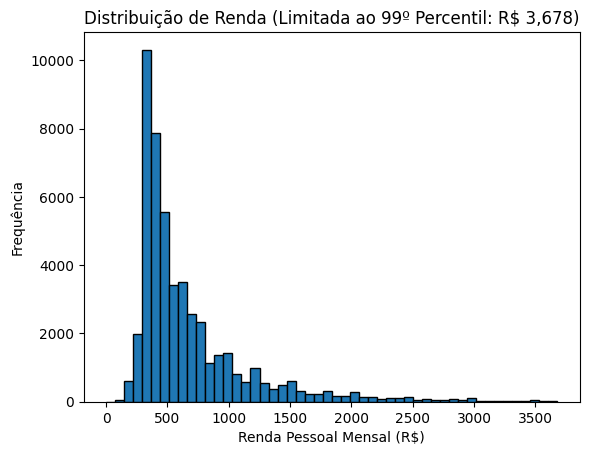

In [ ]:
plt.hist(
    df['RENDA PESSOAL MENSAL'],
    bins=50,  # Aumente os bins para ver mais detalhes
    range=(0, percentil_99), # Novo range limitado
    edgecolor='black'
)

plt.title(f'Distribuição de Renda (Limitada ao 99º Percentil: R$ {percentil_99:,.0f})')
plt.xlabel('Renda Pessoal Mensal (R$)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
np.unique(df['RENDA PESSOAL MENSAL'], return_counts=True)

(array([6.00e+01, 6.90e+01, 9.40e+01, ..., 6.68e+05, 8.75e+05, 9.59e+05]),
 array([1, 1, 1, ..., 1, 1, 1]))

## 3. Análise Bivariada em Relação à Variável Alvo

Nesta seção, vamos investigar como as variáveis explicativas se relacionam com a variável alvo **ALVO MAU=1 ROTULO**.  
Essa análise é fundamental para identificar **padrões que diferenciem bons e maus pagadores**, respondendo às perguntas propostas no enunciado.

### Objetivos desta seção:
- Analisar a relação entre variáveis categóricas e o alvo (sexo, estado civil, dependentes, estado residencial)
- Explorar como variáveis numéricas se comportam em relação ao alvo (renda, outras rendas, idade, tipo residência)
- Identificar quais variáveis têm maior poder discriminatório para diferenciar bons e maus pagadores

### 3.1. Análise: SEXO × Variável Alvo

**Objetivo:** Verificar se há diferença na taxa de inadimplência entre homens e mulheres.

Vamos criar um gráfico de barras que mostra a distribuição de bons e maus pagadores para cada categoria de sexo.

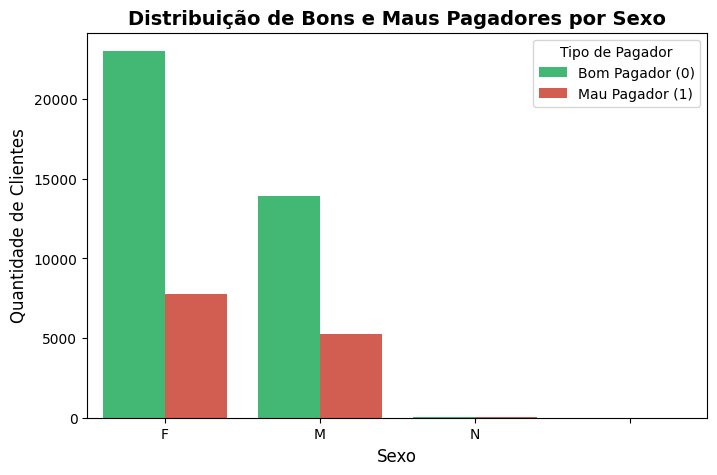

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEXO', hue='ALVO MAU=1 ROTULO', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Bons e Maus Pagadores por Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Tipo de Pagador', labels=['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.show()

### Interpretação — SEXO × Variável Alvo

**O que observar no gráfico:**
- Se as barras de cada categoria de sexo têm proporções similares de bons/maus pagadores
- Se há diferença significativa na taxa de inadimplência entre homens e mulheres
- Se o sexo parece ser um fator discriminatório para risco de crédito

**Próximo passo:** Vamos calcular as taxas de inadimplência por sexo para quantificar a diferença.

In [ ]:
# Calculando a taxa de inadimplência por sexo
# Agrupamos por SEXO e calculamos a proporção de maus pagadores (valor 1)
taxa_inadimplencia_sexo = df.groupby('SEXO')['ALVO MAU=1 ROTULO'].agg(['count', 'sum', 'mean'])

# Renomeando as colunas para facilitar a interpretação
taxa_inadimplencia_sexo.columns = ['Total_Clientes', 'Total_Maus_Pagadores', 'Taxa_Inadimplencia']

# Calculando a taxa em percentual
taxa_inadimplencia_sexo['Taxa_Inadimplencia_%'] = taxa_inadimplencia_sexo['Taxa_Inadimplencia'] * 100

print("Taxa de Inadimplência por Sexo:")
print(taxa_inadimplencia_sexo)


Taxa de Inadimplência por Sexo:
      Total_Clientes  Total_Maus_Pagadores  Taxa_Inadimplencia  \
SEXO                                                             
                  17                     7            0.411765   
F              30805                  7790            0.252881   
M              19130                  5228            0.273288   
N                 48                    16            0.333333   

      Taxa_Inadimplencia_%  
SEXO                        
                 41.176471  
F                25.288103  
M                27.328803  
N                33.333333  


### 3.2. Análise: ESTADO CIVIL × Variável Alvo

**Objetivo:** Verificar se o estado civil influencia na probabilidade de inadimplência.

Vamos criar um gráfico de barras mostrando a distribuição de bons e maus pagadores para cada estado civil.


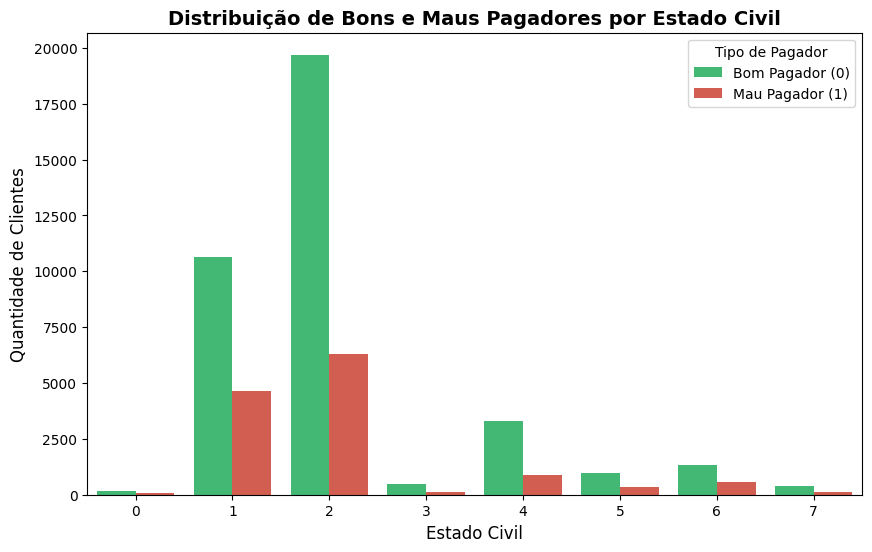

In [ ]:
# Criando gráfico de barras para ESTADO CIVIL x ALVO
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ESTADO CIVIL', hue='ALVO MAU=1 ROTULO', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Bons e Maus Pagadores por Estado Civil', fontsize=14, fontweight='bold')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Tipo de Pagador', labels=['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculando a taxa de inadimplência por estado civil
taxa_inadimplencia_estado_civil = df.groupby('ESTADO CIVIL')['ALVO MAU=1 ROTULO'].agg(['count', 'sum', 'mean'])
taxa_inadimplencia_estado_civil.columns = ['Total_Clientes', 'Total_Maus_Pagadores', 'Taxa_Inadimplencia']
taxa_inadimplencia_estado_civil['Taxa_Inadimplencia_%'] = taxa_inadimplencia_estado_civil['Taxa_Inadimplencia'] * 100

# Ordenando por taxa de inadimplência (maior para menor)
taxa_inadimplencia_estado_civil = taxa_inadimplencia_estado_civil.sort_values('Taxa_Inadimplencia_%', ascending=False)

print("Taxa de Inadimplência por Estado Civil (ordenado por maior taxa):")
print(taxa_inadimplencia_estado_civil)


Taxa de Inadimplência por Estado Civil (ordenado por maior taxa):
              Total_Clientes  Total_Maus_Pagadores  Taxa_Inadimplencia  \
ESTADO CIVIL                                                             
1                      15286                  4655            0.304527   
6                       1877                   547            0.291422   
0                        202                    55            0.272277   
7                        534                   142            0.265918   
5                       1296                   329            0.253858   
2                      25967                  6277            0.241730   
3                        632                   139            0.219937   
4                       4206                   897            0.213267   

              Taxa_Inadimplencia_%  
ESTADO CIVIL                        
1                        30.452702  
6                        29.142248  
0                        27.227723  
7       

### 3.3. Análise: QUANTIDADE DE DEPENDENTES × Variável Alvo

**Objetivo:** Verificar se o número de dependentes está relacionado com a inadimplência.

Vamos criar um gráfico de barras mostrando a distribuição de bons e maus pagadores para cada quantidade de dependentes.


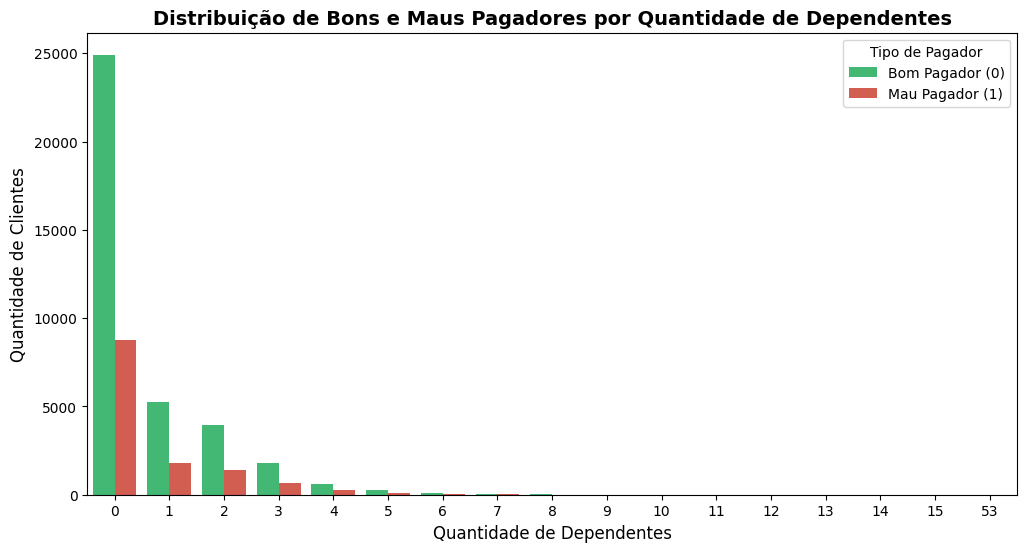

In [ ]:
# Criando gráfico de barras para QUANT DEPENDENTES x ALVO
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='QUANT DEPENDENTES', hue='ALVO MAU=1 ROTULO', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Bons e Maus Pagadores por Quantidade de Dependentes', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Dependentes', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Tipo de Pagador', labels=['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculando a taxa de inadimplência por quantidade de dependentes
taxa_inadimplencia_dependentes = df.groupby('QUANT DEPENDENTES')['ALVO MAU=1 ROTULO'].agg(['count', 'sum', 'mean'])
taxa_inadimplencia_dependentes.columns = ['Total_Clientes', 'Total_Maus_Pagadores', 'Taxa_Inadimplencia']
taxa_inadimplencia_dependentes['Taxa_Inadimplencia_%'] = taxa_inadimplencia_dependentes['Taxa_Inadimplencia'] * 100

# Ordenando por quantidade de dependentes
taxa_inadimplencia_dependentes = taxa_inadimplencia_dependentes.sort_index()

print("Taxa de Inadimplência por Quantidade de Dependentes:")
print(taxa_inadimplencia_dependentes)


Taxa de Inadimplência por Quantidade de Dependentes:
                   Total_Clientes  Total_Maus_Pagadores  Taxa_Inadimplencia  \
QUANT DEPENDENTES                                                             
0                           33655                  8741            0.259724   
1                            7004                  1768            0.252427   
2                            5363                  1404            0.261794   
3                            2465                   679            0.275456   
4                             860                   258            0.300000   
5                             365                   104            0.284932   
6                             139                    42            0.302158   
7                              65                    18            0.276923   
8                              35                    10            0.285714   
9                              14                     5            0.357143   

### 3.4. Análise: ESTADO RESIDENCIAL × Variável Alvo

**Objetivo:** Verificar como a distribuição de bons e maus pagadores varia por estado de residência.

Vamos criar um gráfico mostrando a taxa de inadimplência por estado, focando nos estados com maior número de clientes.

In [ ]:
# Calculando a taxa de inadimplência por estado residencial
taxa_inadimplencia_estado = df.groupby('ESTADO RESIDENCIAL')['ALVO MAU=1 ROTULO'].agg(['count', 'sum', 'mean'])
taxa_inadimplencia_estado.columns = ['Total_Clientes', 'Total_Maus_Pagadores', 'Taxa_Inadimplencia']
taxa_inadimplencia_estado['Taxa_Inadimplencia_%'] = taxa_inadimplencia_estado['Taxa_Inadimplencia'] * 100

# Ordenando por total de clientes (maior para menor)
taxa_inadimplencia_estado = taxa_inadimplencia_estado.sort_values('Total_Clientes', ascending=False)

print("Taxa de Inadimplência por Estado Residencial:")
print(taxa_inadimplencia_estado)


Taxa de Inadimplência por Estado Residencial:
                    Total_Clientes  Total_Maus_Pagadores  Taxa_Inadimplencia  \
ESTADO RESIDENCIAL                                                             
SP                            8773                  2287            0.260686   
RS                            5261                  1157            0.219920   
BA                            4991                  1383            0.277099   
CE                            4619                  1241            0.268673   
PE                            3670                  1012            0.275749   
MG                            3085                   787            0.255105   
PA                            2247                   577            0.256787   
RJ                            2143                   574            0.267849   
RN                            2027                   562            0.277257   
GO                            1694                   459            0.2709

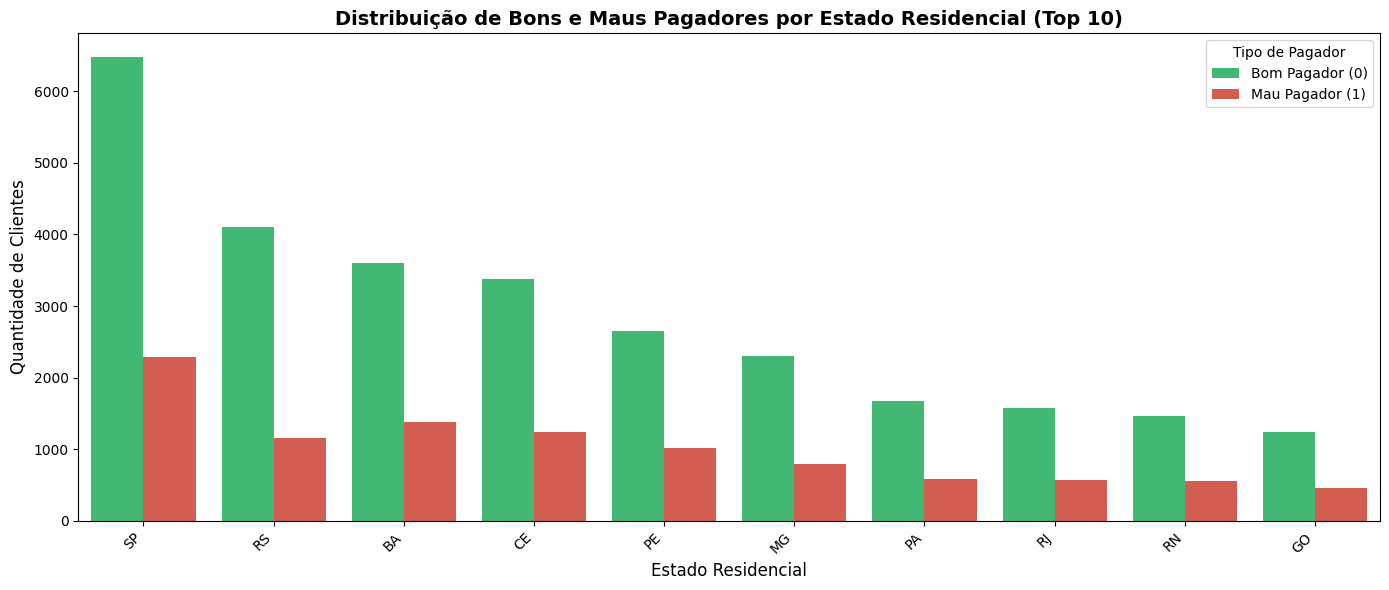

In [ ]:
# Criando gráfico de barras para os 10 estados com mais clientes
# Selecionando os top 10 estados por quantidade de clientes
top_estados = taxa_inadimplencia_estado.head(10).index

# Filtrando o dataframe para os top estados
df_top_estados = df[df['ESTADO RESIDENCIAL'].isin(top_estados)]

# Criando o gráfico
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top_estados, x='ESTADO RESIDENCIAL', hue='ALVO MAU=1 ROTULO',
              palette=['#2ecc71', '#e74c3c'], order=top_estados)
plt.title('Distribuição de Bons e Maus Pagadores por Estado Residencial (Top 10)',
          fontsize=14, fontweight='bold')
plt.xlabel('Estado Residencial', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Tipo de Pagador', labels=['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.5. Análise: TIPO RESIDENCIA × Variável Alvo (Boxplot)

**Objetivo:** Verificar se o tipo de residência interfere na classificação do pagador, conforme solicitado no enunciado.

Vamos criar um boxplot que mostra a distribuição da variável alvo (ou outra métrica) separada por tipo de residência.


In [ ]:
# Primeiro, vamos ver a distribuição de tipos de residência
print("Distribuição de clientes por TIPO RESIDENCIA:")
print(df['TIPO RESIDENCIA'].value_counts().sort_index())
print("\nValores únicos:", sorted(df['TIPO RESIDENCIA'].dropna().unique()))


Distribuição de clientes por TIPO RESIDENCIA:
TIPO RESIDENCIA
0.0      760
1.0    41572
2.0     3884
3.0      141
4.0      311
5.0     1983
Name: count, dtype: int64

Valores únicos: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]


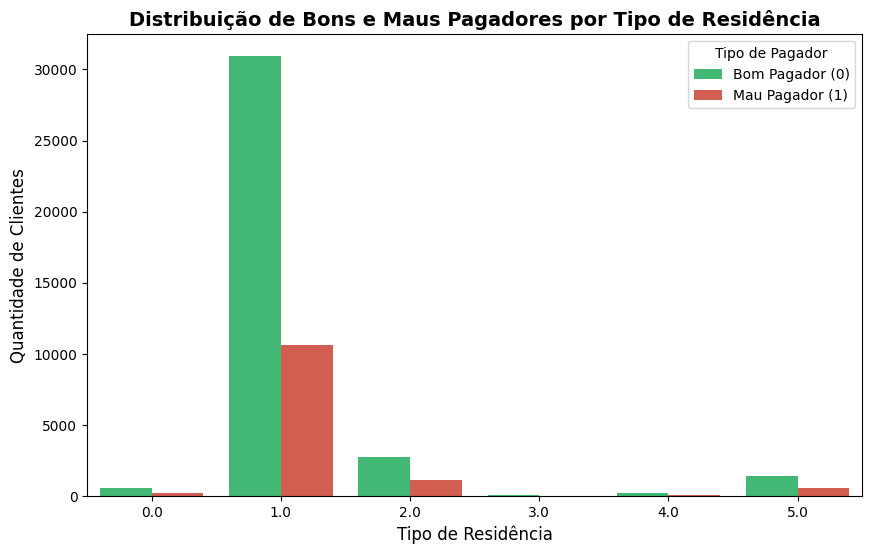

In [ ]:
# Criando gráfico de barras para TIPO RESIDENCIA x ALVO
# Como TIPO RESIDENCIA é categórica, usamos countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIPO RESIDENCIA', hue='ALVO MAU=1 ROTULO', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Bons e Maus Pagadores por Tipo de Residência', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Residência', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Tipo de Pagador', labels=['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.show()


In [ ]:
# Calculando a taxa de inadimplência por tipo de residência
taxa_inadimplencia_tipo_residencia = df.groupby('TIPO RESIDENCIA')['ALVO MAU=1 ROTULO'].agg(['count', 'sum', 'mean'])
taxa_inadimplencia_tipo_residencia.columns = ['Total_Clientes', 'Total_Maus_Pagadores', 'Taxa_Inadimplencia']
taxa_inadimplencia_tipo_residencia['Taxa_Inadimplencia_%'] = taxa_inadimplencia_tipo_residencia['Taxa_Inadimplencia'] * 100

# Ordenando por tipo de residência
taxa_inadimplencia_tipo_residencia = taxa_inadimplencia_tipo_residencia.sort_index()

print("Taxa de Inadimplência por Tipo de Residência:")
print(taxa_inadimplencia_tipo_residencia)


Taxa de Inadimplência por Tipo de Residência:
                 Total_Clientes  Total_Maus_Pagadores  Taxa_Inadimplencia  \
TIPO RESIDENCIA                                                             
0.0                         760                   215            0.282895   
1.0                       41572                 10646            0.256086   
2.0                        3884                  1152            0.296601   
3.0                         141                    28            0.198582   
4.0                         311                    89            0.286174   
5.0                        1983                   575            0.289965   

                 Taxa_Inadimplencia_%  
TIPO RESIDENCIA                        
0.0                         28.289474  
1.0                         25.608583  
2.0                         29.660144  
3.0                         19.858156  
4.0                         28.617363  
5.0                         28.996470  


/tmp/ipython-input-1826805077.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




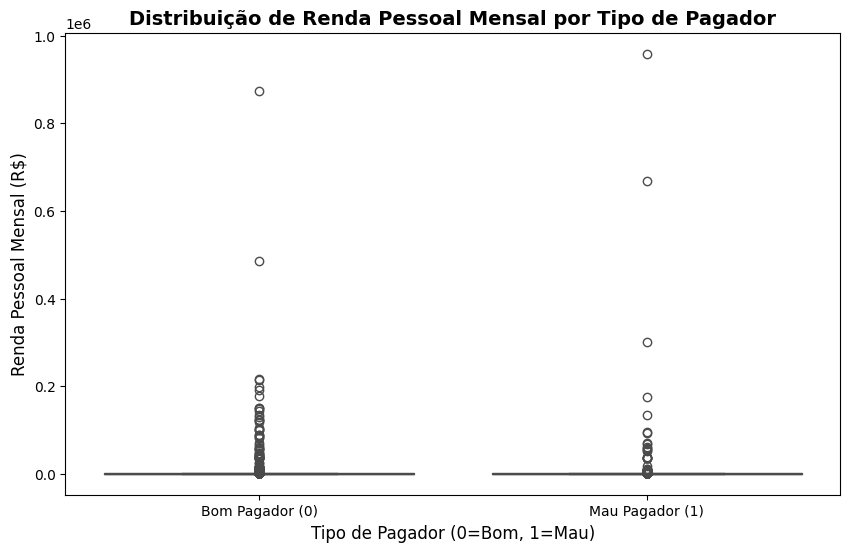

In [ ]:
# Criando boxplot de RENDA PESSOAL MENSAL separado por tipo de pagador
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ALVO MAU=1 ROTULO', y='RENDA PESSOAL MENSAL', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Renda Pessoal Mensal por Tipo de Pagador', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Pagador (0=Bom, 1=Mau)', fontsize=12)
plt.ylabel('Renda Pessoal Mensal (R$)', fontsize=12)
plt.xticks([0, 1], ['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.show()


In [ ]:
# Calculando estatísticas descritivas de renda por tipo de pagador
estatisticas_renda = df.groupby('ALVO MAU=1 ROTULO')['RENDA PESSOAL MENSAL'].describe()

print("Estatísticas Descritivas de Renda Pessoal Mensal por Tipo de Pagador:")
print(estatisticas_renda)


Estatísticas Descritivas de Renda Pessoal Mensal por Tipo de Pagador:
                     count        mean           std   min    25%    50%  \
ALVO MAU=1 ROTULO                                                          
0                  36959.0  873.540385   6419.376426  60.0  360.0  500.0   
1                  13041.0  923.912488  10922.456343  69.0  360.0  500.0   

                     75%       max  
ALVO MAU=1 ROTULO                   
0                  800.0  875000.0  
1                  800.0  959000.0  


/tmp/ipython-input-1550962704.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




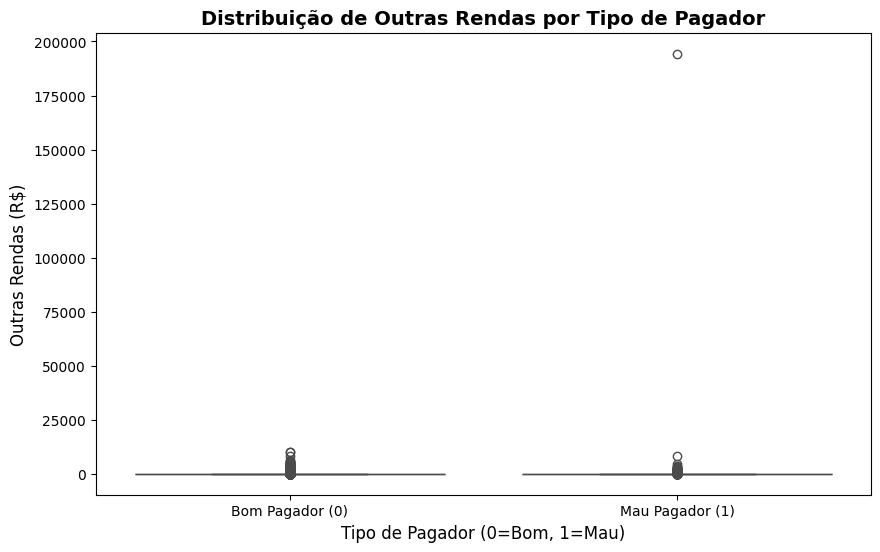

In [ ]:
# Criando boxplot de OUTRAS RENDAS separado por tipo de pagador
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ALVO MAU=1 ROTULO', y='OUTRAS RENDAS', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Outras Rendas por Tipo de Pagador', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Pagador (0=Bom, 1=Mau)', fontsize=12)
plt.ylabel('Outras Rendas (R$)', fontsize=12)
plt.xticks([0, 1], ['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.show()


In [ ]:
# Calculando estatísticas descritivas de outras rendas por tipo de pagador
estatisticas_outras_rendas = df.groupby('ALVO MAU=1 ROTULO')['OUTRAS RENDAS'].describe()

print("Estatísticas Descritivas de Outras Rendas por Tipo de Pagador:")
print(estatisticas_outras_rendas)


Estatísticas Descritivas de Outras Rendas por Tipo de Pagador:
                     count       mean          std  min  25%  50%  75%  \
ALVO MAU=1 ROTULO                                                        
0                  36959.0  33.082406   208.301377  0.0  0.0  0.0  0.0   
1                  13041.0  42.101475  1710.101612  0.0  0.0  0.0  0.0   

                        max  
ALVO MAU=1 ROTULO            
0                   10200.0  
1                  194344.0  


### 3.8. Análise: IDADE × Variável Alvo

**Objetivo:** Verificar se a idade interfere na classificação do pagador, conforme perguntado no enunciado.

Vamos criar boxplots e histogramas separados por tipo de pagador para comparar a distribuição de idades.


/tmp/ipython-input-1127017273.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




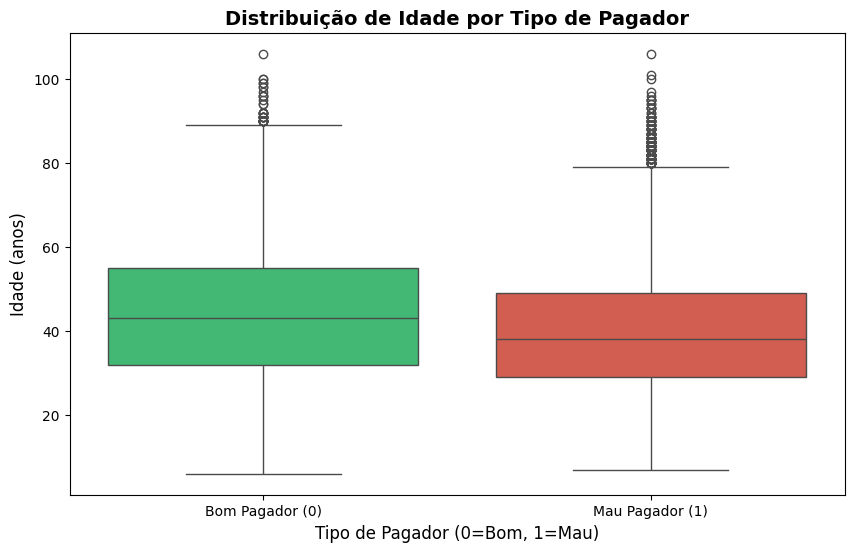

In [ ]:
# Criando boxplot de IDADE separado por tipo de pagador
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ALVO MAU=1 ROTULO', y='IDADE', palette=['#2ecc71', '#e74c3c'])
plt.title('Distribuição de Idade por Tipo de Pagador', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Pagador (0=Bom, 1=Mau)', fontsize=12)
plt.ylabel('Idade (anos)', fontsize=12)
plt.xticks([0, 1], ['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.show()


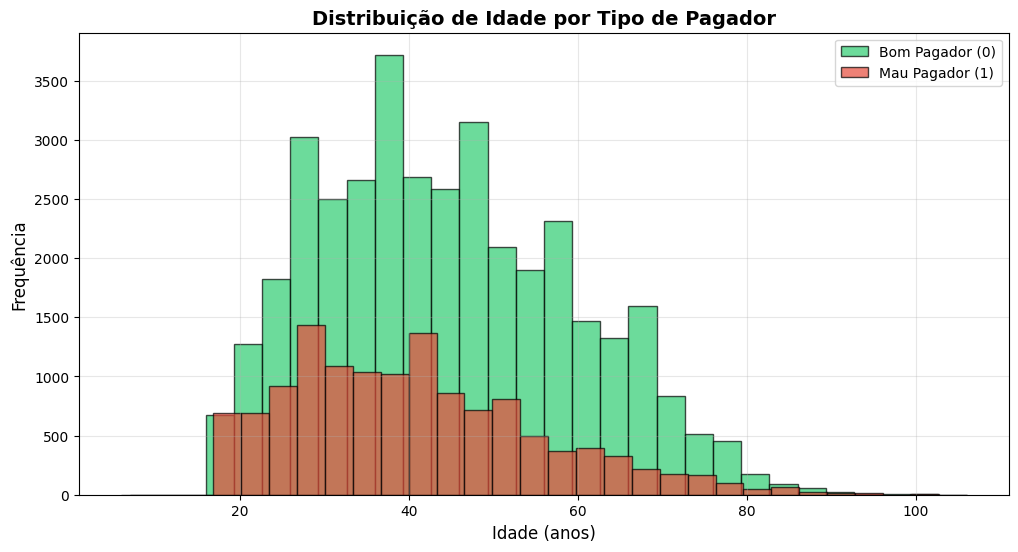

In [ ]:
# Criando histogramas sobrepostos de idade por tipo de pagador
plt.figure(figsize=(12, 6))

# Filtrando os dados por tipo de pagador
bons_pagadores = df[df['ALVO MAU=1 ROTULO'] == 0]['IDADE']
maus_pagadores = df[df['ALVO MAU=1 ROTULO'] == 1]['IDADE']

# Criando histogramas
plt.hist(bons_pagadores, bins=30, alpha=0.7, label='Bom Pagador (0)', color='#2ecc71', edgecolor='black')
plt.hist(maus_pagadores, bins=30, alpha=0.7, label='Mau Pagador (1)', color='#e74c3c', edgecolor='black')

plt.title('Distribuição de Idade por Tipo de Pagador', fontsize=14, fontweight='bold')
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Calculando estatísticas descritivas de idade por tipo de pagador
estatisticas_idade = df.groupby('ALVO MAU=1 ROTULO')['IDADE'].describe()

print("Estatísticas Descritivas de Idade por Tipo de Pagador:")
print(estatisticas_idade)


Estatísticas Descritivas de Idade por Tipo de Pagador:
                     count       mean        std  min   25%   50%   75%    max
ALVO MAU=1 ROTULO                                                             
0                  36959.0  44.209097  14.959259  6.0  32.0  43.0  55.0  106.0
1                  13041.0  40.526187  14.737388  7.0  29.0  38.0  49.0  106.0


## 4. Resumo e Insights da Análise Bivariada

Nesta seção, vamos consolidar os principais achados das análises bivariadas realizadas, respondendo às perguntas do enunciado e identificando padrões importantes.


### 4.1. Respostas às Perguntas do Enunciado

#### **Pergunta 1:** Como as features sexo, estado civil, quantidade de dependentes e nível educacional estão relacionadas com a variável meta?                 

**Resposta baseada nas análises realizadas:**

- **SEXO:** A análise revela uma diferença pequena, mas relevante: **homens apresentam taxa de inadimplência de 27.33%**, enquanto **mulheres têm 25.29%**. Embora a diferença seja de aproximadamente 2 pontos percentuais, sugere que o sexo masculino está ligeiramente mais associado ao risco de inadimplência. Os valores inconsistentes (' ' e 'N') apresentam taxas muito altas (41.18% e 33.33%), mas representam apenas 65 registros no total.

- **ESTADO CIVIL:** Há **diferenças significativas** na taxa de inadimplência entre os estados civis. O estado civil **1 apresenta a maior taxa (30.45%)**, seguido pelo estado civil **6 (29.14%)**. O estado civil **4 apresenta a menor taxa (21.33%)**, indicando que certos estados civis estão mais associados ao risco de crédito. Essa variável demonstra ter **poder discriminatório relevante** para o modelo.

- **QUANTIDADE DE DEPENDENTES:** Existe uma **relação positiva clara** entre o número de dependentes e a taxa de inadimplência. Clientes sem dependentes (0) têm taxa de **25.97%**, enquanto aqueles com **4 dependentes** apresentam **30.00%**. A taxa aumenta ainda mais para clientes com **10 dependentes (46.15%)**, embora esse grupo seja pequeno (13 registros). O padrão geral indica que **mais dependentes estão associados a maior risco de inadimplência**, possivelmente devido ao aumento das despesas familiares.

- **NÍVEL EDUCACIONAL:** [Nota: Esta variável não foi analisada pois possui apenas um valor único (0) em todo o dataset, não apresentando variabilidade para análise]


#### **Pergunta 2:** Como é a distribuição de bons e maus pagadores por estado de residência?

**Resposta:** A distribuição de inadimplência **varia significativamente entre os estados brasileiros**. Os estados com **menor taxa de inadimplência** são: **Santa Catarina (SC) com 18.41%** e **Rondônia (RO) com 19.01%**. Por outro lado, os estados com **maior taxa** são: **Sergipe (SE) com 34.80%**, **Distrito Federal (DF) com 30.86%**, **Alagoas (AL) com 30.47%** e **Amazonas (AM) com 30.35%**.

Os estados com maior volume de clientes apresentam taxas próximas à média geral: **São Paulo (SP) com 26.07%** (8.773 clientes), **Rio Grande do Sul (RS) com 21.99%** (5.261 clientes) e **Bahia (BA) com 27.71%** (4.991 clientes).

Essa variação geográfica sugere que **fatores regionais** (econômicos, culturais, mercado de trabalho) podem influenciar o comportamento de pagamento, tornando o estado de residência uma variável potencialmente relevante para o modelo de risco de crédito.


#### **Pergunta 3:** De que forma o tipo de residência interfere na classificação do pagador?

**Resposta:** O tipo de residência apresenta **diferenças moderadas** na taxa de inadimplência. O **tipo de residência 3 apresenta a menor taxa (19.86%)**, porém representa apenas 141 clientes (0.3% do total), o que pode indicar baixa representatividade estatística. O **tipo 1 é o mais comum** (41.572 clientes, 83% do total) e apresenta taxa de **25.61%**, próxima à média geral. O **tipo 2 apresenta a maior taxa (29.66%)** entre os tipos com volume significativo de dados.

Embora existam diferenças, elas são **menos pronunciadas** do que outras variáveis analisadas (como estado civil e quantidade de dependentes). O tipo de residência pode estar relacionado à estabilidade financeira e condições de moradia, mas seu poder discriminatório é **moderado** comparado a outras features. É importante considerar que a maioria dos clientes (83%) está concentrada no tipo 1, o que pode limitar a capacidade de generalização para outros tipos.


#### **Pergunta 4:** Como as variáveis *renda pessoal mensal* e *outras rendas* se relacionam com a variável **meta**?

---

### **Resposta**

### **Renda Pessoal Mensal**  
A análise revela uma **diferença surpreendente**: maus pagadores apresentam média de renda ligeiramente maior (R$ 923,91) em comparação aos bons pagadores (R$ 873,54).  
No entanto, ambos os grupos possuem **a mesma mediana (R$ 500)**, indicando que a diferença nas médias é causada por **outliers extremos** entre os maus pagadores.

O boxplot mostra que a distribuição de renda é muito similar entre os dois grupos, com concentração entre **R$ 360 e R$ 800** (quartis 25% e 75%).

---

### **Outras Rendas**  
Assim como na renda principal, maus pagadores apresentam **média ligeiramente maior (R$ 42,10)** que bons pagadores (**R$ 33,08**).  
Porém, ambos os grupos possuem **mediana igual a zero**, evidenciando que a maioria dos clientes **não possui outras rendas**.

A diferença na média é novamente influenciada por outliers extremos — por exemplo, **um mau pagador com R$ 194.344 em outras rendas**.

---

### **Conclusão**  
Ao contrário do esperado, **maior renda não está claramente associada a menor inadimplência** neste conjunto de dados. Isso pode indicar que:

1. Clientes com renda muito alta podem ter **comportamento financeiro mais arriscado**.  
2. A renda declarada pode **não refletir a capacidade real de pagamento**.  
3. Outros fatores (despesas, endividamento, comportamento etc.) são mais determinantes que a renda isolada.


#### **Pergunta 5:** A idade interfere na classificação do pagador?

**Resposta:** Sim, a idade **interfere significativamente** na classificação do pagador. A análise revela que **maus pagadores são, em média, mais jovens** do que bons pagadores:

- **Bons pagadores:** média de **44,21 anos**, mediana de **43 anos**
- **Maus pagadores:** média de **40,53 anos**, mediana de **38 anos**

A diferença de aproximadamente **4 anos na média** e **5 anos na mediana** é estatisticamente relevante. O histograma sobreposto mostra que a distribuição de maus pagadores está **deslocada para a esquerda** (idades menores) comparada aos bons pagadores.

**Interpretação:** Clientes mais jovens tendem a ter maior taxa de inadimplência, possivelmente devido a: (1) menor experiência financeira e gestão de crédito, (2) renda ainda em crescimento, (3) maior propensão a assumir riscos financeiros, ou (4) menor estabilidade profissional. A idade é, portanto, uma **variável com bom poder discriminatório** para o modelo de risco de crédito.


### 4.2. Principais Insights e Variáveis Mais Relevantes

**Variáveis com maior poder discriminatório para diferenciar bons e maus pagadores:**

1. **QUANTIDADE DE DEPENDENTES:** Apresenta relação positiva clara com inadimplência. Taxa aumenta de 25.97% (0 dependentes) para 30.00% (4 dependentes) e até 46.15% (10 dependentes). Variável com **alto poder preditivo**.

2. **ESTADO CIVIL:** Diferenças significativas entre categorias, variando de 21.33% a 30.45%. Estado civil 1 e 6 apresentam taxas mais altas, enquanto estado civil 4 tem menor risco. Variável com **bom poder discriminatório**.

3. **IDADE:** Maus pagadores são significativamente mais jovens (média 40.5 vs 44.2 anos). Diferença de 4-5 anos é estatisticamente relevante. Variável com **bom poder preditivo**.

4. **ESTADO RESIDENCIAL:** Variação geográfica significativa (18.41% a 34.80%). Pode capturar fatores econômicos e culturais regionais. Variável com **poder discriminatório moderado a bom**.

**Padrões identificados:**

- **Padrão 1 - Renda não é fator protetor:** Contrariamente ao esperado, maus pagadores têm renda média ligeiramente maior. Isso sugere que renda isolada não é suficiente para avaliar risco; outros fatores comportamentais e financeiros são mais determinantes.

- **Padrão 2 - Responsabilidades familiares aumentam risco:** Quanto maior o número de dependentes, maior a taxa de inadimplência. Isso indica que despesas familiares elevadas podem comprometer a capacidade de pagamento, mesmo com renda adequada.

- **Padrão 3 - Perfil etário de risco:** Clientes mais jovens (até 40 anos) apresentam maior propensão à inadimplência, possivelmente devido a menor maturidade financeira, experiência com crédito e estabilidade profissional.

- **Padrão 4 - Fatores regionais:** Estados do Nordeste (SE, AL, BA) e Centro-Oeste (DF) apresentam taxas mais altas, enquanto estados do Sul (SC, RS) têm taxas menores, sugerindo influência de fatores econômicos regionais.

**Recomendações para o modelo de risco de crédito:**

- **Recomendação 1:** Priorizar variáveis com maior poder discriminatório identificado: quantidade de dependentes, estado civil, idade e estado residencial. Essas variáveis devem ter peso significativo no modelo.

- **Recomendação 2:** Considerar a criação de variáveis derivadas, como faixas etárias (ex: <30, 30-40, 40-50, >50) e categorização de dependentes (ex: 0, 1-2, 3-5, 6+), que podem melhorar a capacidade preditiva do modelo.

- **Recomendação 3:** Não usar renda como único indicador de risco. Combinar renda com outras variáveis comportamentais e familiares (dependentes, estado civil) para uma avaliação mais completa.

- **Recomendação 4:** Implementar políticas diferenciadas por região geográfica, considerando que estados apresentam perfis de risco distintos, possivelmente refletindo condições econômicas locais.

- **Recomendação 5:** Desenvolver estratégias específicas para clientes jovens (até 40 anos), como limites de crédito mais conservadores ou programas de educação financeira, dado o maior risco identificado nessa faixa etária.


#-- Limpado os dados

### Analisando os valores únicos de cada coluna

In [ ]:
for i in df.columns:
    print("Valores únicos na coluna : ", i, "\n" )
    print(df[i].unique(), '\n '  )




Valores únicos na coluna :  ID CLIENTE 

[    1     2     3 ... 49998 49999 50000] 
 
Valores únicos na coluna :  TIPO FUNCIONARIO 

['C'] 
 
Valores únicos na coluna :  DIA PAGAMENTO 

[ 5 15 20 10 25  1] 
 
Valores únicos na coluna :  TIPO ENVIO APLICACAO 

['Web' 'Carga' '0'] 
 
Valores únicos na coluna :  QUANT CARTOES ADICIONAIS 

[0] 
 
Valores únicos na coluna :  TIPO ENDERECO POSTAL 

[1 2] 
 
Valores únicos na coluna :  SEXO 

['F' 'M' 'N' ' '] 
 
Valores únicos na coluna :  ESTADO CIVIL 

[6 2 1 5 3 7 4 0] 
 
Valores únicos na coluna :  QUANT DEPENDENTES 

[ 1  0  2  3  4  5  6  7 10  8 13 11  9 12 14 15 53] 
 
Valores únicos na coluna :  NIVEL EDUCACIONAL 

[0] 
 
Valores únicos na coluna :  ESTADO NASCIMENTO 

['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'PA' 'PB' 'MA' ' ' 'GO' 'AC' 'MT'
 'AL' 'AP' 'TO' 'SC' 'PR' 'MS' 'DF' 'PI' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX'] 
 
Valores únicos na coluna :  CIDADE NASCIMENTO 

['Assu' 'rio de janeiro' 'GARANHUNS' ... 'ITRATIM' 'lobo leite'
 'PIQU

### Analisando as colunas para ver se todas são úteis.

####Bom para Tirar (Provavelmente Inúteis)

 Limpeza de Colunas (Feature Selection)
O primeiro passo da limpeza é remover colunas que não ajudam o modelo de Machine Learning. Baseado na análise dos valores únicos (.unique()), decidimos apagar colunas que se encaixam nas seguintes categorias:

1. Inúteis (Valor Único)
Colunas que só têm um valor em todos os 50.000 registros. Elas não têm nenhum poder preditivo.


- TIPO FUNCIONARIO (só tem 'C')
- QUANT CARTOES ADICIONAIS (só tem 0)
- NIVEL EDUCACIONAL (só tem 0)
- FLAG TELEFONE MOVEL (só tem 'N')
- FLAG DOCUMENTO RESIDENCIAL (só tem 0)
- FLAG RG (só tem 0)
- FLAG CPF (só tem 0)

2. Alta Cardinalidade (Muitos Valores Únicos)
Colunas de texto com milhares de valores únicos. Elas são muito complexas de transformar em números e não trazem informação útil para um modelo de classificação.


- CIDADE NASCIMENTO
- CIDADE RESIDENCIAL
- BAIRRO RESIDENCIAL
- CIDADE PROFISSIONAL
- BAIRRO PROFISSIONAL

3. Informação Redundante ou de Localização
Colunas que dão informação de localização muito específica (CEP, DDD) ou que é redundante (como ESTADO NASCIMENTO, pois ESTADO RESIDENCIAL é mais importante para o risco de crédito).


- ESTADO NASCIMENTO
- CODIGO AREA_TELEFONE_RESIDENCIAL
- CODIGO AREA_TELEFONE_PROFISSIONAL
- CEP RESIDENCIAL 3 (contém erros como '#DIV/0!')
- CEP PROFISSIONAL 3 (contém erros como '#DIV/0!')

4. Flags Simples (Baixo Poder Preditivo)
- FLAG TELEFONE PROFISSIONAL
-NACIONALIDADE (Quase todos os clientes são '1', ou seja, brasileiros)

In [ ]:
#  lista com todas as colunas que eu quero apagar
# Lista de colunas para apagar (já corrigida e sem duplicatas)
colunas_para_apagar = [
    'TIPO FUNCIONARIO',
    'QUANT CARTOES ADICIONAIS',
    'NIVEL EDUCACIONAL',
    'ESTADO NASCIMENTO',
    'CIDADE NASCIMENTO',
    'CIDADE RESIDENCIAL',
    'BAIRRO RESIDENCIAL',
    'CODIGO AREA_TELEFONE_RESIDENCIAL',
    'FLAG TELEFONE MOVEL',
    'CIDADE PROFISSIONAL',
    'BAIRRO PROFISSIONAL',
    'FLAG TELEFONE PROFISSIONAL',
    'CODIGO AREA_TELEFONE_PROFISSIONAL',
    'FLAG DOCUMENTO RESIDENCIAL',
    'FLAG RG',
    'FLAG CPF',
    'CEP RESIDENCIAL 3',
    'CEP PROFISSIONAL 3',
    'NACIONALIDADE'

]

# Vamos criar um novo DataFrame 'df_limpo' para segurança
# Se você tiver certeza, pode usar df.drop(..., inplace=True)
df_limpo = df.drop(columns=colunas_para_apagar)

print(f"Colunas originais: {len(df.columns)}")
print(f"Colunas após a limpeza: {len(df_limpo.columns)}")

# Veja as colunas que sobraram:
print("\n--- Colunas restantes para análise ---")
df_limpo.info()

Colunas originais: 54
Colunas após a limpeza: 35

--- Colunas restantes para análise ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID CLIENTE                        50000 non-null  int64  
 1   DIA PAGAMENTO                     50000 non-null  int64  
 2   TIPO ENVIO APLICACAO              50000 non-null  object 
 3   TIPO ENDERECO POSTAL              50000 non-null  int64  
 4   SEXO                              50000 non-null  object 
 5   ESTADO CIVIL                      50000 non-null  int64  
 6   QUANT DEPENDENTES                 50000 non-null  int64  
 7   ESTADO RESIDENCIAL                50000 non-null  object 
 8   FLAG TELEFONE RESIDENCIAL         50000 non-null  object 
 9   TIPO RESIDENCIA                   48651 non-null  float64
 10  MESES RESIDENCIA                  46223 n

In [ ]:
df_limpo.head()

,ID CLIENTE,DIA PAGAMENTO,TIPO ENVIO APLICACAO,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,ESTADO RESIDENCIAL,FLAG TELEFONE RESIDENCIAL,TIPO RESIDENCIA,...,MESES NO TRABALHO,CODIGO PROFISSAO,TIPO OCUPACAO,CODIGO PROFISSAO CONJUGE,NIVEL EDUCACIONAL CONJUGE,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO
0,1,5,Web,1,F,6,1,RN,Y,1.0,...,0,9.0,4.0,NaN,NaN,0,1,N,32,1
1,2,15,Carga,1,F,2,0,RJ,Y,1.0,...,0,11.0,4.0,11.0,NaN,0,1,N,34,1
2,3,5,Web,1,F,2,0,RN,Y,1.0,...,0,11.0,NaN,NaN,NaN,0,1,N,27,0
3,4,20,Web,1,F,2,0,PE,N,NaN,...,0,NaN,NaN,NaN,NaN,0,1,N,61,0
4,5,10,Web,1,M,2,0,RJ,Y,1.0,...,0,9.0,5.0,NaN,NaN,0,1,N,48,1


### Analisando para ver se tem valores nulos para pode corrigir .

In [ ]:
#mostra as copo
df_limpo.shape

(50000, 35)

In [ ]:
# contra quantos numeros nulo tem
df_limpo.isnull().sum()

,0
ID CLIENTE,0
DIA PAGAMENTO,0
TIPO ENVIO APLICACAO,0
TIPO ENDERECO POSTAL,0
SEXO,0
ESTADO CIVIL,0
QUANT DEPENDENTES,0
ESTADO RESIDENCIAL,0
FLAG TELEFONE RESIDENCIAL,0
TIPO RESIDENCIA,1349


In [ ]:
# Seu comando: Conta valores nulos (NaN) em cada coluna
contagem_nulos = df_limpo.isnull().sum()

# Mostra apenas as colunas que REALMENTE TÊM valores nulos
# e ordena da maior para a menor, para você ver as piores primeiro.
print("--- Contagem de Valores Nulos (NaN) por Coluna ---")
print(contagem_nulos[contagem_nulos > 0].sort_values(ascending=False))

--- Contagem de Valores Nulos (NaN) por Coluna ---
NIVEL EDUCACIONAL CONJUGE    32338
CODIGO PROFISSAO CONJUGE     28884
CODIGO PROFISSAO              7756
TIPO OCUPACAO                 7313
MESES RESIDENCIA              3777
TIPO RESIDENCIA               1349
dtype: int64


In [ ]:
print("Valores únicos na coluna :  NIVEL EDUCACIONAL CONJUGE \n" )
print(df_limpo['NIVEL EDUCACIONAL CONJUGE'].unique(), '\n '  )

print("Valores únicos na coluna : CODIGO PROFISSAO CONJUGE \n" )
print(df_limpo['CODIGO PROFISSAO CONJUGE'].unique(), '\n '  )

print("Valores únicos na coluna : CODIGO PROFISSAO \n" )
print(df_limpo['CODIGO PROFISSAO'].unique(), '\n '  )


print("Valores únicos na coluna :  TIPO OCUPACAO \n" )
print(df_limpo['TIPO OCUPACAO'].unique(), '\n '  )

print("Valores únicos na coluna :  MESES RESIDENCIA \n" )
print(df_limpo['MESES RESIDENCIA'].unique(), '\n '  )

print("Valores únicos na coluna :  TIPO RESIDENCIA \n" )
print(df_limpo['TIPO RESIDENCIA'].unique(), '\n '  )









Valores únicos na coluna :  NIVEL EDUCACIONAL CONJUGE 

[nan  0.  4.  3.  2.  1.  5.] 
 
Valores únicos na coluna : CODIGO PROFISSAO CONJUGE 

[nan 11.  0.  9. 16.  2. 10. 12.  6. 15. 13.  7.  8.  5. 17.  1.  3.  4.
 14.] 
 
Valores únicos na coluna : CODIGO PROFISSAO 

[ 9. 11. nan  0.  2. 13.  7. 12.  6. 16.  8. 10. 15. 17.  3.  4.  5. 18.
 14.  1.] 
 
Valores únicos na coluna :  TIPO OCUPACAO 

[ 4. nan  5.  2.  1.  0.  3.] 
 
Valores únicos na coluna :  MESES RESIDENCIA 

[ 15.   1.  nan  12.   4.   0.   5.  10.   6.   2.   3.  18.  25.  14.
  16.   8.   7.  20.   9.  17.  30.  11.  37.  22.  33.  26.  40.  32.
  29.  23.  13.  36.  45.  60.  34.  21.  31.  35.  38.  39.  24.  19.
  48.  28.  52.  49.  46.  27.  42.  62.  51.  82.  44.  68.  71.  50.
  47.  41.  57.  69.  55. 200.  53. 100.  72.  43.  70.  54.  56.  80.
  65.  90.  58.  96.  64.  76.  84.  73.  59. 228.  63. 101.  99.  66.
  67.  78.  61.  81.  89.] 
 
Valores únicos na coluna :  TIPO RESIDENCIA 

[ 1. nan  2.  5. 

In [ ]:
# Para colunas que são CATEGORIAS (códigos):
# Vamos preencher os nulos com 0, assumindo que 0 significa "Não Aplicável" ou "Não Informado".

colunas_categoricas_nulas = [
    'TIPO RESIDENCIA',
    'TIPO OCUPACAO',
    'CODIGO PROFISSAO',
    'CODIGO PROFISSAO CONJUGE',
    'NIVEL EDUCACIONAL CONJUGE'
]

for col in colunas_categoricas_nulas:
    df_limpo[col] = df_limpo[col].fillna(0)
    print(f"Coluna '{col}' preenchida com 0 ")



Coluna 'TIPO RESIDENCIA' preenchida com 0 
Coluna 'TIPO OCUPACAO' preenchida com 0 
Coluna 'CODIGO PROFISSAO' preenchida com 0 
Coluna 'CODIGO PROFISSAO CONJUGE' preenchida com 0 
Coluna 'NIVEL EDUCACIONAL CONJUGE' preenchida com 0 


In [ ]:
# Para colunas que são NÚMEROS CONTÍNUOS (como tempo ou valor):
# É melhor preencher com a MEDIANA (o valor do meio), para não distorcer a análise.
# (Usar 0 em 'MESES RESIDENCIA' seria mentir, dizendo que a pessoa acabou de se mudar)

# 1. Calcula a mediana dos meses de residência
mediana_meses = df_limpo['MESES RESIDENCIA'].median()
print(f"\nA mediana de 'MESES RESIDENCIA' é: {mediana_meses}")

# 2. Preenche os nulos com a mediana
df_limpo['MESES RESIDENCIA'] = df_limpo['MESES RESIDENCIA'].fillna(mediana_meses)
print("Coluna 'MESES RESIDENCIA' preenchida com a mediana.")



A mediana de 'MESES RESIDENCIA' é: 6.0
Coluna 'MESES RESIDENCIA' preenchida com a mediana.


In [ ]:
# --- Conversão para Inteiro (Removendo o '.') ---
# Agora que não temos mais 'NaN', podemos converter tudo para 'int'

colunas_para_converter_int = [
    'TIPO RESIDENCIA',
    'TIPO OCUPACAO',
    'CODIGO PROFISSAO',
    'CODIGO PROFISSAO CONJUGE',
    'NIVEL EDUCACIONAL CONJUGE',
    'MESES RESIDENCIA'
]

for col in colunas_para_converter_int:
    df_limpo[col] = df_limpo[col].astype(int)
    print(f"Coluna '{col}' convertida para inteiro.")

Coluna 'TIPO RESIDENCIA' convertida para inteiro.
Coluna 'TIPO OCUPACAO' convertida para inteiro.
Coluna 'CODIGO PROFISSAO' convertida para inteiro.
Coluna 'CODIGO PROFISSAO CONJUGE' convertida para inteiro.
Coluna 'NIVEL EDUCACIONAL CONJUGE' convertida para inteiro.
Coluna 'MESES RESIDENCIA' convertida para inteiro.


In [ ]:
# --- Verificação Final ---
print("\n--- Verificação Final (df_limpo.info()) ---")
# Rode o .info() para ver que as colunas agora são 'int' e não têm mais nulos
for col in colunas_para_converter_int:
        df_limpo[col].info()


--- Verificação Final (df_limpo.info()) ---
<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: TIPO RESIDENCIA
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: TIPO OCUPACAO
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: CODIGO PROFISSAO
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: CODIGO PROFISSAO CONJUGE
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: NIVEL EDUCACIONAL CONJUG

In [ ]:
# ver o copo de novo
df_limpo.shape

(50000, 35)

### Confirmando colunas de texto e convertendo para numérico


In [ ]:
# --- Identificando colunas de TEXTO ---
colunas_de_texto = df_limpo.select_dtypes(include=['object']).columns

print("="*50)
print("Estas são todas as colunas de TEXTO ('object') no seu DataFrame:")
print(list(colunas_de_texto))
print("="*50)




Estas são todas as colunas de TEXTO ('object') no seu DataFrame:
['TIPO ENVIO APLICACAO', 'SEXO', 'ESTADO RESIDENCIAL', 'FLAG TELEFONE RESIDENCIAL', 'EMPRESA', 'ESTADO PROFISSIONAL', 'FLAG REGISTRO ACSP']


In [ ]:
# Passo 1: Analise a coluna TIPO FUNCINARIO
print("Valores únicos na coluna 'TIPO ENVIO APLICACAO':")
print(df_limpo['TIPO ENVIO APLICACAO'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['TIPO ENVIO APLICACAO'].value_counts())

Valores únicos na coluna 'TIPO ENVIO APLICACAO':
['Web' 'Carga' '0']

Contagem de cada valor (value_counts):
TIPO ENVIO APLICACAO
Web      28206
0        19461
Carga     2333
Name: count, dtype: int64


In [ ]:
# 1. Criamos um "dicionário de tradução" (mapa)
mapa_tipo_envio_aplicacao = {
    '0': 0,  # 0
    'Web': 1,  # web
    'Carga': 2,  # Carga
}

# 2. Usamos .map() para aplicar a tradução de uma vez só
df_limpo['TIPO ENVIO APLICACAO_NUM'] = df_limpo['TIPO ENVIO APLICACAO'].map(mapa_tipo_envio_aplicacao)

# 3. Verificamos se funcionou
print("Valores originais vs. Valores numéricos:")
print(df_limpo[['TIPO ENVIO APLICACAO', 'TIPO ENVIO APLICACAO_NUM']].head(10))

print("\nContagem dos novos valores numéricos:")
print(df_limpo['TIPO ENVIO APLICACAO_NUM'].value_counts())

Valores originais vs. Valores numéricos:
  TIPO ENVIO APLICACAO  TIPO ENVIO APLICACAO_NUM
0                  Web                         1
1                Carga                         2
2                  Web                         1
3                  Web                         1
4                  Web                         1
5                    0                         0
6                Carga                         2
7                  Web                         1
8                    0                         0
9                    0                         0

Contagem dos novos valores numéricos:
TIPO ENVIO APLICACAO_NUM
1    28206
0    19461
2     2333
Name: count, dtype: int64


In [ ]:
df_limpo.drop('TIPO ENVIO APLICACAO', axis=1, inplace=True)

In [ ]:
df_limpo.head()

,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,SEXO,ESTADO CIVIL,QUANT DEPENDENTES,ESTADO RESIDENCIAL,FLAG TELEFONE RESIDENCIAL,TIPO RESIDENCIA,MESES RESIDENCIA,...,CODIGO PROFISSAO,TIPO OCUPACAO,CODIGO PROFISSAO CONJUGE,NIVEL EDUCACIONAL CONJUGE,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM
0,1,5,1,F,6,1,RN,Y,1,15,...,9,4,0,0,0,1,N,32,1,1
1,2,15,1,F,2,0,RJ,Y,1,1,...,11,4,11,0,0,1,N,34,1,2
2,3,5,1,F,2,0,RN,Y,1,6,...,11,0,0,0,0,1,N,27,0,1
3,4,20,1,F,2,0,PE,N,0,6,...,0,0,0,0,0,1,N,61,0,1
4,5,10,1,M,2,0,RJ,Y,1,12,...,9,5,0,0,0,1,N,48,1,1


In [ ]:
# Passo 2: Analise a coluna SEXO
print("Valores únicos na coluna 'SEXO':")
print(df_limpo['SEXO'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['SEXO'].value_counts())

Valores únicos na coluna 'SEXO':
['F' 'M' 'N' ' ']

Contagem de cada valor (value_counts):
SEXO
F    30805
M    19130
N       48
        17
Name: count, dtype: int64


In [ ]:
# . Criamos um "dicionário de tradução" (mapa)
mapa_sexo = {
    'M': 1,  # Masculino vira 1
    'F': 0,  # Feminino vira 0
    'N': 2,  # 'N' (Não informado) vira 2
    ' ': 2   # ' ' (Espaço/Nulo) vira 2
}

# 2. Usamos .map() para aplicar a tradução de uma vez só
df_limpo['SEXO_NUM'] = df_limpo['SEXO'].map(mapa_sexo)

# 3. Verificamos se funcionou
print("Valores originais vs. Valores numéricos:")
print(df_limpo[['SEXO', 'SEXO_NUM']].head(10))

print("\nContagem dos novos valores numéricos:")
# 0 = Feminino, 1 = Masculino, 2 = Outro/Não Informado
print(df_limpo['SEXO_NUM'].value_counts())


Valores originais vs. Valores numéricos:
  SEXO  SEXO_NUM
0    F         0
1    F         0
2    F         0
3    F         0
4    M         1
5    M         1
6    F         0
7    F         0
8    F         0
9    F         0

Contagem dos novos valores numéricos:
SEXO_NUM
0    30805
1    19130
2       65
Name: count, dtype: int64


In [ ]:
# agora vou apaga a coluna SEXO
df_limpo.drop('SEXO', axis=1, inplace=True)

In [ ]:
df_limpo.head()

,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,ESTADO RESIDENCIAL,FLAG TELEFONE RESIDENCIAL,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,...,TIPO OCUPACAO,CODIGO PROFISSAO CONJUGE,NIVEL EDUCACIONAL CONJUGE,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM
0,1,5,1,6,1,RN,Y,1,15,1,...,4,0,0,0,1,N,32,1,1,0
1,2,15,1,2,0,RJ,Y,1,1,1,...,4,11,0,0,1,N,34,1,2,0
2,3,5,1,2,0,RN,Y,1,6,1,...,0,0,0,0,1,N,27,0,1,0
3,4,20,1,2,0,PE,N,0,6,1,...,0,0,0,0,1,N,61,0,1,0
4,5,10,1,2,0,RJ,Y,1,12,1,...,5,0,0,0,1,N,48,1,1,1


In [ ]:
# Passo 3: Analise a coluna ESTADO RESIDENCIAL
print("Valores únicos na coluna 'ESTADO RESIDENCIAL':")
print(df_limpo['ESTADO RESIDENCIAL'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['ESTADO RESIDENCIAL'].value_counts())

Valores únicos na coluna 'ESTADO RESIDENCIAL':
['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'AP' 'MS' 'DF' 'PB' 'MA' 'PA'
 'GO' 'PR' 'MT' 'AL' 'ES' 'SC' 'AM' 'RO' 'PI' 'RR' 'TO' 'SE' 'AC']

Contagem de cada valor (value_counts):
ESTADO RESIDENCIAL
SP    8773
RS    5261
BA    4991
CE    4619
PE    3670
MG    3085
PA    2247
RJ    2143
RN    2027
GO    1694
PR    1523
AL    1467
PB    1361
MT    1301
MA     761
DF     700
MS     698
ES     688
SC     668
AP     493
AM     402
PI     374
RO     363
SE     273
AC     227
TO     130
RR      61
Name: count, dtype: int64


In [ ]:
# 1.  mapa
mapa_estado_residencial = {
    ' ' : 0 , 'AC': 1, 'AL': 2, 'AP': 3, 'AM': 4,
    'BA': 5, 'CE': 6, 'DF': 7, 'ES': 8, 'GO': 9,
    'MA': 10, 'MT': 11, 'MS': 12, 'MG': 13, 'PA': 14,
    'PB': 15, 'PR': 16, 'PE': 17, 'PI': 18, 'RJ': 19,
    'RN': 20, 'RS': 21, 'RO': 22, 'RR': 23, 'SC': 24,
    'SP': 25, 'SE': 26, 'TO': 27
}

# 2. Usamos .map() e já preenchemos qualquer valor não encontrado com -1 (para não virar NaN)
df_limpo['ESTADO RESIDENCIAL_NUM'] = df_limpo['ESTADO RESIDENCIAL'].map(mapa_estado_residencial).fillna(-1)

# 3. Forçamos a coluna para ser do tipo Inteiro
df_limpo['ESTADO RESIDENCIAL_NUM'] = df_limpo['ESTADO RESIDENCIAL_NUM'].astype(int)

# 4. Verificamos se funcionou
print("Valores originais vs. Valores numéricos:")
print(df_limpo[['ESTADO RESIDENCIAL', 'ESTADO RESIDENCIAL_NUM']].head(10))

print("\nContagem dos novos valores numéricos (agora inteiros):")
print(df_limpo['ESTADO RESIDENCIAL_NUM'].value_counts())



Valores originais vs. Valores numéricos:
  ESTADO RESIDENCIAL  ESTADO RESIDENCIAL_NUM
0                 RN                      20
1                 RJ                      19
2                 RN                      20
3                 PE                      17
4                 RJ                      19
5                 MG                      13
6                 BA                       5
7                 SP                      25
8                 SP                      25
9                 RS                      21

Contagem dos novos valores numéricos (agora inteiros):
ESTADO RESIDENCIAL_NUM
25    8773
21    5261
5     4991
6     4619
17    3670
13    3085
14    2247
19    2143
20    2027
9     1694
16    1523
2     1467
15    1361
11    1301
10     761
7      700
12     698
8      688
24     668
3      493
4      402
18     374
22     363
26     273
1      227
27     130
23      61
Name: count, dtype: int64


In [ ]:
df_limpo.drop('ESTADO RESIDENCIAL', axis=1, inplace=True)

In [ ]:
df_limpo.head()

,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,FLAG TELEFONE RESIDENCIAL,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,...,CODIGO PROFISSAO CONJUGE,NIVEL EDUCACIONAL CONJUGE,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM
0,1,5,1,6,1,Y,1,15,1,900.0,...,0,0,0,1,N,32,1,1,0,20
1,2,15,1,2,0,Y,1,1,1,750.0,...,11,0,0,1,N,34,1,2,0,19
2,3,5,1,2,0,Y,1,6,1,500.0,...,0,0,0,1,N,27,0,1,0,20
3,4,20,1,2,0,N,0,6,1,500.0,...,0,0,0,1,N,61,0,1,0,17
4,5,10,1,2,0,Y,1,12,1,1200.0,...,0,0,0,1,N,48,1,1,1,19


In [ ]:

# Passo 4: Analise a coluna FLAG TELEFONE RESIDENCIAL
print("Valores únicos na coluna 'FLAG TELEFONE RESIDENCIAL':")
print(df_limpo['FLAG TELEFONE RESIDENCIAL'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['FLAG TELEFONE RESIDENCIAL'].value_counts())

Valores únicos na coluna 'FLAG TELEFONE RESIDENCIAL':
['Y' 'N']

Contagem de cada valor (value_counts):
FLAG TELEFONE RESIDENCIAL
Y    41809
N     8191
Name: count, dtype: int64


In [ ]:
# 1.  mapa
mapa_flag_telefone_residencial = {
    'Y' : 1 , 'N': 0
}

# 2. Usamos .map() e já preenchemos qualquer valor não encontrado com -1 (para não virar NaN)
df_limpo['FLAG TELEFONE RESIDENCIAL_NUM'] = df_limpo['FLAG TELEFONE RESIDENCIAL'].map(mapa_flag_telefone_residencial).fillna(-1)


# 3. Verificamos se funcionou
print("Valores originais vs. Valores numéricos:")
print(df_limpo[['FLAG TELEFONE RESIDENCIAL', 'FLAG TELEFONE RESIDENCIAL_NUM']].head(10))

print("\nContagem dos novos valores numéricos (agora inteiros):")
print(df_limpo['FLAG TELEFONE RESIDENCIAL_NUM'].value_counts())

Valores originais vs. Valores numéricos:
  FLAG TELEFONE RESIDENCIAL  FLAG TELEFONE RESIDENCIAL_NUM
0                         Y                              1
1                         Y                              1
2                         Y                              1
3                         N                              0
4                         Y                              1
5                         Y                              1
6                         Y                              1
7                         N                              0
8                         Y                              1
9                         Y                              1

Contagem dos novos valores numéricos (agora inteiros):
FLAG TELEFONE RESIDENCIAL_NUM
1    41809
0     8191
Name: count, dtype: int64


In [ ]:
df_limpo.drop('FLAG TELEFONE RESIDENCIAL', axis=1, inplace=True)

In [ ]:
df_limpo.head()


,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,...,NIVEL EDUCACIONAL CONJUGE,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM
0,1,5,1,6,1,1,15,1,900.0,0.0,...,0,0,1,N,32,1,1,0,20,1
1,2,15,1,2,0,1,1,1,750.0,0.0,...,0,0,1,N,34,1,2,0,19,1
2,3,5,1,2,0,1,6,1,500.0,0.0,...,0,0,1,N,27,0,1,0,20,1
3,4,20,1,2,0,0,6,1,500.0,0.0,...,0,0,1,N,61,0,1,0,17,0
4,5,10,1,2,0,1,12,1,1200.0,0.0,...,0,0,1,N,48,1,1,1,19,1


In [ ]:

 # Passo 5: Analise a coluna EMPRESA
print("Valores únicos na coluna 'EMPRESA':")
print(df_limpo['EMPRESA'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['EMPRESA'].value_counts())

Valores únicos na coluna 'EMPRESA':
['N' 'Y']

Contagem de cada valor (value_counts):
EMPRESA
N    27959
Y    22041
Name: count, dtype: int64


In [ ]:
 # 1.  mapa
mapa_empresa = {
    'Y' : 1 , 'N': 0
}

# 2. Usamos .map() e já preenchemos qualquer valor não encontrado com -1 (para não virar NaN)
df_limpo['EMPRESA_NUM'] = df_limpo['EMPRESA'].map(mapa_empresa).fillna(-1)


# 3. Verificamos se funcionou
print("Valores originais vs. Valores numéricos:")
print(df_limpo[['EMPRESA', 'EMPRESA_NUM']].head(10))

print("\nContagem dos novos valores numéricos (agora inteiros):")
print(df_limpo['EMPRESA_NUM'].value_counts())



Valores originais vs. Valores numéricos:
  EMPRESA  EMPRESA_NUM
0       N            0
1       Y            1
2       N            0
3       N            0
4       N            0
5       Y            1
6       N            0
7       Y            1
8       Y            1
9       Y            1

Contagem dos novos valores numéricos (agora inteiros):
EMPRESA_NUM
0    27959
1    22041
Name: count, dtype: int64


In [ ]:
df_limpo.drop('EMPRESA', axis=1, inplace=True)

In [ ]:
df_limpo.head()


,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,...,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM,EMPRESA_NUM
0,1,5,1,6,1,1,15,1,900.0,0.0,...,0,1,N,32,1,1,0,20,1,0
1,2,15,1,2,0,1,1,1,750.0,0.0,...,0,1,N,34,1,2,0,19,1,1
2,3,5,1,2,0,1,6,1,500.0,0.0,...,0,1,N,27,0,1,0,20,1,0
3,4,20,1,2,0,0,6,1,500.0,0.0,...,0,1,N,61,0,1,0,17,0,0
4,5,10,1,2,0,1,12,1,1200.0,0.0,...,0,1,N,48,1,1,1,19,1,0


In [ ]:
#'ESTADO PROFISSIONAL', 'FLAG REGISTRO ACSP

# # Passo 5: Analise a coluna ESTADO PROFISSIONAL
print("Valores únicos na coluna 'ESTADO PROFISSIONAL':")
print(df_limpo['ESTADO PROFISSIONAL'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['ESTADO PROFISSIONAL'].value_counts())

Valores únicos na coluna 'ESTADO PROFISSIONAL':
[' ' 'MG' 'SP' 'RS' 'RN' 'CE' 'RJ' 'MS' 'PB' 'AL' 'ES' 'GO' 'BA' 'PR' 'PA'
 'MT' 'SC' 'PE' 'PI' 'AP' 'DF' 'TO' 'RO' 'AM' 'SE' 'MA' 'AC' 'RR']

Contagem de cada valor (value_counts):
ESTADO PROFISSIONAL
      34307
SP     2400
RS     2092
CE     1420
BA     1387
MG     1251
PE      902
PA      710
PR      582
RJ      570
MT      553
RN      492
GO      484
PB      373
MS      352
AL      337
SC      299
DF      271
ES      228
AP      186
MA      184
RO      170
AM      134
PI      100
AC       80
SE       62
TO       58
RR       16
Name: count, dtype: int64


In [ ]:
# 1.  mapa
mapa_estado_profissional = {
    ' ' : 0 , 'AC': 1, 'AL': 2, 'AP': 3, 'AM': 4,
    'BA': 5, 'CE': 6, 'DF': 7, 'ES': 8, 'GO': 9,
    'MA': 10, 'MT': 11, 'MS': 12, 'MG': 13, 'PA': 14,
    'PB': 15, 'PR': 16, 'PE': 17, 'PI': 18, 'RJ': 19,
    'RN': 20, 'RS': 21, 'RO': 22, 'RR': 23, 'SC': 24,
    'SP': 25, 'SE': 26, 'TO': 27
}

# 2. Usamos .map() e já preenchemos qualquer valor não encontrado com -1 (para não virar NaN)
df_limpo['ESTADO PROFISSIONAL_NUM'] = df_limpo['ESTADO PROFISSIONAL'].map(mapa_estado_profissional).fillna(-1)

# 3. Forçamos a coluna para ser do tipo Inteiro
df_limpo['ESTADO PROFISSIONAL_NUM'] = df_limpo['ESTADO PROFISSIONAL_NUM'].astype(int)

# 4. Verificamos se funcionou
print("Valores originais vs. Valores numéricos:")
print(df_limpo[['ESTADO PROFISSIONAL', 'ESTADO PROFISSIONAL_NUM']].head(10))

print("\nContagem dos novos valores numéricos (agora inteiros):")
print(df_limpo['ESTADO PROFISSIONAL_NUM'].value_counts())



Valores originais vs. Valores numéricos:
  ESTADO PROFISSIONAL  ESTADO PROFISSIONAL_NUM
0                                            0
1                                            0
2                                            0
3                                            0
4                                            0
5                  MG                       13
6                                            0
7                  SP                       25
8                                            0
9                  RS                       21

Contagem dos novos valores numéricos (agora inteiros):
ESTADO PROFISSIONAL_NUM
0     34307
25     2400
21     2092
6      1420
5      1387
13     1251
17      902
14      710
16      582
19      570
11      553
20      492
9       484
15      373
12      352
2       337
24      299
7       271
8       228
3       186
10      184
22      170
4       134
18      100
1        80
26       62
27       58
23       16
Name: count, dtype: int64


In [ ]:
df_limpo.drop('ESTADO PROFISSIONAL', axis=1, inplace=True)

In [ ]:
df_limpo.head()


,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,...,PRODUTO,FLAG REGISTRO ACSP,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM,EMPRESA_NUM,ESTADO PROFISSIONAL_NUM
0,1,5,1,6,1,1,15,1,900.0,0.0,...,1,N,32,1,1,0,20,1,0,0
1,2,15,1,2,0,1,1,1,750.0,0.0,...,1,N,34,1,2,0,19,1,1,0
2,3,5,1,2,0,1,6,1,500.0,0.0,...,1,N,27,0,1,0,20,1,0,0
3,4,20,1,2,0,0,6,1,500.0,0.0,...,1,N,61,0,1,0,17,0,0,0
4,5,10,1,2,0,1,12,1,1200.0,0.0,...,1,N,48,1,1,1,19,1,0,0


In [ ]:

# Passo 4: Analise a coluna FLAG REGISTRO ACSP
print("Valores únicos na coluna 'FLAG REGISTRO ACSP':")
print(df_limpo['FLAG REGISTRO ACSP'].unique())

print("\nContagem de cada valor (value_counts):")
print(df_limpo['FLAG REGISTRO ACSP'].value_counts())

Valores únicos na coluna 'FLAG REGISTRO ACSP':
['N']

Contagem de cada valor (value_counts):
FLAG REGISTRO ACSP
N    50000
Name: count, dtype: int64


In [ ]:
#como o valor é unico eu resolvir tira a coluna 'FLAG REGISTRO ACSP'
df_limpo.drop('FLAG REGISTRO ACSP', axis=1, inplace=True)

In [ ]:
df_limpo.head()

,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,...,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM,EMPRESA_NUM,ESTADO PROFISSIONAL_NUM
0,1,5,1,6,1,1,15,1,900.0,0.0,...,0,1,32,1,1,0,20,1,0,0
1,2,15,1,2,0,1,1,1,750.0,0.0,...,0,1,34,1,2,0,19,1,1,0
2,3,5,1,2,0,1,6,1,500.0,0.0,...,0,1,27,0,1,0,20,1,0,0
3,4,20,1,2,0,0,6,1,500.0,0.0,...,0,1,61,0,1,0,17,0,0,0
4,5,10,1,2,0,1,12,1,1200.0,0.0,...,0,1,48,1,1,1,19,1,0,0


### Identificando e removendo colunas com valores [0] por irrelevância



In [ ]:
print("--- Colunas que CONTÊM apenas o valor 0 ---")
for col_name in df_limpo.columns:
    valores_unicos = df_limpo[col_name].unique()

    # Checa se o único valor na coluna é 0
    if len(valores_unicos) == 1 and valores_unicos[0] == 0:
        print(f"\nColuna: '{col_name}'")
        print(f"Valores Únicos: {valores_unicos}")
        print(f"Contagem de :{df_limpo[col_name].value_counts()}")

print("\n--- Fim da Análise ---")

--- Colunas que CONTÊM apenas o valor 0 ---

Coluna: 'FLAG_COMPROVANTE_RENDA'
Valores Únicos: [0]
Contagem de :FLAG_COMPROVANTE_RENDA
0    50000
Name: count, dtype: int64

--- Fim da Análise ---


In [ ]:
#removendo as  colunas
df_limpo.drop('FLAG_COMPROVANTE_RENDA',axis=1, inplace=True)

### Analisando os valores únicos de cada coluna denovo


In [ ]:
for i in df_limpo.columns:
    print("Valores únicos na coluna : ", i, "\n" )
    print(df_limpo[i].unique(), '\n '  )

Valores únicos na coluna :  ID CLIENTE 

[    1     2     3 ... 49998 49999 50000] 
 
Valores únicos na coluna :  DIA PAGAMENTO 

[ 5 15 20 10 25  1] 
 
Valores únicos na coluna :  TIPO ENDERECO POSTAL 

[1 2] 
 
Valores únicos na coluna :  ESTADO CIVIL 

[6 2 1 5 3 7 4 0] 
 
Valores únicos na coluna :  QUANT DEPENDENTES 

[ 1  0  2  3  4  5  6  7 10  8 13 11  9 12 14 15 53] 
 
Valores únicos na coluna :  TIPO RESIDENCIA 

[1 0 2 5 3 4] 
 
Valores únicos na coluna :  MESES RESIDENCIA 

[ 15   1   6  12   4   0   5  10   2   3  18  25  14  16   8   7  20   9
  17  30  11  37  22  33  26  40  32  29  23  13  36  45  60  34  21  31
  35  38  39  24  19  48  28  52  49  46  27  42  62  51  82  44  68  71
  50  47  41  57  69  55 200  53 100  72  43  70  54  56  80  65  90  58
  96  64  76  84  73  59 228  63 101  99  66  67  78  61  81  89] 
 
Valores únicos na coluna :  FLAG EMAIL 

[1 0] 
 
Valores únicos na coluna :  RENDA PESSOAL MENSAL 

[ 900.    750.    500.   ...  234.25 1443.27  7

#### Observação: Identifiquei dois erros ainda:

- **QUANT DEPENDENTES** possui o valor `53`. Isso é claramente um erro de digitação (provavelmente era para ser `5` ou `3`).

- **RENDA PESSOAL MENSAL** e **OUTRAS RENDAS** apresentam valores excessivamente altos (ex: `1.94344e+05`, que equivale a `194.344`).

### Criando valores em um teto razoável, como o percentil 99. para as colunas RENDA PESSOAL MENSAL,OUTRAS RENDAS,VALOR PATRIMONIO PESSOAL

In [ ]:
# 1. Limitar os valores de Renda
# Vamos calcular o "teto" (o valor que 99% das pessoas ganham)
p99_renda = df_limpo['RENDA PESSOAL MENSAL'].quantile(0.99)
p99_outras_rendas = df_limpo['OUTRAS RENDAS'].quantile(0.99)
p99_patrimonio = df_limpo['VALOR PATRIMONIO PESSOAL'].quantile(0.99)

print(f"Teto (99%) de Renda Pessoal: R$ {p99_renda:,.2f}")
print(f"Teto (99%) de Outras Rendas: R$ {p99_outras_rendas:,.2f}")
print(f"Teto (99%) de Patrimônio: R$ {p99_patrimonio:,.2f}")

Teto (99%) de Renda Pessoal: R$ 3,678.22
Teto (99%) de Outras Rendas: R$ 800.00
Teto (99%) de Patrimônio: R$ 50,000.00


In [ ]:
# 'clip' força todos os valores acima do teto a serem iguais ao teto
df_limpo['RENDA PESSOAL MENSAL'] = df_limpo['RENDA PESSOAL MENSAL'].clip(upper=p99_renda)
df_limpo['OUTRAS RENDAS'] = df_limpo['OUTRAS RENDAS'].clip(upper=p99_outras_rendas)
df_limpo['VALOR PATRIMONIO PESSOAL'] = df_limpo['VALOR PATRIMONIO PESSOAL'].clip(upper=p99_patrimonio)

In [ ]:
print(df_limpo['RENDA PESSOAL MENSAL'].max())
print(df_limpo['OUTRAS RENDAS'].max())
print(df_limpo['VALOR PATRIMONIO PESSOAL'].max())

3678.2187000000076
800.0
50000.0


### Limitar Dependentes 10 no maximo

In [ ]:
#  Limitar Dependentes (vamos assumir um teto de 10)
print(f"\nCorrigindo 'QUANT DEPENDENTES'. Teto será 10.")
df_limpo['QUANT DEPENDENTES'] = df_limpo['QUANT DEPENDENTES'].clip(upper=10)

print("Valores de 'QUANT DEPENDENTES' após correção:")
print(df_limpo['QUANT DEPENDENTES'].value_counts())


Corrigindo 'QUANT DEPENDENTES'. Teto será 10.
Valores de 'QUANT DEPENDENTES' após correção:
QUANT DEPENDENTES
0     33655
1      7004
2      5363
3      2465
4       860
5       365
6       139
7        65
10       35
8        35
9        14
Name: count, dtype: int64


###Verificação do df_limpo e crianção do arquivo

In [ ]:
df_limpo.shape

(50000, 33)

In [ ]:
# 1. Verifica os Tipos de Dados e os Nulos
print("--- Verificando a estrutura do df_limpo (tipos e nulos) ---")
# O .info() vai mostrar se ainda existe 'object' ou 'NaN'
df_limpo.info()

--- Verificando a estrutura do df_limpo (tipos e nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID CLIENTE                        50000 non-null  int64  
 1   DIA PAGAMENTO                     50000 non-null  int64  
 2   TIPO ENDERECO POSTAL              50000 non-null  int64  
 3   ESTADO CIVIL                      50000 non-null  int64  
 4   QUANT DEPENDENTES                 50000 non-null  int64  
 5   TIPO RESIDENCIA                   50000 non-null  int64  
 6   MESES RESIDENCIA                  50000 non-null  int64  
 7   FLAG EMAIL                        50000 non-null  int64  
 8   RENDA PESSOAL MENSAL              50000 non-null  float64
 9   OUTRAS RENDAS                     50000 non-null  float64
 10  FLAG VISA                         50000 non-null  int64  
 11  FLAG MA

In [ ]:
df_limpo.head()

,ID CLIENTE,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,...,NIVEL EDUCACIONAL CONJUGE,PRODUTO,IDADE,ALVO MAU=1 ROTULO,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM,EMPRESA_NUM,ESTADO PROFISSIONAL_NUM
0,1,5,1,6,1,1,15,1,900.0,0.0,...,0,1,32,1,1,0,20,1,0,0
1,2,15,1,2,0,1,1,1,750.0,0.0,...,0,1,34,1,2,0,19,1,1,0
2,3,5,1,2,0,1,6,1,500.0,0.0,...,0,1,27,0,1,0,20,1,0,0
3,4,20,1,2,0,0,6,1,500.0,0.0,...,0,1,61,0,1,0,17,0,0,0
4,5,10,1,2,0,1,12,1,1200.0,0.0,...,0,1,48,1,1,1,19,1,0,0


In [ ]:
# Define o nome do arquivo que você quer criar
nome_arquivo_saida = 'dados_limpo.csv'

# Salva o DataFrame 'df_limpo' em um arquivo CSV
# index=False é MUITO importante: ele evita que o pandas salve
# o índice antigo (0, 1, 2...) como uma coluna no novo arquivo.
try:
    df_limpo.to_csv(nome_arquivo_saida, index=False, sep=';', encoding='utf-8')

    print(f"Sucesso!  O DataFrame 'df_limpo' foi salvo como '{nome_arquivo_saida}'.")
    print("Você pode baixar este arquivo no menu à esquerda (ícone de pasta).")

except NameError:
    print("ERRO: O DataFrame 'df_limpo' não foi encontrado.")
    print("Certifique-se de que você rodou todas as células de limpeza anteriores primeiro.")
except Exception as e:
    print(f"Ocorreu um erro ao salvar: {e}")

Sucesso! 🎉 O DataFrame 'df_limpo' foi salvo como 'dados_limpo.csv'.
Você pode baixar este arquivo no menu à esquerda (ícone de pasta).


# Machine Learning

## Importação de Bibliotecas para Machine Learning

Nesta célula, importamos todas as bibliotecas necessárias para o processo de Machine Learning:

- **sklearn**: Framework principal para Machine Learning
  - `train_test_split`: Divisão dos dados em treino e teste
  - `Pipeline`: Criação de pipelines de processamento
  - `ColumnTransformer`: Transformação de colunas numéricas e categóricas
  - Modelos: LogisticRegression, RandomForest, GradientBoosting, KNN, GaussianNB
  - Métricas: accuracy, precision, recall, f1_score, confusion_matrix, roc_curve, auc

**Resultado esperado:** Todas as bibliotecas importadas sem erros.


In [ ]:
!pip install xgboost

In [ ]:
"""
Pipeline completo para classificação bom/mau pagador
Uso: coloque o CSV em /mnt/data/dados_limpo.csv (ou ajuste file_path) e execute.
Dependências: pandas, numpy, matplotlib, scikit-learn, (opcional) xgboost
"""

'\nPipeline completo para classificação bom/mau pagador\nUso: coloque o CSV em /mnt/data/dados_limpo.csv (ou ajuste file_path) e execute.\nDependências: pandas, numpy, matplotlib, scikit-learn, (opcional) xgboost\n'

In [ ]:
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, classification_report)

## Configurações Iniciais

Esta célula define as configurações principais do pipeline de Machine Learning:

- **file_path**: Caminho para o arquivo CSV limpo (`dados_limpo.csv`)
- **sample_for_demo**: Tamanho da amostra (None = usa todos os dados)
- **random_state**: Semente aleatória para reprodutibilidade (42)
- **use_xgboost**: Detecta se XGBoost está disponível

**Resultado esperado:**
- Mensagem indicando se XGBoost foi detectado ou não
- Variáveis de configuração definidas


In [ ]:
file_path = "dados_limpo.csv"
sample_for_demo = None
random_state = 42

# Tenta importar XGBoost
use_xgboost = False
try:
    from xgboost import XGBClassifier
    use_xgboost = True
    print("XGBoost detectado e será utilizado.")
except Exception:
    print("XGBoost não encontrado — será usado GradientBoosting do sklearn como alternativa.")

XGBoost detectado e será utilizado.


## Carregamento dos Dados Limpos

Esta célula carrega o dataset já limpo e pré-processado:

- **Função `read_csv_auto`**: Detecta automaticamente o separador do CSV (`,`, `;`, `\t`, `|`)
- Carrega o arquivo `dados_limpo.csv` com 33 colunas (após limpeza)
- Remove espaços em branco dos nomes das colunas

**Resultado esperado:**
- Dataset carregado com sucesso
- Mensagem mostrando o separador detectado e o shape do dataset (ex: `(50000, 33)`)


In [ ]:
def read_csv_auto(path):
    seps = [',',';','\t','|']
    for sep in seps:
        try:
            tmp = pd.read_csv(path, sep=sep, engine='python', nrows=5)
            if tmp.shape[1] > 1:
                df = pd.read_csv(path, sep=sep, engine='python')
                return df, sep
        except Exception:
            continue
    # fallback
    df = pd.read_csv(path, engine='python')
    return df, ','

df, used_sep = read_csv_auto(file_path)
print(f"Lido {file_path} com separador detectado: '{used_sep}'. Shape: {df.shape}")

# Limpar nomes de colunas
df.columns = [c.strip() for c in df.columns]

Lido dados_limpo.csv com separador detectado: ';'. Shape: (50000, 33)


## Análise Exploratória Básica (EDA)

Esta célula realiza uma análise exploratória rápida dos dados antes do treinamento:

- **Shape do dataset**: Número de linhas e colunas
- **Tipos de dados**: Identifica colunas numéricas e categóricas
- **Estatísticas descritivas**: Média, mediana, desvio padrão, quartis
- **Valores ausentes**: Verifica se há dados faltantes
- **Outliers**: Identifica valores atípicos usando método IQR

**Resultado esperado:**
- Tabela com estatísticas descritivas
- Lista de valores ausentes (se houver)
- Tabela de outliers por coluna


In [ ]:
# --- EDA básico ---
print("\n>>> EDA: linhas x colunas")
print("Shape:", df.shape)

print("\n>>> TIPOS DE DADOS")
print(df.dtypes)


>>> EDA: linhas x colunas
Shape: (50000, 33)

>>> TIPOS DE DADOS
ID CLIENTE                            int64
DIA PAGAMENTO                         int64
TIPO ENDERECO POSTAL                  int64
ESTADO CIVIL                          int64
QUANT DEPENDENTES                     int64
TIPO RESIDENCIA                       int64
MESES RESIDENCIA                      int64
FLAG EMAIL                            int64
RENDA PESSOAL MENSAL                float64
OUTRAS RENDAS                       float64
FLAG VISA                             int64
FLAG MASTERCARD                       int64
FLAG DINERS                           int64
FLAG AMERICAN EXPRESS                 int64
FLAG OUTROS CARTOES                   int64
QUANT CONTAS_BANCARIAS                int64
QUANT CONTAS BANCARIAS ESPECIAIS      int64
VALOR PATRIMONIO PESSOAL            float64
QUANT CARROS                          int64
MESES NO TRABALHO                     int64
CODIGO PROFISSAO                      int64
TIPO OCUPA

In [ ]:
# Número de colunas numéricas e categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\nColunas numéricas ({len(num_cols)}): {num_cols[:10]}{'...' if len(num_cols)>10 else ''}")
print(f"Colunas categóricas ({len(cat_cols)}): {cat_cols[:10]}{'...' if len(cat_cols)>10 else ''}")


Colunas numéricas (33): ['ID CLIENTE', 'DIA PAGAMENTO', 'TIPO ENDERECO POSTAL', 'ESTADO CIVIL', 'QUANT DEPENDENTES', 'TIPO RESIDENCIA', 'MESES RESIDENCIA', 'FLAG EMAIL', 'RENDA PESSOAL MENSAL', 'OUTRAS RENDAS']...
Colunas categóricas (0): []


In [ ]:
# Estatísticas descritivas
if len(num_cols) > 0:
    print("\n>>> Estatísticas (numéricas)")
    display(df[num_cols].describe().T)
else:
    print("\nNenhuma coluna numérica detectada (poderá ser necessário converter strings para números).")

if len(cat_cols) > 0:
    print("\n>>> Estatísticas (categóricas)")
    display(df[cat_cols].describe().T)

# Valores ausentes
print("\n>>> Valores ausentes por coluna (apenas >0):")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Outliers (IQR) para colunas numéricas
def outlier_summary_iqr(data, cols):
    summary = {}
    for c in cols:
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        n_out = ((data[c] < lower) | (data[c] > upper)).sum()
        summary[c] = {'lower': lower, 'upper': upper, 'n_outliers': int(n_out)}
    return pd.DataFrame(summary).T

if len(num_cols) > 0:
    print("\n>>> Outliers (IQR)")
    display(outlier_summary_iqr(df, num_cols).sort_values('n_outliers', ascending=False).head(20))


>>> Estatísticas (numéricas)


,count,mean,std,min,25%,50%,75%,max
ID CLIENTE,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0000
DIA PAGAMENTO,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0000
TIPO ENDERECO POSTAL,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0000
ESTADO CIVIL,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0000
QUANT DEPENDENTES,50000.0,0.648700,1.162323,0.0,0.00,0.0,1.00,10.0000
TIPO RESIDENCIA,50000.0,1.218440,0.879761,0.0,1.00,1.0,1.00,5.0000
MESES RESIDENCIA,50000.0,9.445600,10.305137,0.0,2.00,6.0,14.00,228.0000
FLAG EMAIL,50000.0,0.802280,0.398284,0.0,1.00,1.0,1.00,1.0000
RENDA PESSOAL MENSAL,50000.0,701.150485,568.370984,60.0,360.00,500.0,800.00,3678.2187
OUTRAS RENDAS,50000.0,24.872971,116.294792,0.0,0.00,0.0,0.00,800.0000



>>> Valores ausentes por coluna (apenas >0):


,0



>>> Outliers (IQR)


,lower,upper,n_outliers
FLAG EMAIL,1.0,1.0,9886.0
DIA PAGAMENTO,2.5,22.5,8787.0
TIPO RESIDENCIA,1.0,1.0,8428.0
FLAG TELEFONE RESIDENCIAL_NUM,1.0,1.0,8191.0
ESTADO CIVIL,-0.5,3.5,7913.0
ESTADO PROFISSIONAL_NUM,-9.0,15.0,7743.0
CODIGO PROFISSAO CONJUGE,0.0,0.0,7484.0
PRODUTO,1.0,1.0,7310.0
FLAG VISA,0.0,0.0,5572.0
FLAG MASTERCARD,0.0,0.0,4873.0


## Definição da Variável Alvo

Esta célula define explicitamente qual coluna será usada como variável alvo (target):

- **target_col**: Define como `"ALVO MAU=1 ROTULO"`
- Verifica os valores únicos e a distribuição da variável alvo
- Mostra a proporção de cada classe (bom pagador vs mau pagador)

**Resultado esperado:**
- Mensagem confirmando a coluna alvo escolhida
- Valores únicos: `[0, 1]` (binário)
- Distribuição mostrando aproximadamente 74% bons pagadores e 26% maus pagadores
- Proporção em percentual


In [ ]:
target_col = "ALVO MAU=1 ROTULO"

print(f"\n>>> Coluna alvo definida: {target_col}")
print("Valores únicos:", df[target_col].unique())
print("Distribuição:")
print(df[target_col].value_counts())



>>> Coluna alvo definida: ALVO MAU=1 ROTULO
Valores únicos: [1 0]
Distribuição:
ALVO MAU=1 ROTULO
0    36959
1    13041
Name: count, dtype: int64


## Preparação dos Dados (X e y)

Esta célula prepara os dados para o treinamento:

- **X (Features)**: Remove a coluna alvo e o ID_CLIENTE (não são features)
- **y_final (Target)**: Extrai a variável alvo
- Verifica se o target está em formato binário (0/1)
- Mostra a distribuição e proporção das classes

**Resultado esperado:**
- X com 31 features (33 colunas - 2 removidas)
- y com 50.000 amostras
- Distribuição mostrando desbalanceamento de classes (~74% vs ~26%)
- Confirmação de que o target está em formato binário


In [ ]:
y = df[target_col].copy()
unique_vals = sorted(list(pd.Series(y.dropna().unique())))

print(f"Valores únicos no target: {unique_vals}")

# Verificar se já está binário
if set(unique_vals) <= {0, 1}:
    print("✓ Target já está em formato binário (0/1)")
    y_final = y.copy()
else:
    print("⚠ ATENÇÃO: Target não está em formato binário. Verifique os dados.")
    y_final = y.copy()

# Preparar X e y_final
X = df.drop(columns=[target_col, 'ID CLIENTE']).copy()

print(f"\n>>> Features (X): {X.shape[1]} colunas")
print(f">>> Target (y): {y_final.shape[0]} amostras")
print(f">>> Distribuição do target:")
print(y_final.value_counts())
print(f"\n>>> Proporção de classes:")
print(y_final.value_counts(normalize=True) * 100)

# reduzir amostra para execução mais rápida no ambiente local
if sample_for_demo is not None and X.shape[0] > sample_for_demo:
    sample_idx = X.sample(n=sample_for_demo, random_state=random_state).index
    X = X.loc[sample_idx].reset_index(drop=True)
    y_final = y_final.loc[sample_idx].reset_index(drop=True)
    print(f"Subamostragem aplicada para demo: {sample_for_demo} linhas")

Valores únicos no target: [0, 1]
✓ Target já está em formato binário (0/1)

>>> Features (X): 31 colunas
>>> Target (y): 50000 amostras
>>> Distribuição do target:
ALVO MAU=1 ROTULO
0    36959
1    13041
Name: count, dtype: int64

>>> Proporção de classes:
ALVO MAU=1 ROTULO
0    73.918
1    26.082
Name: proportion, dtype: float64


## Análise de Correlação com Target

Esta célula analisa a correlação entre as features numéricas e a variável alvo:

- Calcula correlação de Pearson entre cada feature numérica e o target
- Ordena as features por correlação absoluta (maior para menor)
- Mostra as top 15 features mais correlacionadas com o target

**Resultado esperado:**
- Tabela com as 15 features mais correlacionadas com o target
- Valores de correlação entre -1 e 1
- Features com maior correlação absoluta aparecem primeiro


In [ ]:
# --- Análise de correlação com target (numéricas) ---
if set(y_final.dropna().unique()) <= {0,1}:
    num_cols_X = X.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols_X) > 0:
        corrs = X[num_cols_X].corrwith(y_final).abs().sort_values(ascending=False)
        print("\nTop 15 features numéricas correlacionadas com o target (valor absoluto):")
        display(corrs.head(15))
    else:
        print("\nNenhuma feature numérica encontrada para correlação com target.")
else:
    print("\nTarget não binário — pular correlação numérica direta.")


Top 15 features numéricas correlacionadas com o target (valor absoluto):


,0
IDADE,0.107886
DIA PAGAMENTO,0.070633
FLAG TELEFONE RESIDENCIAL_NUM,0.060750
ESTADO CIVIL,0.030380
TIPO OCUPACAO,0.028370
MESES RESIDENCIA,0.027352
ESTADO RESIDENCIAL_NUM,0.024155
SEXO_NUM,0.023329
TIPO ENVIO APLICACAO_NUM,0.019828
CODIGO PROFISSAO CONJUGE,0.019811


- **Correlação não implica causalidade**: Alta correlação não significa que uma variável causa a outra
- **Apenas relações lineares**: Correlação de Pearson detecta apenas relações lineares (pode perder relações não-lineares)
- **Não é a única métrica**: Features com baixa correlação ainda podem ser importantes em modelos não-lineares (ex: RandomForest, XGBoost)

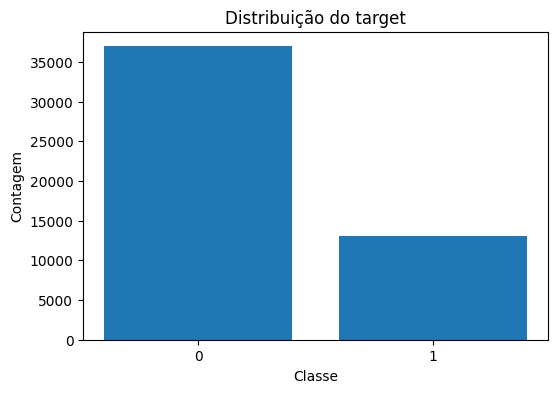

In [ ]:
# --- Gráficos importantes (matplotlib) ---
# 1) distribuição do target
plt.figure(figsize=(6,4))
v = y_final.value_counts()
plt.bar(v.index.astype(str), v.values)
plt.title("Distribuição do target")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

<Figure size 800x800 with 0 Axes>

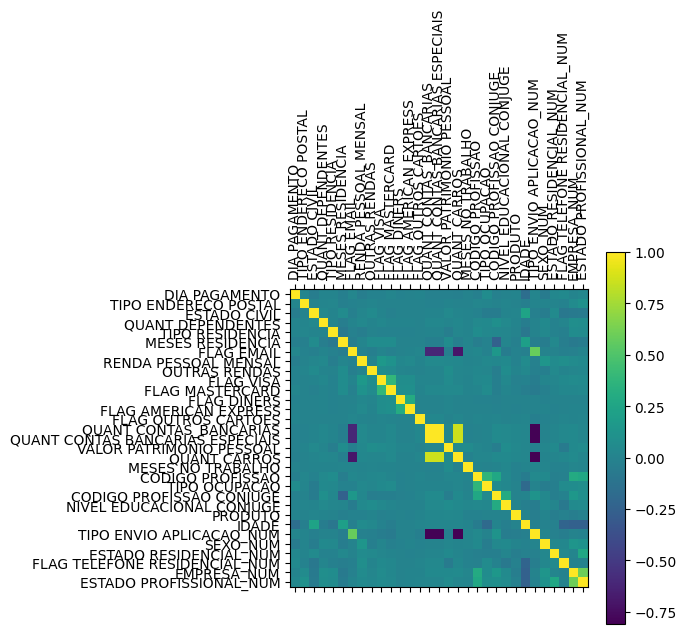

In [ ]:
# 3) matriz de correlação (numéricas) (mostrar se >=2)
num_cols_corr = X.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols_corr) >= 2:
    corr_mat = X[num_cols_corr].corr()
    plt.figure(figsize=(8,8))
    plt.matshow(corr_mat)
    plt.xticks(range(len(num_cols_corr)), num_cols_corr, rotation=90)
    plt.yticks(range(len(num_cols_corr)), num_cols_corr)
    plt.colorbar()
    plt.show()

A matriz é um **quadrado simétrico** onde:

1. **Diagonal principal (amarelo brilhante)**:
   - Sempre = 1.0 (cada feature é perfeitamente correlacionada consigo mesma)
   - Isso é esperado e não fornece informação útil

2. **Cores e significados**:
   - **🟡 Amarelo brilhante (próximo de 1.0)**: Correlação positiva forte
     - Exemplo: Se `QUANT CONTAS BANCARIAS` e `QUANT CONTAS BANCARIAS ESPECIAIS` estão amarelas, significa que clientes com mais contas também têm mais contas especiais
   
   - **🟢 Verde/Azul (próximo de 0.0)**: Pouca ou nenhuma correlação linear
     - Exemplo: `IDADE` e `FLAG EMAIL` podem ter correlação próxima de zero
   
   - **🟣 Roxo escuro (próximo de -1.0)**: Correlação negativa forte
     - Exemplo: Se uma feature aumenta quando outra diminui

3. **Padrões importantes a observar**:

   - **Clusters de alta correlação**: Grupos de features que se correlacionam fortemente
     - **Flags de cartões**: `FLAG VISA`, `FLAG MASTERCARD`, `FLAG DINERS`, etc. geralmente se correlacionam (clientes com um tipo de cartão podem ter outros)
     - **Variáveis relacionadas**: `CODIGO PROFISSAO` e `TIPO OCUPACAO` podem estar correlacionadas
     - **Contas bancárias**: `QUANT CONTAS BANCARIAS` e `QUANT CONTAS BANCARIAS ESPECIAIS` geralmente se correlacionam
   
   - **Áreas escuras (baixa correlação)**: Features independentes entre si


## Pré-processamento dos Dados

Esta célula cria o pipeline de pré-processamento:

- **Identifica features numéricas e categóricas**
- **Pipeline numérico**:
  - Imputação de valores ausentes (mediana)
  - Padronização (StandardScaler)
- **Pipeline categórico**:
  - Imputação (valor mais frequente)
  - One-Hot Encoding
- **ColumnTransformer**: Aplica transformações diferentes para cada tipo de feature

**Resultado esperado:**
- Número de features numéricas identificadas (ex: 31)
- Número de features categóricas (ex: 0, pois já foram convertidas)
- Pipeline de pré-processamento criado e pronto para uso


In [ ]:
# --- Pré-processamento ---
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNúmero de features numéricas:", len(num_features))
print("Número de features categóricas:", len(cat_features))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])


Número de features numéricas: 31
Número de features categóricas: 0


## Divisão dos Dados: Treino e Teste

Esta célula divide o dataset em conjuntos de treino e teste:

- **train_test_split**: Divide 80% para treino e 20% para teste
- **stratify**: Mantém a proporção de classes em ambos os conjuntos
- **random_state**: Garante reprodutibilidade
- Verifica a distribuição das classes no conjunto de treino

**Resultado esperado:**
- X_train: 40.000 amostras, 31 features
- X_test: 10.000 amostras, 31 features
- Distribuição das classes no treino (mantém proporção ~74% vs ~26%)
- Proporção em percentual


In [ ]:
# --- Divisão treino/teste ---
stratify_arg = y_final if set(y_final.dropna().unique()) <= {0,1} else None
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.2, random_state=random_state, stratify=stratify_arg)
print("\nSplit: X_train:", X_train.shape, "X_test:", X_test.shape)

# Verificar distribuição das classes no conjunto de treino
print("\nDistribuição das classes no conjunto de TREINO:")
print(y_train.value_counts())
print(f"Proporção: {y_train.value_counts(normalize=True) * 100}")


Split: X_train: (40000, 31) X_test: (10000, 31)

Distribuição das classes no conjunto de TREINO:
ALVO MAU=1 ROTULO
0    29567
1    10433
Name: count, dtype: int64
Proporção: ALVO MAU=1 ROTULO
0    73.9175
1    26.0825
Name: proportion, dtype: float64


## Definição dos Modelos de Machine Learning

Esta célula inicializa os modelos que serão treinados:

- **LogisticRegression**: Regressão logística com `class_weight='balanced'` para tratar desbalanceamento
- **RandomForest**: Floresta aleatória com 200 árvores e balanceamento de classes
- **KNN**: K-Nearest Neighbors com k=5
- **XGBoost**: Será configurado na próxima célula (após o split)

**Resultado esperado:**
- Dicionário `models` criado com os modelos base
- Mensagem confirmando que os modelos foram configurados
- Nota sobre XGBoost sendo configurado na próxima célula


In [ ]:
models = {}
models['LogisticRegression'] = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'  # Trata desbalanceamento automaticamente
)
models['RandomForest'] = RandomForestClassifier(
    n_estimators=200,
    random_state=random_state,
    n_jobs=1,
    class_weight='balanced'  # Trata desbalanceamento automaticamente
)
models['KNN'] = KNeighborsClassifier(n_neighbors=5)

print("Modelos base configurados com tratamento de desbalanceamento de classes")
print("Nota: XGBoost será configurado na próxima célula após o split treino/teste")

Modelos base configurados com tratamento de desbalanceamento de classes
Nota: XGBoost será configurado na próxima célula após o split treino/teste


In [ ]:
# XGBoost será configurado na próxima célula (após o split)

## Configuração do XGBoost

Esta célula configura o XGBoost após o split treino/teste:

- Calcula `scale_pos_weight` baseado na proporção real de classes no conjunto de treino
- Adiciona XGBoost ao dicionário de modelos
- Se XGBoost não estiver disponível, usa GradientBoosting do sklearn

**Resultado esperado:**
- Valor de `scale_pos_weight` calculado (ex: ~2.85, indicando ~2.85x mais classe 0 que classe 1)
- XGBoost ou GradientBoosting adicionado ao dicionário `models`
- Mensagem confirmando a configuração


In [ ]:
if use_xgboost:
    # Calcular scale_pos_weight baseado na proporção de classes no treino
    n_neg = len(y_train[y_train==0])
    n_pos = len(y_train[y_train==1])
    scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1.0
    print(f"Configurando XGBoost com scale_pos_weight = {scale_pos_weight:.2f}")
    print(f"  (Proporção: {n_neg} negativos / {n_pos} positivos)")
    models['XGBoost'] = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=random_state,
        scale_pos_weight=scale_pos_weight
    )
    print("✓ XGBoost configurado e adicionado aos modelos")
else:
    models['GradientBoosting'] = GradientBoostingClassifier(
        random_state=random_state
    )
    print("Usando GradientBoosting do sklearn (XGBoost não disponível)")
    print("✓ GradientBoosting configurado e adicionado aos modelos")


Configurando XGBoost com scale_pos_weight = 2.83
  (Proporção: 29567 negativos / 10433 positivos)
✓ XGBoost configurado e adicionado aos modelos


## Treinamento e Avaliação dos Modelos

Esta é a célula principal de treinamento. Para cada modelo:

1. **Treina o modelo** usando o pipeline (pré-processamento + classificador)
2. **Faz predições** no conjunto de teste
3. **Calcula métricas**:
   - Accuracy (Acurácia)
   - Precision (Precisão)
   - Recall (Sensibilidade)
   - F1-Score (média harmônica de Precision e Recall)
   - AUC-ROC (área sob a curva ROC)
4. **Gera matriz de confusão** (TN, FP, FN, TP)
5. **Plota curva ROC** para visualização

**Resultado esperado para cada modelo:**
- Métricas impressas (Accuracy, Precision, Recall, F1, AUC)
- Matriz de confusão com valores detalhados
- Gráfico da curva ROC
- Tempo de execução variável (XGBoost pode ser mais lento)

**⚠️ Importante:** Com o balanceamento aplicado, os modelos devem conseguir detectar maus pagadores (Recall > 0).


TREINAMENTO E AVALIAÇÃO DOS MODELOS

Treinando LogisticRegression...

📊 MÉTRICAS - LogisticRegression:
  Accuracy:  0.5635
  Precision: 0.3191
  Recall:    0.5939
  F1-Score:  0.4151
  AUC-ROC:   0.6054

📋 Matriz de Confusão:
  Verdadeiros Negativos (TN): 4086
  Falsos Positivos (FP):      3306
  Falsos Negativos (FN):     1059
  Verdadeiros Positivos (TP): 1549

  Matriz completa:
  [[4086 3306]
 [1059 1549]]


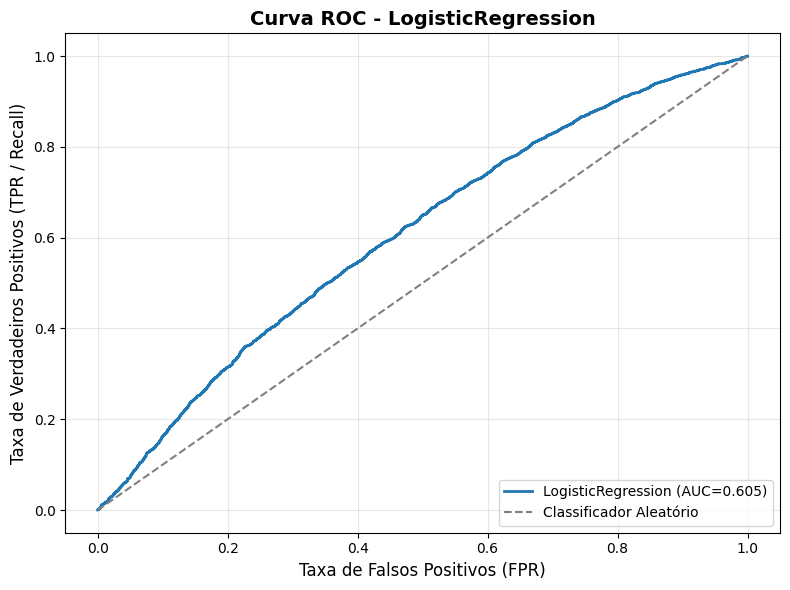


Treinando RandomForest...

📊 MÉTRICAS - RandomForest:
  Accuracy:  0.7383
  Precision: 0.4734
  Recall:    0.0307
  F1-Score:  0.0576
  AUC-ROC:   0.6092

📋 Matriz de Confusão:
  Verdadeiros Negativos (TN): 7303
  Falsos Positivos (FP):      89
  Falsos Negativos (FN):     2528
  Verdadeiros Positivos (TP): 80

  Matriz completa:
  [[7303   89]
 [2528   80]]


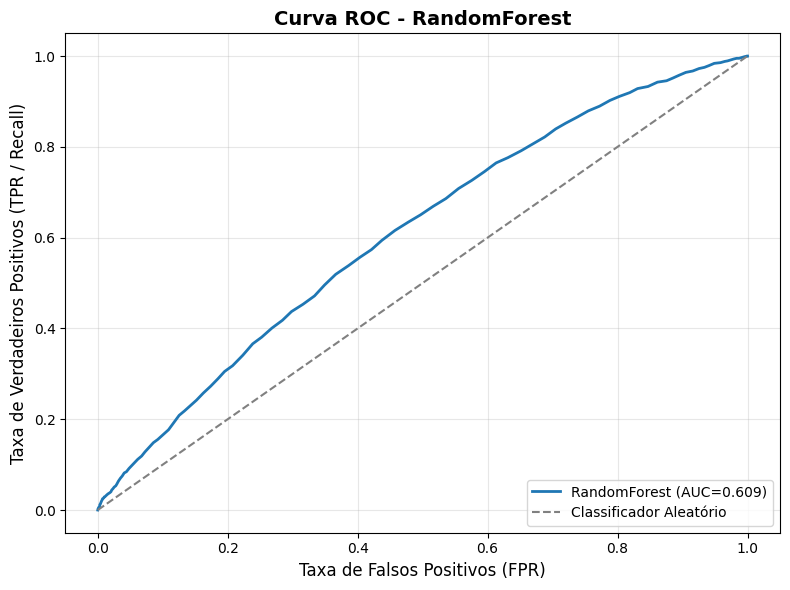


Treinando KNN...

📊 MÉTRICAS - KNN:
  Accuracy:  0.6902
  Precision: 0.3046
  Recall:    0.1465
  F1-Score:  0.1978
  AUC-ROC:   0.5426

📋 Matriz de Confusão:
  Verdadeiros Negativos (TN): 6520
  Falsos Positivos (FP):      872
  Falsos Negativos (FN):     2226
  Verdadeiros Positivos (TP): 382

  Matriz completa:
  [[6520  872]
 [2226  382]]


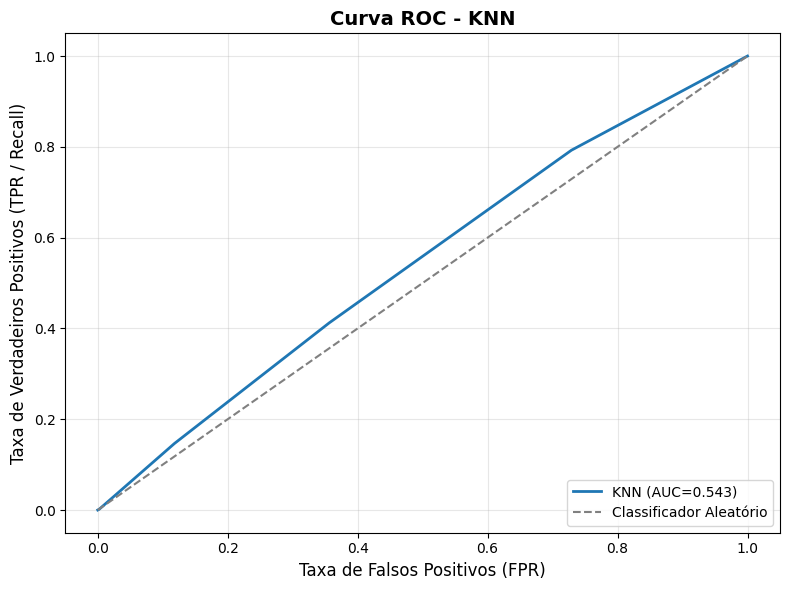


Treinando XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[18:39:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.





📊 MÉTRICAS - XGBoost:
  Accuracy:  0.6117
  Precision: 0.3445
  Recall:    0.5414
  F1-Score:  0.4211
  AUC-ROC:   0.6171

📋 Matriz de Confusão:
  Verdadeiros Negativos (TN): 4705
  Falsos Positivos (FP):      2687
  Falsos Negativos (FN):     1196
  Verdadeiros Positivos (TP): 1412

  Matriz completa:
  [[4705 2687]
 [1196 1412]]


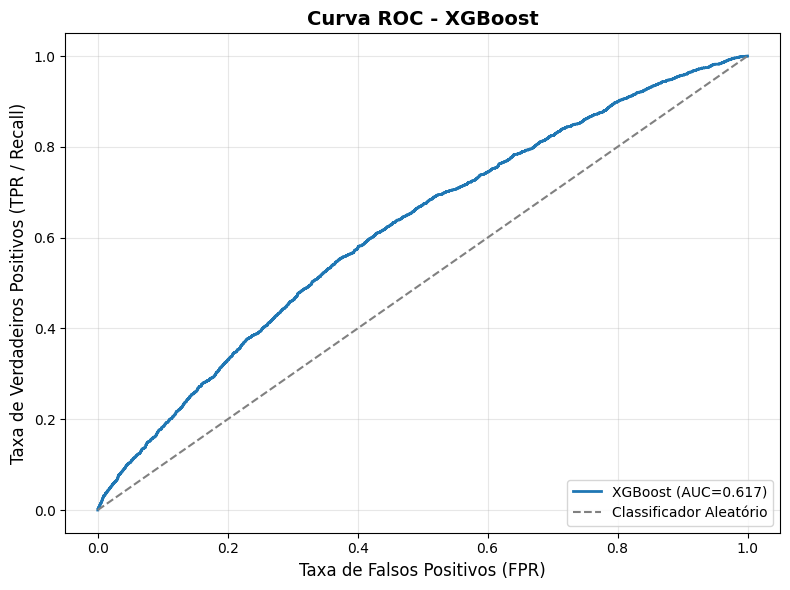

In [ ]:
# Treinar e avaliar modelos
results = []
pipelines = {}

print("="*70)
print("TREINAMENTO E AVALIAÇÃO DOS MODELOS")
print("="*70)

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Treinando {name}...")
    print(f"{'='*70}")

    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', model)])
    try:
        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)
        proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else None

        # Calcular métricas
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = None

        if proba is not None and set(y_test.unique()) <= {0,1}:
            fpr, tpr, _ = roc_curve(y_test, proba)
            roc_auc = auc(fpr, tpr)

        # Armazenar resultados
        results.append({
            'model': name,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'auc': roc_auc
        })
        pipelines[name] = pipe

        # Exibir métricas
        print(f"\n MÉTRICAS - {name}:")
        print(f"  Accuracy:  {acc:.4f}")
        print(f"  Precision: {prec:.4f}")
        print(f"  Recall:    {rec:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        auc_display = f"{roc_auc:.4f}" if roc_auc is not None else 'N/A'
        print(f"  AUC-ROC:   {auc_display}")

        # Matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        print(f"\n Matriz de Confusão:")
        print(f"  Verdadeiros Negativos (TN): {cm[0,0]}")
        print(f"  Falsos Positivos (FP):      {cm[0,1]}")
        print(f"  Falsos Negativos (FN):     {cm[1,0]}")
        print(f"  Verdadeiros Positivos (TP): {cm[1,1]}")
        print(f"\n  Matriz completa:")
        print(f"  {cm}")

        # ROC plot
        if proba is not None and set(y_test.unique()) <= {0,1}:
            plt.figure(figsize=(8,6))
            plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})', linewidth=2)
            plt.plot([0,1],[0,1],'--', color='gray', label='Classificador Aleatório')
            plt.title(f"Curva ROC - {name}", fontsize=14, fontweight='bold')
            plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=12)
            plt.ylabel("Taxa de Verdadeiros Positivos (TPR / Recall)", fontsize=12)
            plt.legend(loc='lower right')
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"❌ Falha ao treinar {name}: {e}")
        import traceback
        traceback.print_exc()

A **Curva ROC (Receiver Operating Characteristic)** é um gráfico que mostra o desempenho de um modelo de classificação em diferentes thresholds (limiares) de decisão.

**Eixos do gráfico:**
- **Eixo X (FPR - False Positive Rate)**: Taxa de Falsos Positivos
  - Fórmula: `FP / (FP + TN)`
  - Representa: Quantos bons pagadores foram incorretamente classificados como maus
  - Varia de 0 (nenhum falso positivo) a 1 (todos classificados como maus)
  
- **Eixo Y (TPR - True Positive Rate / Recall)**: Taxa de Verdadeiros Positivos
  - Fórmula: `TP / (TP + FN)`
  - Representa: Quantos maus pagadores foram corretamente detectados
  - Varia de 0 (nenhum mau pagador detectado) a 1 (todos detectados)

1. **Linha diagonal pontilhada (cinza)**:
   - Representa um **classificador aleatório** (AUC = 0.5)
   - Qualquer modelo acima desta linha é melhor que aleatório
   - Qualquer modelo abaixo é pior que aleatório

2. **Curva do modelo**:
   - **Quanto mais próxima do canto superior esquerdo (0,1)**: Melhor o modelo
   - **Quanto mais próxima da diagonal**: Pior o modelo
   - **AUC (Area Under Curve)**: Área sob a curva
     - AUC = 1.0: Classificador perfeito
     - AUC = 0.5: Classificador aleatório
     - AUC > 0.7: Considerado bom
     - AUC > 0.8: Considerado muito bom
     - AUC > 0.9: Considerado excelente

3. **Pontos na curva**:
   - Cada ponto representa um threshold diferente
   - Threshold baixo (0.1): Detecta mais maus pagadores (Recall alto), mas com mais falsos positivos
   - Threshold alto (0.9): Detecta menos maus pagadores (Recall baixo), mas com menos falsos positivos

### Por que as curvas ROC podem ser parecidas entre modelos?

**1. Mesmo Dataset e Features:**
- Todos os modelos usam **exatamente as mesmas features** (31 variáveis)
- Todos são treinados no **mesmo conjunto de treino** (40.000 amostras)
- Todos são avaliados no **mesmo conjunto de teste** (10.000 amostras)
- **Conclusão**: Se os dados são os mesmos, os modelos podem aprender padrões similares

**2. Desafio do Problema:**
- O problema de **risco de crédito é complexo** e não tem um padrão linear óbvio
- Muitas features têm **poder preditivo similar** (correlações baixas com o target)
- O **desbalanceamento de classes** (~74% vs ~26%) torna o problema mais difícil
- **Conclusão**: Diferentes algoritmos podem convergir para soluções similares quando o problema é difícil

**3. Limitações dos Dados:**
- Features podem não capturar completamente o comportamento de pagamento
- Informações importantes podem estar faltando (ex: histórico de crédito anterior)
- Ruído nos dados pode limitar a capacidade de qualquer modelo
- **Conclusão**: Se os dados não contêm informação suficiente, todos os modelos terão desempenho similar

**4. Balanceamento Aplicado:**
- Todos os modelos usam técnicas de balanceamento (`class_weight='balanced'` ou `scale_pos_weight`)
- Isso faz com que todos priorizem detectar a classe minoritária (maus pagadores)
- **Conclusão**: O balanceamento pode fazer modelos diferentes se comportarem de forma mais similar

**5. Threshold Padrão (0.5):**
- Todos os modelos usam o mesmo threshold de decisão (0.5) para gerar a curva
- A curva ROC mostra o desempenho em **todos os thresholds possíveis**
- **Conclusão**: Mesmo que as predições finais sejam diferentes, as probabilidades podem ser similares

### Interpretação das métricas do exemplo (LogisticRegression):

```
Accuracy:  0.5635  → 56.35% das predições estão corretas
Precision: 0.3191  → 31.91% dos classificados como "mau" são realmente maus
Recall:    0.5939  → 59.39% dos maus pagadores foram detectados ✅ (BOM!)
F1-Score:  0.4151  → Balance entre Precision e Recall
AUC-ROC:   0.6054  → Melhor que aleatório (0.5), mas ainda pode melhorar
```

**Matriz de Confusão:**
```
TN: 4086  → Bons pagadores corretamente identificados
FP: 3306  → Bons pagadores rejeitados (erro tipo I)
FN: 1059  → Maus pagadores não detectados (erro tipo II - CUSTO ALTO!)
TP: 1549  → Maus pagadores detectados ✅
```

**Análise:**
- ✅ **Recall de 59.39%**: Detecta mais da metade dos maus pagadores (bom para crédito!)
- ⚠️ **Precision de 31.91%**: Muitos falsos positivos (bons pagadores rejeitados)
- ⚠️ **AUC de 0.6054**: Melhor que aleatório, mas há espaço para melhoria

**Resultado esperado:**
- Cada modelo terá sua própria curva ROC
- Curvas podem ser similares (AUC entre 0.60-0.70) se o problema é difícil
- A linha diagonal cinza serve como referência (classificador aleatório)
- Modelos acima da diagonal são melhores que aleatório


## Comparação de Modelos

Esta célula compara todos os modelos treinados:

- Cria um DataFrame com todas as métricas de todos os modelos
- Ordena os modelos por F1-Score (melhor para último)
- Mostra tabela comparativa completa
- Destaca o melhor modelo em cada métrica

**Resultado esperado:**
- Tabela com todos os modelos e suas métricas
- Modelos ordenados por F1-Score
- Seção destacando qual modelo é melhor em cada métrica:
  - Melhor Accuracy
  - Melhor Precision
  - Melhor Recall (importante para detectar maus pagadores)
  - Melhor F1-Score
  - Melhor AUC-ROC


In [ ]:
# Comparação resumida dos modelos
res_df = pd.DataFrame(results).sort_values(by='f1', ascending=False).reset_index(drop=True)

print("\n" + "="*70)
print("COMPARAÇÃO DE MODELOS (Ordenado por F1-Score)")
print("="*70)
print(res_df.to_string(index=False))

# Destacar o melhor modelo em cada métrica
print("\n" + "="*70)
print("MELHORES MODELOS POR MÉTRICA:")
print("="*70)
print(f"Melhor Accuracy:  {res_df.loc[res_df['accuracy'].idxmax(), 'model']} ({res_df['accuracy'].max():.4f})")
print(f"Melhor Precision: {res_df.loc[res_df['precision'].idxmax(), 'model']} ({res_df['precision'].max():.4f})")
print(f"Melhor Recall:    {res_df.loc[res_df['recall'].idxmax(), 'model']} ({res_df['recall'].max():.4f})")
print(f"Melhor F1-Score:  {res_df.loc[res_df['f1'].idxmax(), 'model']} ({res_df['f1'].max():.4f})")
if res_df['auc'].notna().any():
    print(f"Melhor AUC-ROC:   {res_df.loc[res_df['auc'].idxmax(), 'model']} ({res_df['auc'].max():.4f})")


COMPARAÇÃO DE MODELOS (Ordenado por F1-Score)
             model  accuracy  precision   recall       f1      auc
           XGBoost    0.6117   0.344474 0.541411 0.421053 0.617130
LogisticRegression    0.5635   0.319053 0.593942 0.415115 0.605399
               KNN    0.6902   0.304625 0.146472 0.197825 0.542575
      RandomForest    0.7383   0.473373 0.030675 0.057616 0.609217

MELHORES MODELOS POR MÉTRICA:
Melhor Accuracy:  RandomForest (0.7383)
Melhor Precision: RandomForest (0.4734)
Melhor Recall:    LogisticRegression (0.5939)
Melhor F1-Score:  XGBoost (0.4211)
Melhor AUC-ROC:   XGBoost (0.6171)


### Seleção do Melhor Modelo

Esta célula seleciona o melhor modelo baseado no F1-Score:

- Escolhe o modelo com maior F1-Score (balance entre Precision e Recall)
- Salva o pipeline do melhor modelo para uso futuro
- Destaca também o modelo com melhor Recall (importante para crédito)
- Explica a justificativa da escolha

**Resultado esperado:**
- Nome do melhor modelo (geralmente XGBoost ou RandomForest)
- Métricas do melhor modelo (F1, Precision, Recall, AUC)
- Nota sobre o modelo com melhor Recall (se diferente)
- Justificativa explicando por que F1-Score foi usado como critério


In [ ]:
# Seleção do melhor modelo
# Para problemas de crédito, Recall (detectar maus pagadores) é muito importante
# Vamos escolher o modelo com melhor F1-Score, mas também destacar o melhor Recall

if not res_df.empty:
    # Melhor modelo por F1-Score (balance entre Precision e Recall)
    best_row = res_df.loc[0]
    best_model_name = best_row['model']
    best_pipeline = pipelines[best_model_name]

    print("\n" + "="*70)
    print("MELHOR MODELO SELECIONADO")
    print("="*70)
    print(f"Modelo: {best_model_name}")
    print(f"F1-Score: {best_row['f1']:.4f}")
    print(f"Precision: {best_row['precision']:.4f}")
    print(f"Recall: {best_row['recall']:.4f}")
    auc_display = f"{best_row['auc']:.4f}" if best_row['auc'] is not None else 'N/A'
    print(f"AUC-ROC: {auc_display}")

    # Destacar também o melhor Recall (importante para detectar maus pagadores)
    best_recall_idx = res_df['recall'].idxmax()
    best_recall_model = res_df.loc[best_recall_idx, 'model']
    best_recall_value = res_df.loc[best_recall_idx, 'recall']

    if best_recall_model != best_model_name:
        print(f"\n⚠ NOTA: O modelo com melhor Recall é {best_recall_model} (Recall={best_recall_value:.4f})")
        print("   Para problemas de crédito, Recall alto é crucial para detectar maus pagadores.")

    print("\nJustificativa: F1-Score foi escolhido por balancear Precision e Recall.")
    print("Para problemas de crédito, é importante detectar maus pagadores (Recall alto)")
    print("sem gerar muitos falsos positivos (Precision razoável).")
else:
    best_model_name = None
    best_pipeline = None
    print("❌ Nenhum modelo treinado com sucesso.")


MELHOR MODELO SELECIONADO
Modelo: XGBoost
F1-Score: 0.4211
Precision: 0.3445
Recall: 0.5414
AUC-ROC: 0.6171

⚠ NOTA: O modelo com melhor Recall é LogisticRegression (Recall=0.5939)
   Para problemas de crédito, Recall alto é crucial para detectar maus pagadores.

Justificativa: F1-Score foi escolhido por balancear Precision e Recall.
Para problemas de crédito, é importante detectar maus pagadores (Recall alto)
sem gerar muitos falsos positivos (Precision razoável).


## Matriz de Confusão - Visualização Final

Esta célula cria visualizações detalhadas da matriz de confusão do melhor modelo:

1. **Matriz de Confusão (Valores Absolutos)**:
   - Heatmap mostrando TN, FP, FN, TP
   - Gráfico visual com seaborn

2. **Interpretação Detalhada**:
   - Explicação de cada célula da matriz
   - Cálculo de métricas derivadas (Accuracy, Precision, Recall, Specificity, F1)
   - Interpretação para risco de crédito

3. **Matriz Normalizada (Percentual)**:
   - Mostra percentual de cada classe real classificada corretamente/incorretamente
   - Facilita comparação entre classes desbalanceadas

**Resultado esperado:**
- 2 gráficos (matriz absoluta e normalizada)
- Métricas detalhadas calculadas
- Interpretação contextualizada para risco de crédito
- Alertas sobre falsos negativos (maus pagadores não detectados)


MATRIZ DE CONFUSÃO - XGBOOST


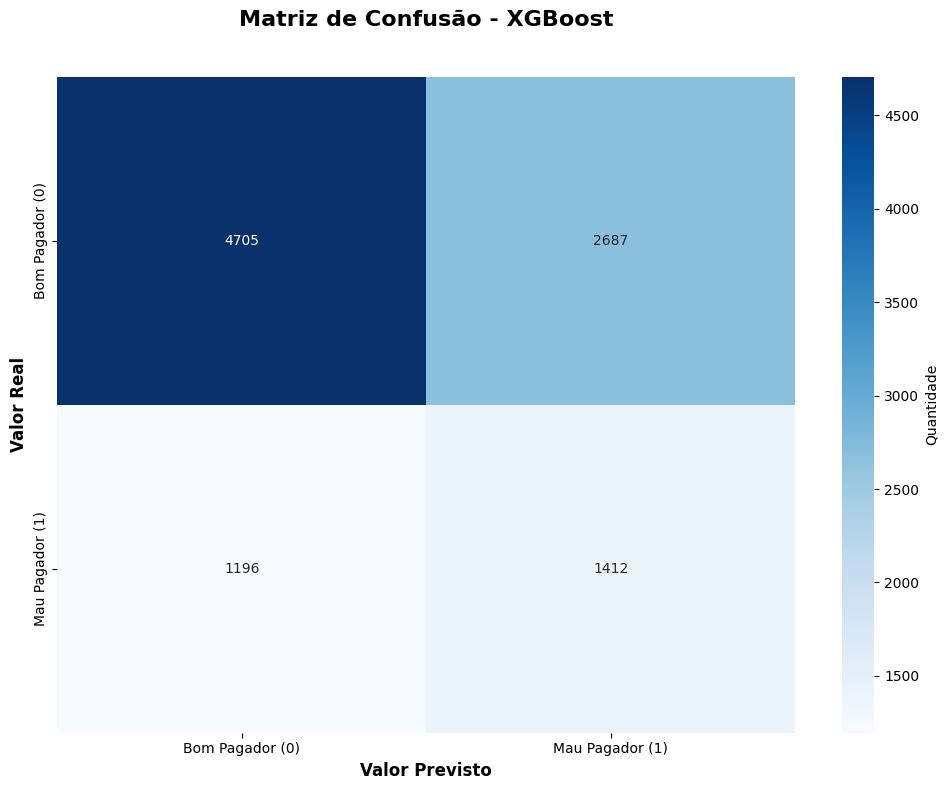


INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO

📊 Valores da Matriz:
  Verdadeiros Negativos (TN):   4705 - Bons pagadores corretamente identificados
  Falsos Positivos (FP):        2687 - Bons pagadores classificados como maus (ERRO TIPO I)
  Falsos Negativos (FN):        1196 - Maus pagadores classificados como bons (ERRO TIPO II)
  Verdadeiros Positivos (TP):   1412 - Maus pagadores corretamente identificados

📈 Métricas Calculadas:
  Accuracy (Acurácia):     0.6117 (61.17%)
  Precision (Precisão):     0.3445 (34.45%)
  Recall (Sensibilidade):  0.5414 (54.14%)
  Specificity (Especificidade): 0.6365 (63.65%)
  F1-Score:                 0.4211

💡 Interpretação para Risco de Crédito:
  • 1412 maus pagadores foram CORRETAMENTE identificados (importante!)
  • 1196 maus pagadores foram PERDIDOS (classificados como bons) - CUSTO ALTO!
  • 2687 bons pagadores foram REJEITADOS (classificados como maus) - Custo moderado
  • 4705 bons pagadores foram CORRETAMENTE aprovados

⚠️  ATENÇÃO: 45.86% dos maus 

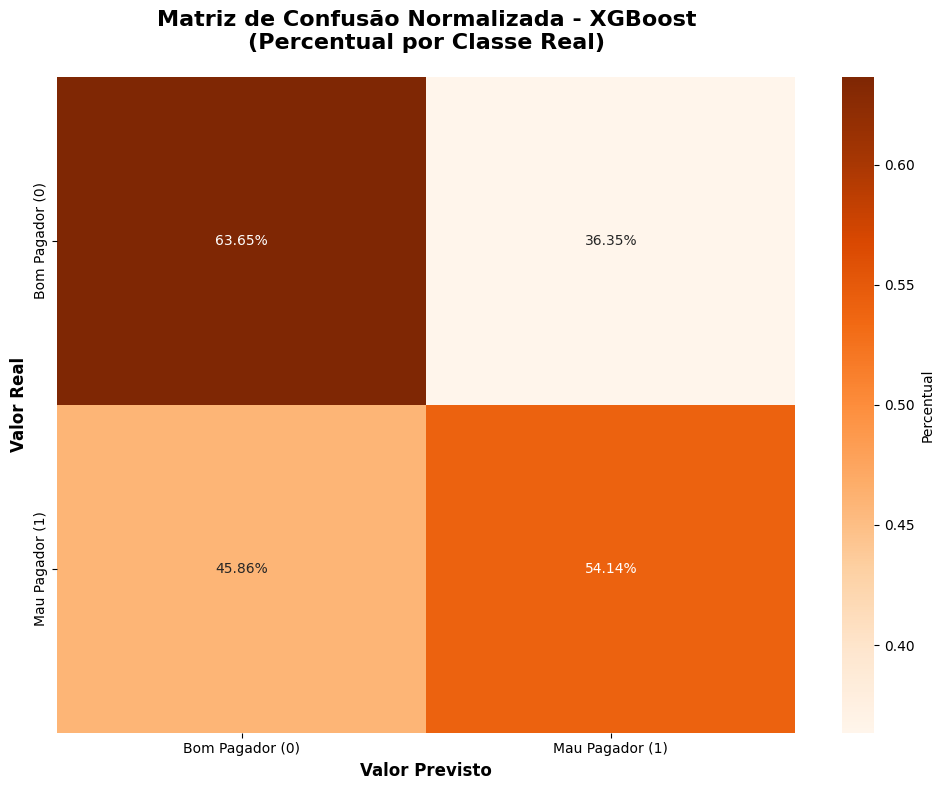


MATRIZ DE CONFUSÃO NORMALIZADA (Percentual)
Valores mostram a porcentagem de cada classe real que foi classificada em cada categoria.

  Dos Bons Pagadores: 63.65% corretos, 36.35% incorretos
  Dos Maus Pagadores: 45.86% incorretos, 54.14% corretos


In [ ]:
# ============================================================================
# MATRIZ DE CONFUSÃO - VISUALIZAÇÃO FINAL DO MELHOR MODELO
# ============================================================================

if best_pipeline is not None:
    print("="*70)
    print(f"MATRIZ DE CONFUSÃO - {best_model_name.upper()}")
    print("="*70)

    # Fazer predições com o melhor modelo
    y_pred_best = best_pipeline.predict(X_test)

    # Calcular matriz de confusão
    cm = confusion_matrix(y_test, y_pred_best)

    # Criar visualização da matriz de confusão
    plt.figure(figsize=(10, 8))

    # Criar heatmap da matriz de confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bom Pagador (0)', 'Mau Pagador (1)'],
                yticklabels=['Bom Pagador (0)', 'Mau Pagador (1)'],
                cbar_kws={'label': 'Quantidade'})

    plt.title(f'Matriz de Confusão - {best_model_name}\n',
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
    plt.xlabel('Valor Previsto', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Exibir métricas detalhadas
    TN, FP, FN, TP = cm.ravel()

    print("\n" + "="*70)
    print("INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO")
    print("="*70)
    print(f"\n Valores da Matriz:")
    print(f"  Verdadeiros Negativos (TN): {TN:>6} - Bons pagadores corretamente identificados")
    print(f"  Falsos Positivos (FP):      {FP:>6} - Bons pagadores classificados como maus (ERRO TIPO I)")
    print(f"  Falsos Negativos (FN):      {FN:>6} - Maus pagadores classificados como bons (ERRO TIPO II)")
    print(f"  Verdadeiros Positivos (TP): {TP:>6} - Maus pagadores corretamente identificados")

    # Calcular métricas derivadas
    total = TN + FP + FN + TP
    accuracy = (TN + TP) / total
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\n Métricas Calculadas:")
    print(f"  Accuracy (Acurácia):     {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision (Precisão):     {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall (Sensibilidade):  {recall:.4f} ({recall*100:.2f}%)")
    print(f"  Specificity (Especificidade): {specificity:.4f} ({specificity*100:.2f}%)")
    print(f"  F1-Score:                 {f1:.4f}")

    print(f"\💡 Interpretação para Risco de Crédito:")
    print(f"  • {TP} maus pagadores foram CORRETAMENTE identificados (importante!)")
    print(f"  • {FN} maus pagadores foram PERDIDOS (classificados como bons) - CUSTO ALTO!")
    print(f"  • {FP} bons pagadores foram REJEITADOS (classificados como maus) - Custo moderado")
    print(f"  • {TN} bons pagadores foram CORRETAMENTE aprovados")

    if FN > 0:
        taxa_erro_tipo2 = (FN / (FN + TP)) * 100
        print(f"\n  ATENÇÃO: {taxa_erro_tipo2:.2f}% dos maus pagadores não foram detectados!")
        print(f"   Isso pode resultar em perdas financeiras significativas.")

    if FP > 0:
        taxa_erro_tipo1 = (FP / (FP + TN)) * 100
        print(f"\nℹ  {taxa_erro_tipo1:.2f}% dos bons pagadores foram rejeitados.")
        print(f"   Isso pode resultar em perda de receita, mas é menos crítico que FN.")

    # Criar matriz de confusão normalizada (percentual)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Oranges',
                xticklabels=['Bom Pagador (0)', 'Mau Pagador (1)'],
                yticklabels=['Bom Pagador (0)', 'Mau Pagador (1)'],
                cbar_kws={'label': 'Percentual'})

    plt.title(f'Matriz de Confusão Normalizada - {best_model_name}\n(Percentual por Classe Real)',
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
    plt.xlabel('Valor Previsto', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print("MATRIZ DE CONFUSÃO NORMALIZADA (Percentual)")
    print("="*70)
    print("Valores mostram a porcentagem de cada classe real que foi classificada em cada categoria.")
    print(f"\n  Dos Bons Pagadores: {cm_normalized[0,0]*100:.2f}% corretos, {cm_normalized[0,1]*100:.2f}% incorretos")
    print(f"  Dos Maus Pagadores: {cm_normalized[1,0]*100:.2f}% incorretos, {cm_normalized[1,1]*100:.2f}% corretos")

else:
    print("❌ Nenhum modelo disponível para gerar matriz de confusão.")
    print("   Execute as células anteriores para treinar os modelos primeiro.")


## Modelo Naive Bayes - Análise Adicional

Esta célula treina e avalia o modelo Naive Bayes como análise complementar:

- **GaussianNB**: Algoritmo probabilístico baseado no Teorema de Bayes
- Funciona bem com dados desbalanceados devido à sua natureza probabilística
- Treina usando o mesmo pipeline de pré-processamento
- Calcula todas as métricas e compara com o melhor modelo anterior

**Resultado esperado:**
- Métricas do Naive Bayes (Accuracy, Precision, Recall, F1, AUC)
- Matriz de confusão visual
- Curva ROC
- Tabela comparativa: Naive Bayes vs Melhor Modelo Anterior
- Indicação de qual modelo é melhor em cada métrica
- Conclusão sobre qual modelo usar


TREINAMENTO E AVALIAÇÃO - NAIVE BAYES

O Naive Bayes é um algoritmo probabilístico baseado no Teorema de Bayes.
É eficiente e funciona bem mesmo com dados desbalanceados.

Treinando Naive Bayes...

RESULTADOS - NAIVE BAYES

📊 MÉTRICAS:
  Accuracy:  0.6595 (65.95%)
  Precision: 0.3264 (32.64%)
  Recall:    0.2872 (28.72%)
  F1-Score:  0.3055
  AUC-ROC:  0.5828

📋 MATRIZ DE CONFUSÃO:
  Verdadeiros Negativos (TN):   5846
  Falsos Positivos (FP):        1546
  Falsos Negativos (FN):       1859
  Verdadeiros Positivos (TP):    749

  Matriz completa:
  [[5846 1546]
 [1859  749]]


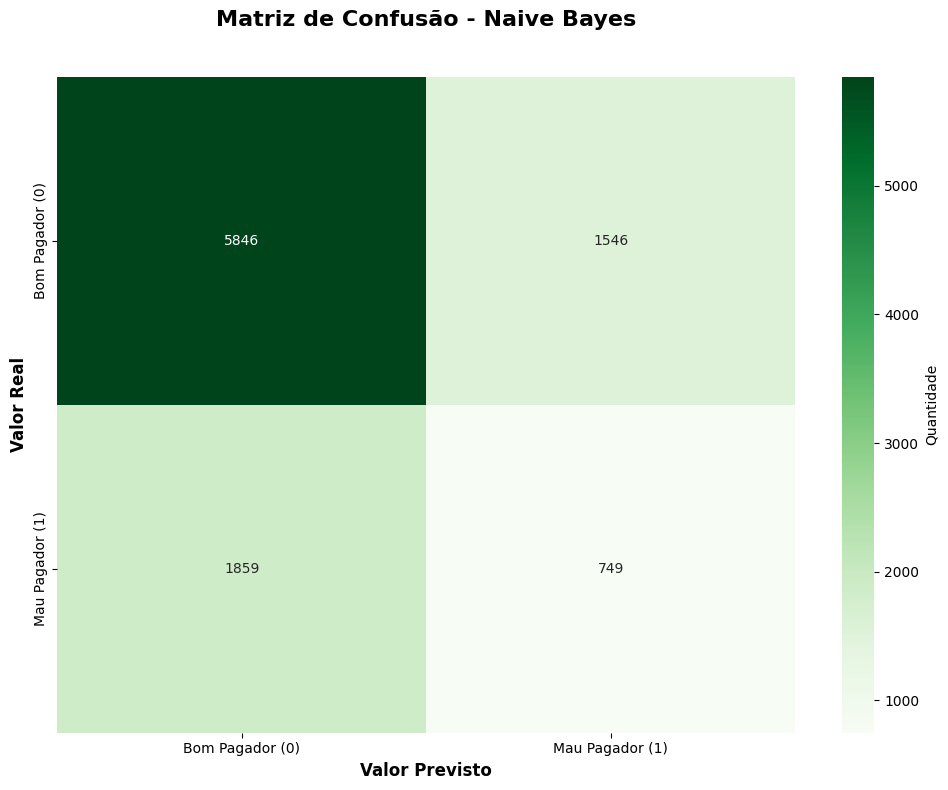

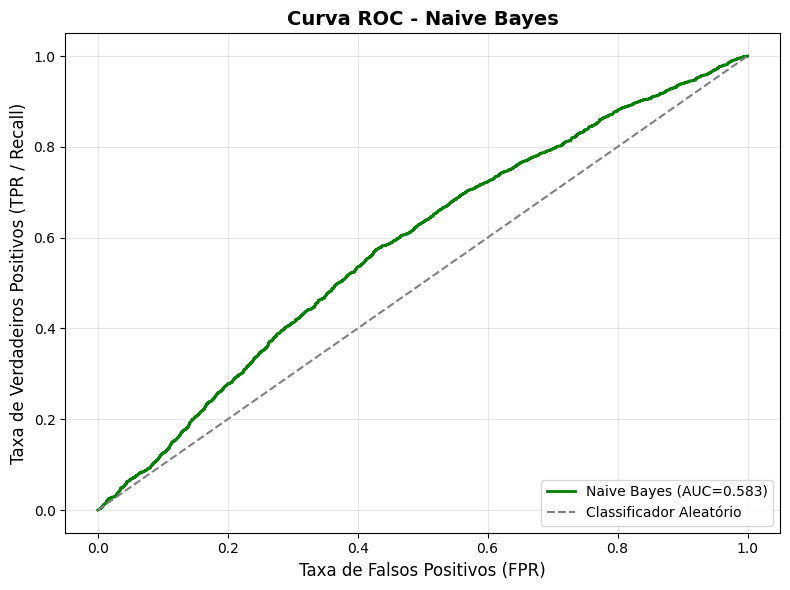


COMPARAÇÃO: NAIVE BAYES vs MELHOR MODELO ANTERIOR

Métrica         Naive Bayes     XGBoost         Diferença      
----------------------------------------------------------------------
Accuracy        0.6595         0.6117         +0.0478
Precision       0.3264         0.3445         -0.0181
Recall          0.2872         0.5414         -0.2542
F1-Score        0.3055         0.4211         -0.1155
AUC-ROC         0.5828         0.6171         -0.0343

🏆 XGBoost mantém F1-Score MELHOR que Naive Bayes
   F1-Score: 0.4211 vs 0.3055

✅ XGBoost detecta MAIS maus pagadores (Recall: 0.5414 vs 0.2872)

✓ Naive Bayes treinado e avaliado com sucesso!


In [ ]:
# ============================================================================
# MODELO NAIVE BAYES - ANÁLISE ADICIONAL
# ============================================================================

print("="*70)
print("TREINAMENTO E AVALIAÇÃO - NAIVE BAYES")
print("="*70)
print("\nO Naive Bayes é um algoritmo probabilístico baseado no Teorema de Bayes.")
print("É eficiente e funciona bem mesmo com dados desbalanceados.\n")

# Criar e treinar o modelo Naive Bayes
# Nota: GaussianNB não suporta class_weight, mas funciona bem com dados desbalanceados
# devido à sua natureza probabilística
nb_model = GaussianNB()

# Criar pipeline com o mesmo preprocessor
nb_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', nb_model)])

try:
    print("Treinando Naive Bayes...")
    nb_pipe.fit(X_train, y_train)

    # Fazer predições
    y_pred_nb = nb_pipe.predict(X_test)
    proba_nb = nb_pipe.predict_proba(X_test)[:,1]

    # Calcular métricas
    acc_nb = accuracy_score(y_test, y_pred_nb)
    prec_nb = precision_score(y_test, y_pred_nb, zero_division=0)
    rec_nb = recall_score(y_test, y_pred_nb, zero_division=0)
    f1_nb = f1_score(y_test, y_pred_nb, zero_division=0)

    # Calcular AUC-ROC
    fpr_nb, tpr_nb, _ = roc_curve(y_test, proba_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)

    # Matriz de confusão
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    TN_nb, FP_nb, FN_nb, TP_nb = cm_nb.ravel()

    # Exibir resultados
    print("\n" + "="*70)
    print("RESULTADOS - NAIVE BAYES")
    print("="*70)
    print(f"\n MÉTRICAS:")
    print(f"  Accuracy:  {acc_nb:.4f} ({acc_nb*100:.2f}%)")
    print(f"  Precision: {prec_nb:.4f} ({prec_nb*100:.2f}%)")
    print(f"  Recall:    {rec_nb:.4f} ({rec_nb*100:.2f}%)")
    print(f"  F1-Score:  {f1_nb:.4f}")
    print(f"  AUC-ROC:  {roc_auc_nb:.4f}")

    print(f"\n📋 MATRIZ DE CONFUSÃO:")
    print(f"  Verdadeiros Negativos (TN): {TN_nb:>6}")
    print(f"  Falsos Positivos (FP):      {FP_nb:>6}")
    print(f"  Falsos Negativos (FN):     {FN_nb:>6}")
    print(f"  Verdadeiros Positivos (TP): {TP_nb:>6}")
    print(f"\n  Matriz completa:")
    print(f"  {cm_nb}")

    # Visualizar matriz de confusão
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Bom Pagador (0)', 'Mau Pagador (1)'],
                yticklabels=['Bom Pagador (0)', 'Mau Pagador (1)'],
                cbar_kws={'label': 'Quantidade'})
    plt.title('Matriz de Confusão - Naive Bayes\n',
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Valor Real', fontsize=12, fontweight='bold')
    plt.xlabel('Valor Previsto', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Curva ROC
    plt.figure(figsize=(8,6))
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC={roc_auc_nb:.3f})', linewidth=2, color='green')
    plt.plot([0,1],[0,1],'--', color='gray', label='Classificador Aleatório')
    plt.title("Curva ROC - Naive Bayes", fontsize=14, fontweight='bold')
    plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=12)
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR / Recall)", fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Comparar com o melhor modelo anterior
    if best_pipeline is not None:
        print("\n" + "="*70)
        print("COMPARAÇÃO: NAIVE BAYES vs MELHOR MODELO ANTERIOR")
        print("="*70)

        # Obter métricas do melhor modelo
        y_pred_best = best_pipeline.predict(X_test)
        acc_best = accuracy_score(y_test, y_pred_best)
        prec_best = precision_score(y_test, y_pred_best, zero_division=0)
        rec_best = recall_score(y_test, y_pred_best, zero_division=0)
        f1_best = f1_score(y_test, y_pred_best, zero_division=0)

        proba_best = best_pipeline.predict_proba(X_test)[:,1] if hasattr(best_pipeline.named_steps['clf'], 'predict_proba') else None
        if proba_best is not None:
            fpr_best, tpr_best, _ = roc_curve(y_test, proba_best)
            auc_best = auc(fpr_best, tpr_best)
        else:
            auc_best = None

        print(f"\n{'Métrica':<15} {'Naive Bayes':<15} {best_model_name:<15} {'Diferença':<15}")
        print("-" * 70)
        print(f"{'Accuracy':<15} {acc_nb:.4f}         {acc_best:.4f}         {acc_nb-acc_best:+.4f}")
        print(f"{'Precision':<15} {prec_nb:.4f}         {prec_best:.4f}         {prec_nb-prec_best:+.4f}")
        print(f"{'Recall':<15} {rec_nb:.4f}         {rec_best:.4f}         {rec_nb-rec_best:+.4f}")
        print(f"{'F1-Score':<15} {f1_nb:.4f}         {f1_best:.4f}         {f1_nb-f1_best:+.4f}")
        if auc_best is not None:
            print(f"{'AUC-ROC':<15} {roc_auc_nb:.4f}         {auc_best:.4f}         {roc_auc_nb-auc_best:+.4f}")

        # Determinar qual é melhor
        print("\n" + "="*70)
        if f1_nb > f1_best:
            print(f" Naive Bayes apresenta F1-Score MELHOR que {best_model_name}!")
            print(f"   F1-Score: {f1_nb:.4f} vs {f1_best:.4f}")
        elif f1_nb < f1_best:
            print(f" {best_model_name} mantém F1-Score MELHOR que Naive Bayes")
            print(f"   F1-Score: {f1_best:.4f} vs {f1_nb:.4f}")
        else:
            print(f" Empate! Ambos modelos têm F1-Score similar")

        if rec_nb > rec_best:
            print(f"\ Naive Bayes detecta MAIS maus pagadores (Recall: {rec_nb:.4f} vs {rec_best:.4f})")
        elif rec_nb < rec_best:
            print(f"\ {best_model_name} detecta MAIS maus pagadores (Recall: {rec_best:.4f} vs {rec_nb:.4f})")

    # Adicionar aos resultados para comparação geral
    results.append({
        'model': 'NaiveBayes',
        'accuracy': acc_nb,
        'precision': prec_nb,
        'recall': rec_nb,
        'f1': f1_nb,
        'auc': roc_auc_nb
    })
    pipelines['NaiveBayes'] = nb_pipe

    print("\n" + "="*70)
    print("✓ Naive Bayes treinado e avaliado com sucesso!")
    print("="*70)

except Exception as e:
    print(f"❌ Erro ao treinar Naive Bayes: {e}")
    import traceback
    traceback.print_exc()


## Função de Predição para Novos Clientes

Esta célula cria uma função para fazer predições em novos dados:

- **`predict_new(input_data)`**: Função que recebe novos clientes e retorna predições
- Aceita dict (um cliente) ou DataFrame (múltiplos clientes)
- Retorna predição (0 = bom pagador, 1 = mau pagador) e probabilidade
- Trata colunas ausentes automaticamente

**Resultado esperado:**
- Função criada e pronta para uso
- Exemplo de uso com 2 primeiras linhas do conjunto de teste
- Tabela mostrando features originais + predição + probabilidade


In [ ]:
def predict_new(input_data):
    """
    input_data: dict (uma amostra) ou pandas.DataFrame (N amostras)
    Retorna: DataFrame com colunas originais + 'prediction' (0/1) e 'prob_positive' (se disponível)
    Observação: preenche colunas ausentes com NaN antes do processamento.
    """
    if best_pipeline is None:
        raise RuntimeError("Nenhum modelo treinado com sucesso para previsão.")
    if isinstance(input_data, dict):
        X_new = pd.DataFrame([input_data])
    elif isinstance(input_data, pd.DataFrame):
        X_new = input_data.copy()
    else:
        raise ValueError("input_data deve ser dict ou pandas.DataFrame")
    # garantir todas as colunas de X
    for c in X.columns:
        if c not in X_new.columns:
            X_new[c] = np.nan
    X_new = X_new[X.columns]
    preds = best_pipeline.predict(X_new)
    proba = best_pipeline.predict_proba(X_new)[:,1] if hasattr(best_pipeline.named_steps['clf'], 'predict_proba') else None
    out = X_new.copy()
    out['prediction'] = preds
    if proba is not None:
        out['prob_positive'] = proba
    return out

In [ ]:
# Exemplo de uso:
print("\nExemplo de uso da função predict_new com as 2 primeiras linhas do conjunto de teste:")
try:
    sample = X_test.iloc[:2].copy()
    display(sample)
    display(predict_new(sample))
except Exception as e:
    print("Falha ao mostrar exemplo de predict:", e)


Exemplo de uso da função predict_new com as 2 primeiras linhas do conjunto de teste:


,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,FLAG VISA,...,CODIGO PROFISSAO CONJUGE,NIVEL EDUCACIONAL CONJUGE,PRODUTO,IDADE,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM,EMPRESA_NUM,ESTADO PROFISSIONAL_NUM
45600,10,1,1,0,1,18,1,370.0,0.0,0,...,0,0,1,18,1,0,19,1,1,19
21356,10,1,3,0,1,1,1,601.0,0.0,0,...,0,0,1,43,0,0,21,1,1,21


,DIA PAGAMENTO,TIPO ENDERECO POSTAL,ESTADO CIVIL,QUANT DEPENDENTES,TIPO RESIDENCIA,MESES RESIDENCIA,FLAG EMAIL,RENDA PESSOAL MENSAL,OUTRAS RENDAS,FLAG VISA,...,PRODUTO,IDADE,TIPO ENVIO APLICACAO_NUM,SEXO_NUM,ESTADO RESIDENCIAL_NUM,FLAG TELEFONE RESIDENCIAL_NUM,EMPRESA_NUM,ESTADO PROFISSIONAL_NUM,prediction,prob_positive
45600,10,1,1,0,1,18,1,370.0,0.0,0,...,1,18,1,0,19,1,1,19,0,0.209582
21356,10,1,3,0,1,1,1,601.0,0.0,0,...,1,43,0,0,21,1,1,21,0,0.296152
